In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('player_stats_new.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Display the first few rows of the dataframe
df.head(10)

matchId  gameDuration gameMode     gameVersion  mapId  \
0  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
1  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
2  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
3  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
4  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
5  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
6  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
7  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
8  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
9  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   

   gameEndedInEarlySurrender  gameEndedInSurrender  teamId    win  \
0                      False                 False     100  False   
1                      False                 False     100  False   
2                      False                 False     100  False   
3                      False                 False     100  False   
4                      False                 False     100  False   
5                      False                 False     200   True   
6                      False                 False     200   True   
7                      False                 False     200   True   
8                      False                 False     200   True   
9                      False                 False     200   True   

   championKills  participantId  \
0             16              1   
1             16              2   
2             16              3   
3             16              4   
4             16              5   
5             36              6   
6             36              7   
7             36              8   
8             36              9   
9             36             10   

                                               puuid    riotIdGameName  \
0  zbwz6PibVlWAvAWGEE3rUZTYvESqxuUanwGihxqvZ_gbxj...          14115621   
1  MURFisAL-QkQYuP29A46W82uhINhXjn_bQejkrRTYCSd3y...              自不量力   
2  FiWdBu5UKIzrBFXRaKHJecQGiBJAViksJqDpwfU1n6FhDj...          dead boi   
3  Pcdol-JqLyC57rniPjKMaJQoqEzIylpqI38-ycSDULdlWv...     Darth Goonius   
4  bAT6o5D-NmfhkIgN2SUVsIbTj5yURe6jl1ONfhJKXmkLlR...             marco   
5  gbCgjzLqe8BS6_5YOsVHM5CWXar43jLe2wdV3iuX_eidrm...        uncle Urgy   
6  a1xPLQmsl8Xe_ASp5paSI8EWeYMSGOCdBgM2jmNfZ9GklX...              tibs   
7  Je1-pvJRcaWA76SZSFjFw42_XcUFkT_3tDTccRKXXk9J7J...        xExplosive   
8  erBgbJ0BqwG-Nk0Kt1tUXVXigxSD1EIcMbSAdHIgT2LXOR...       Me Have Fun   
9  u6EGgjc9wqHEI0ugcVRJfHL9zO1dYOJIBnzRfG10DfWbJu...  BenTbeyondrepair   

   summonerLevel championName     role teamPosition  champExperience  kills  \
0            259     Renekton     NONE          TOP            12990      3   
1            453       LeeSin     NONE       JUNGLE            11416      2   
2            147         Hwei     SOLO       MIDDLE            14658      1   
3           1169      Kalista    CARRY       BOTTOM            10990      9   
4            886       Thresh  SUPPORT      UTILITY            10000      1   
5            142        Urgot     SOLO          TOP            15600      8   
6            552        Poppy     NONE       JUNGLE            15885      6   
7            662        Karma     SOLO       MIDDLE            16102      7   
8            714        Corki    CARRY       BOTTOM            14285     12   
9            767       Maokai  SUPPORT      UTILITY             9652      3   

   deaths  assists  soloKills  firstBloodKill  consumablesPurchased  \
0       7        3          1           False                     1   
1       8        6          1           False                     6   
2       8        4          1           False                     2   
3       9        2          0           False                     1   
4       4       10          0           False                     4   
5       5      

In [497]:
pd.set_option('display.width', None)
df.columns

Index(['matchId', 'gameDuration', 'gameMode', 'gameVersion', 'mapId',
       'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'teamId', 'win',
       'championKills', 'participantId', 'puuid', 'riotIdGameName',
       'summonerLevel', 'championName', 'role', 'teamPosition',
       'champExperience', 'kills', 'deaths', 'assists', 'soloKills',
       'firstBloodKill', 'consumablesPurchased', 'damageDealtToObjectives',
       'damageSelfMitigated', 'totalDamageTaken', 'firstTowerKill',
       'firstTowerAssist', 'turretKills', 'turretTakedowns',
       'turretPlatesTaken', 'firstTurretKilledTime',
       'totalDamageDealtToChampions', 'damagePerMinute', 'goldEarned',
       'goldSpent', 'visionScore', 'sightWardsBoughtInGame', 'wardsPlaced',
       'stealthWardsPlaced', 'controlWardsPlaced', 'wardsKilled',
       'detectorWardsPlaced', 'visionScorePerMinute', 'wardTakedownsBefore20M',
       'visionScoreAdvantageLaneOpponent', 'neutralMinionsKilled',
       'totalMinionsKilled', 'tota

# Data Cleaning and Processing

## Game Version

Remove all games that are not from the most current season (Season 15)

In [4]:
df['gameVersion'].value_counts()

gameVersion
15.10.680.4378    26510
15.12.688.6522    23920
15.11.685.5259    21210
15.9.678.1456     14000
15.8.675.10       11440
                  ...  
14.13.596.4541       10
14.19.620.6549       10
13.21.539.4823       10
14.2.556.584         10
14.14.601.2857       10
Name: count, Length: 109, dtype: int64

In [5]:
df = df[~df['gameVersion'].str.startswith('13')]
df = df[~df['gameVersion'].str.startswith('14')]

In [6]:
df['gameVersion'].value_counts()

gameVersion
15.10.680.4378    26510
15.12.688.6522    23920
15.11.685.5259    21210
15.9.678.1456     14000
15.8.675.10       11440
15.4.657.5386      6570
15.7.670.3172      6430
15.6.668.2516      6220
15.7.672.4034      5860
15.5.662.6652      5770
15.2.652.1536      5560
15.1.649.4112      4660
15.3.656.4086      3460
15.3.654.407       3300
15.6.667.3303      3000
15.1.648.3927      2550
15.11.684.1658     2010
15.8.673.8244      1520
15.8.674.8619      1040
15.9.678.398        860
15.6.666.5757       530
15.6.667.359        450
15.7.669.24         320
15.6.664.9480       310
15.5.661.4445       220
15.2.650.9216       220
15.5.662.5311       160
15.6.666.9183       100
15.1.647.8644        60
15.9.677.4704        50
Name: count, dtype: int64

## Game Duration

Remove all game's with a shorter duration than 600 seconds (10 minutes is the first time a team can surrender, any surrender happening before 10 minutes means there has been a disconnected player and the game has been remade)

In [7]:
short_games = df[df['gameDuration'] < 600]
unique_short_games = short_games['matchId'].nunique()
unique_short_games

259

In [8]:
short_game_match_ids = df[df['gameDuration'] < 600]['matchId'].unique()
df = df[~df['matchId'].isin(short_game_match_ids)]

In [9]:
short_game_match_ids = df[df['gameDuration'] < 600]['matchId'].unique()
len(short_game_match_ids)

0

## NaN and Nulls

### Check for invalid team positons

In [10]:
# Check for games where teamPosition is not TOP, JUNGLE, MID, UTILITY, or BOTTOM
valid_positions = ['TOP', 'JUNGLE', 'MIDDLE', 'UTILITY', 'BOTTOM']
invalid_positions = df[~df['teamPosition'].isin(valid_positions)]

print(f"Number of rows with invalid teamPosition: {len(invalid_positions)}")

if len(invalid_positions) > 0:
    print("\nInvalid teamPosition values found:")
    print(invalid_positions['teamPosition'].value_counts())

Number of rows with invalid teamPosition: 3

Invalid teamPosition values found:
Series([], Name: count, dtype: int64)


In [11]:
valid_positions = ['TOP', 'JUNGLE', 'MIDDLE', 'UTILITY', 'BOTTOM']
invalid_positions = df[~df['teamPosition'].isin(valid_positions)]

# Show only the invalid matches
invalid_positions.head(10)

matchId  gameDuration gameMode     gameVersion  mapId  \
24262  NA1_5310087298           889  CLASSIC  15.12.688.6522     11   
51000  NA1_5300031967          1047  CLASSIC  15.11.685.5259     11   
74277  NA1_5235195790           967  CLASSIC   15.4.657.5386     11   

       gameEndedInEarlySurrender  gameEndedInSurrender  teamId    win  \
24262                      False                  True     100  False   
51000                      False                 False     100  False   
74277                      False                  True     200  False   

       championKills  participantId  \
24262              9              3   
51000             11              1   
74277              5              8   

                                                   puuid riotIdGameName  \
24262  JFF43mD4ZPMSOcjTNnN03f1YhRZR_1vyrlbzEkvS5Qdt1d...    KOIIIIIIIII   
51000  rVcXkNecwng_CC7Cl-2AOZ0mmVJCYtnPMqCNxUOs4Gbsv3...  Monster Jelly   
74277  JfBItTF_k5d-u324Ed0uJOzYjFHYiX7pVzRi6cc4CobW-n...         Middle   

       summonerLevel championName     role teamPosition  champExperience  \
24262            169  TwistedFate  SUPPORT          NaN              200   
51000            242          Zac  SUPPORT          NaN              573   
74277             50        Kaisa  SUPPORT          NaN             2443   

       kills  deaths  assists  soloKills  firstBloodKill  \
24262      0       0        0          0           False   
51000      0       0        0          0           False   
74277      0       2        0          0           False   

       consumablesPurchased  damageDealtToObjectives  damageSelfMitigated  \
24262                     2                        0                    0   
51000                     1                        0                  581   
74277                     1                        0                  666   

       totalDamageTaken  firstTowerKill  firstTowerAssist  turretKills  \
24262                 0           False             False            0   
51000                 0           False             False            0   
74277              2223           False             False            0   

       turretTakedowns  turretPlatesTaken  firstTurretKilledTime  \
24262                0                  0                    NaN   
51000                0                  0                    NaN   
74277                0                  0                    NaN   

       totalDamageDealtToChampions  damagePerMinute  goldEarned  goldSpent  \
24262                            0         0.000000        2130        500   
51000                            0         0.000000        2432        500   
74277                          147         9.125653        2646       1850   

       visionScore  sightWardsBoughtInGame  wardsPlaced  stealthWardsPlaced  \
24262            0                       0            0                   0   
51000            0                       0            0                   0   
74277            0                       0            0                   0   

       controlWardsPlaced  wardsKilled  detectorWardsPlaced  \
24262                   0            0                    0   
51000                   0            0                    0   
74277                   0            0                    0   

       visionScorePerMinute  wardTakedownsBefore20M  \
24262                   0.0                       0   
51000                   0.0                       0   
74277                   0.0                       0   

       visionScoreAdvantageLaneOpponent  neutralMinionsKilled  \
24262                               NaN                     0   
51000                               NaN                     0   
74277                               NaN                     2   

       totalMinionsKilled  totalAllyJungleMinionsKilled  \
24262                   0                             0   
51000                   0                             0   
74277      

In [12]:
len(df)

155720

In [13]:
# Remove the problematic match IDs
problematic_match_ids = ['NA1_5310087298', 'NA1_5300031967', 'NA1_5235195790']
df = df[~df['matchId'].isin(problematic_match_ids)]

In [14]:
len(df)

155690

### First Tower Kill Time

Only one team can get the first turret, so half of the dataset will have NaN as a value, those can be replaced by 0

In [15]:
df['firstTurretKilledTime'] = df['firstTurretKilledTime'].fillna(0)

### Missing CS, Vision, and Level advantage 

In [16]:
null_rows = df[df['maxLevelLeadLaneOpponent'].isnull() | df['maxCsAdvantageOnLaneOpponent'].isnull() | df['visionScoreAdvantageLaneOpponent'].isnull()]
print(f"Rows with null values in these columns: {len(null_rows)}")
print(null_rows[['matchId', 'riotIdGameName', 'championName', 'maxLevelLeadLaneOpponent', 'maxCsAdvantageOnLaneOpponent', 'visionScoreAdvantageLaneOpponent']])

Rows with null values in these columns: 0
Empty DataFrame
Columns: [matchId, riotIdGameName, championName, maxLevelLeadLaneOpponent, maxCsAdvantageOnLaneOpponent, visionScoreAdvantageLaneOpponent]
Index: []


In [17]:
target_match = df[df['matchId'] == 'NA1_5310087298']
target_match.head(10)

Empty DataFrame
Columns: [matchId, gameDuration, gameMode, gameVersion, mapId, gameEndedInEarlySurrender, gameEndedInSurrender, teamId, win, championKills, participantId, puuid, riotIdGameName, summonerLevel, championName, role, teamPosition, champExperience, kills, deaths, assists, soloKills, firstBloodKill, consumablesPurchased, damageDealtToObjectives, damageSelfMitigated, totalDamageTaken, firstTowerKill, firstTowerAssist, turretKills, turretTakedowns, turretPlatesTaken, firstTurretKilledTime, totalDamageDealtToChampions, damagePerMinute, goldEarned, goldSpent, visionScore, sightWardsBoughtInGame, wardsPlaced, stealthWardsPlaced, controlWardsPlaced, wardsKilled, detectorWardsPlaced, visionScorePerMinute, wardTakedownsBefore20M, visionScoreAdvantageLaneOpponent, neutralMinionsKilled, totalMinionsKilled, totalAllyJungleMinionsKilled, totalEnemyJungleMinionsKilled, laneMinionsFirst10Minutes, jungleCsBefore10Minutes, maxLevelLeadLaneOpponent, maxCsAdvantageOnLaneOpponent, spell1Casts, spell2Casts, spell3Casts, spell4Casts, abilityUses, summoner1Id, summoner1Casts, summoner2Id, summoner2Casts, item0, item1, item2, item3, item4, item5, item6, itemsPurchased, basicPings, allInPings, assistMePings, commandPings, enemyMissingPings, enemyVisionPings, holdPings, getBackPings, needVisionPings, onMyWayPings, pushPings, visionClearedPings, fistBumpParticipation, objectivesStolen, baronFirst, inhibitorFirst, dragonFirst, baronKills, inhibitorKills, dragonKills, riftHeraldKills, atakhanKills, epicMonsterKill, firstBlood, firstTurret, maxKillDeficit, teamElderDragonKills, hadOpenNexus]
Index: []

Most of these players with NaN are AFK, matchIds with these players can be removed

In [18]:
# Find matchIds where at least one player has NaN for CS, vision, or level advantage
problematic_match_ids = df[
    df['maxLevelLeadLaneOpponent'].isnull() | 
    df['maxCsAdvantageOnLaneOpponent'].isnull() | 
    df['visionScoreAdvantageLaneOpponent'].isnull()
]['matchId'].unique()

# Remove all rows with those matchIds
df = df[~df['matchId'].isin(problematic_match_ids)]

In [19]:
# Check for any columns with NaN or Null values
null_columns = []
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        null_columns.append((column, null_count))

# Sort by number of null values (descending)
null_columns.sort(key=lambda x: x[1], reverse=True)

print("Columns with null values:")
for column, count in null_columns:
    print(f"{column}: {count} null values")

if not null_columns:
    print("No columns have null values")

Columns with null values:
No columns have null values


## Duplicate Data 

In [20]:
# Count duplicate PUUIDs within a single matchId from the original df
duplicate_count = df.duplicated(subset=['matchId', 'puuid'], keep=False).sum()

print(f"Number of rows with duplicate PUUIDs within the same match: {duplicate_count}")

Number of rows with duplicate PUUIDs within the same match: 0


In [21]:
# Check for duplicate matchIds
total_matches = len(df)
unique_matches = df['matchId'].nunique()

print(f"Total rows: {total_matches}")
print(f"Unique matchIds: {unique_matches}")

Total rows: 155690
Unique matchIds: 15569


## Player/Champion Position Check

In [22]:
# Check top 10 most appeared champions
top_champions = df['championName'].value_counts().head(10)

print("Top 10 most appeared champions:")
print(top_champions)

Top 10 most appeared champions:
championName
Ezreal      2210
Viego       2200
Nami        2133
Lucian      2121
Kaisa       2071
Jhin        2031
Pantheon    2012
Senna       1940
Nautilus    1934
Zed         1903
Name: count, dtype: int64


In [23]:
# Check what teamPosition Blitzcrank has been played in
blitzcrank_positions = df[df['championName'] == 'Viego']['teamPosition'].value_counts()

print("Blitzcrank teamPosition distribution:")
print(blitzcrank_positions)

Blitzcrank teamPosition distribution:
teamPosition
JUNGLE     2133
TOP          30
MIDDLE       28
BOTTOM        6
UTILITY       3
Name: count, dtype: int64


In [24]:
len(df)

155690

## Remove unneeded columns

Columns used to verify data 

In [25]:
# Check if sightWardsBoughtInGame have any values in any row
sight_wards_count = df['sightWardsBoughtInGame'].sum()
print(f"Total sightWardsBoughtInGame across all rows: {sight_wards_count}")
rows_with_sight_wards = (df['sightWardsBoughtInGame'] > 0).sum()
print(f"Number of rows with sightWardsBoughtInGame > 0: {rows_with_sight_wards}")
# Check if hadOpenNexus have any values in any row
open_nexus_count = df['hadOpenNexus'].sum()
print(f"Total openNexus across all rows: {open_nexus_count}")
rows_with_open_nexus = (df['hadOpenNexus'] > 0).sum()
print(f"Number of rows with hadOpenNexus > 0: {rows_with_open_nexus}")
# Check if teamElderDragonKills have any values in any row
elder_dragon_count = df['teamElderDragonKills'].sum()
print(f"Total teamElderDragonKills across all rows: {elder_dragon_count}")
rows_with_elder_dragon = (df['teamElderDragonKills'] > 0).sum()
print(f"Number of rows with teamElderDragonKills > 0: {rows_with_open_nexus}")

Total sightWardsBoughtInGame across all rows: 0
Number of rows with sightWardsBoughtInGame > 0: 0
Total openNexus across all rows: 980
Number of rows with hadOpenNexus > 0: 980
Total teamElderDragonKills across all rows: 2570
Number of rows with teamElderDragonKills > 0: 980


In [26]:
df.head(10)

matchId  gameDuration gameMode     gameVersion  mapId  \
0  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
1  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
2  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
3  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
4  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
5  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
6  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
7  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
8  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   
9  NA1_5310002423          1635  CLASSIC  15.12.688.6522     11   

   gameEndedInEarlySurrender  gameEndedInSurrender  teamId    win  \
0                      False                 False     100  False   
1                      False                 False     100  False   
2                      False                 False     100  False   
3                      False                 False     100  False   
4                      False                 False     100  False   
5                      False                 False     200   True   
6                      False                 False     200   True   
7                      False                 False     200   True   
8                      False                 False     200   True   
9                      False                 False     200   True   

   championKills  participantId  \
0             16              1   
1             16              2   
2             16              3   
3             16              4   
4             16              5   
5             36              6   
6             36              7   
7             36              8   
8             36              9   
9             36             10   

                                               puuid    riotIdGameName  \
0  zbwz6PibVlWAvAWGEE3rUZTYvESqxuUanwGihxqvZ_gbxj...          14115621   
1  MURFisAL-QkQYuP29A46W82uhINhXjn_bQejkrRTYCSd3y...              自不量力   
2  FiWdBu5UKIzrBFXRaKHJecQGiBJAViksJqDpwfU1n6FhDj...          dead boi   
3  Pcdol-JqLyC57rniPjKMaJQoqEzIylpqI38-ycSDULdlWv...     Darth Goonius   
4  bAT6o5D-NmfhkIgN2SUVsIbTj5yURe6jl1ONfhJKXmkLlR...             marco   
5  gbCgjzLqe8BS6_5YOsVHM5CWXar43jLe2wdV3iuX_eidrm...        uncle Urgy   
6  a1xPLQmsl8Xe_ASp5paSI8EWeYMSGOCdBgM2jmNfZ9GklX...              tibs   
7  Je1-pvJRcaWA76SZSFjFw42_XcUFkT_3tDTccRKXXk9J7J...        xExplosive   
8  erBgbJ0BqwG-Nk0Kt1tUXVXigxSD1EIcMbSAdHIgT2LXOR...       Me Have Fun   
9  u6EGgjc9wqHEI0ugcVRJfHL9zO1dYOJIBnzRfG10DfWbJu...  BenTbeyondrepair   

   summonerLevel championName     role teamPosition  champExperience  kills  \
0            259     Renekton     NONE          TOP            12990      3   
1            453       LeeSin     NONE       JUNGLE            11416      2   
2            147         Hwei     SOLO       MIDDLE            14658      1   
3           1169      Kalista    CARRY       BOTTOM            10990      9   
4            886       Thresh  SUPPORT      UTILITY            10000      1   
5            142        Urgot     SOLO          TOP            15600      8   
6            552        Poppy     NONE       JUNGLE            15885      6   
7            662        Karma     SOLO       MIDDLE            16102      7   
8            714        Corki    CARRY       BOTTOM            14285     12   
9            767       Maokai  SUPPORT      UTILITY             9652      3   

   deaths  assists  soloKills  firstBloodKill  consumablesPurchased  \
0       7        3          1           False                     1   
1       8        6          1           False                     6   
2       8        4          1           False                     2   
3       9        2          0           False                     1   
4       4       10          0           False                     4   
5       5      

In [27]:
# Create a new df from the original df called cleaned_df, and remove unneeded columns
cleaned_df = df.drop(['puuid', 'gameMode', 'mapId', 'role', 'sightWardsBoughtInGame', 'gameVersion', 'detectorWardsPlaced'], axis=1)

print(f"Original df shape: {df.shape}")
print(f"Cleaned df shape: {cleaned_df.shape}")

Original df shape: (155690, 100)
Cleaned df shape: (155690, 93)


In [28]:
cleaned_df.head(10)

matchId  gameDuration  gameEndedInEarlySurrender  \
0  NA1_5310002423          1635                      False   
1  NA1_5310002423          1635                      False   
2  NA1_5310002423          1635                      False   
3  NA1_5310002423          1635                      False   
4  NA1_5310002423          1635                      False   
5  NA1_5310002423          1635                      False   
6  NA1_5310002423          1635                      False   
7  NA1_5310002423          1635                      False   
8  NA1_5310002423          1635                      False   
9  NA1_5310002423          1635                      False   

   gameEndedInSurrender  teamId    win  championKills  participantId  \
0                 False     100  False             16              1   
1                 False     100  False             16              2   
2                 False     100  False             16              3   
3                 False     100  False             16              4   
4                 False     100  False             16              5   
5                 False     200   True             36              6   
6                 False     200   True             36              7   
7                 False     200   True             36              8   
8                 False     200   True             36              9   
9                 False     200   True             36             10   

     riotIdGameName  summonerLevel championName teamPosition  champExperience  \
0          14115621            259     Renekton          TOP            12990   
1              自不量力            453       LeeSin       JUNGLE            11416   
2          dead boi            147         Hwei       MIDDLE            14658   
3     Darth Goonius           1169      Kalista       BOTTOM            10990   
4             marco            886       Thresh      UTILITY            10000   
5        uncle Urgy            142        Urgot          TOP            15600   
6              tibs            552        Poppy       JUNGLE            15885   
7        xExplosive            662        Karma       MIDDLE            16102   
8       Me Have Fun            714        Corki       BOTTOM            14285   
9  BenTbeyondrepair            767       Maokai      UTILITY             9652   

   kills  deaths  assists  soloKills  firstBloodKill  consumablesPurchased  \
0      3       7        3          1           False                     1   
1      2       8        6          1           False                     6   
2      1       8        4          1           False                     2   
3      9       9        2          0           False                     1   
4      1       4       10          0           False                     4   
5      8       5        1          4            True                     1   
6      6       2       18          0           False                     7   
7      7       0       18          0           False                     2   
8     12       4       10          0           False                     1   
9      3       5       12          0           False                     4   

   damageDealtToObjectives  damageSelfMitigated  totalDamageTaken  \
0                      591                31231             37257   
1                    10476                30342             32820   
2                     4702                 9004             15512   
3                     3460                13152             22780   
4                        0                17677             20320   
5                    23130                35685             25218   
6                    39937                44356             29302   
7                     7932                 9018             11526   
8                    33164                15835             13520   
9                     4321                24128             23396   

   firstTowerKill  firs

# EDA (Performance Metric By Role)

1. Kills/Deaths/Assists
    - Solo Kills
    - First Blood Kills
    - Damage Per Minute
2. Creep Score
    - Neutral and Jungle Minions
    - Total Ally and Total Enemy Jungle Minions Killed 
    - Lane Minions and Jungle CS Before 10 Minutes
    - Max Cs Advantage On Lane Opponent
3. Objectives (First/Total Count/Damage Dealt)
    - Tower / First Tower Kill Time / Turret Plates Taken
    - Baron / Dragon / Atakhan / Rift Herald
    - Objective Stolen
4. Vision
    - Vision Score 
    - Wards Placed (Stealth Wards + Control Wards)
    - Stealth Wards Placed 
    - Control Wards Placed
    - Ward Take Down Before 20 Minutes
    - Vision Score Advantage Over Lane Opponent
5. Communication
    - Types of Pings
    - Ping Count (Aggregated and Normalized by Duration)

## Kills Deaths Assists

### Solo Kills

Total games: 155690
Games with solo kills: 76447
Percentage with solo kills: 49.10%

Solo Kills by Win/Loss:
       count   mean    std
win                       
False  77850  0.782  1.187
True   77840  1.200  1.594

Win Rate by Solo Kill Count (min 50 games):
           Games  Win_Rate
soloKills                 
0          79243     0.447
1          37959     0.498
2          19020     0.561
3           9542     0.614
4           4945     0.663
5           2473     0.734
6           1240     0.746
7            651     0.737
8            307     0.801
9            181     0.812
10            69     0.812

Solo Kills by Position:
              count   mean
teamPosition              
BOTTOM        31138  0.611
JUNGLE        31138  0.944
MIDDLE        31138  1.410
TOP           31138  1.782
UTILITY       31138  0.208

Top 10 Champions by Solo Kills (min 50 games):
              count   mean
championName              
Akali          1350  2.467
Fiora          1039  2.365
Akshan          5

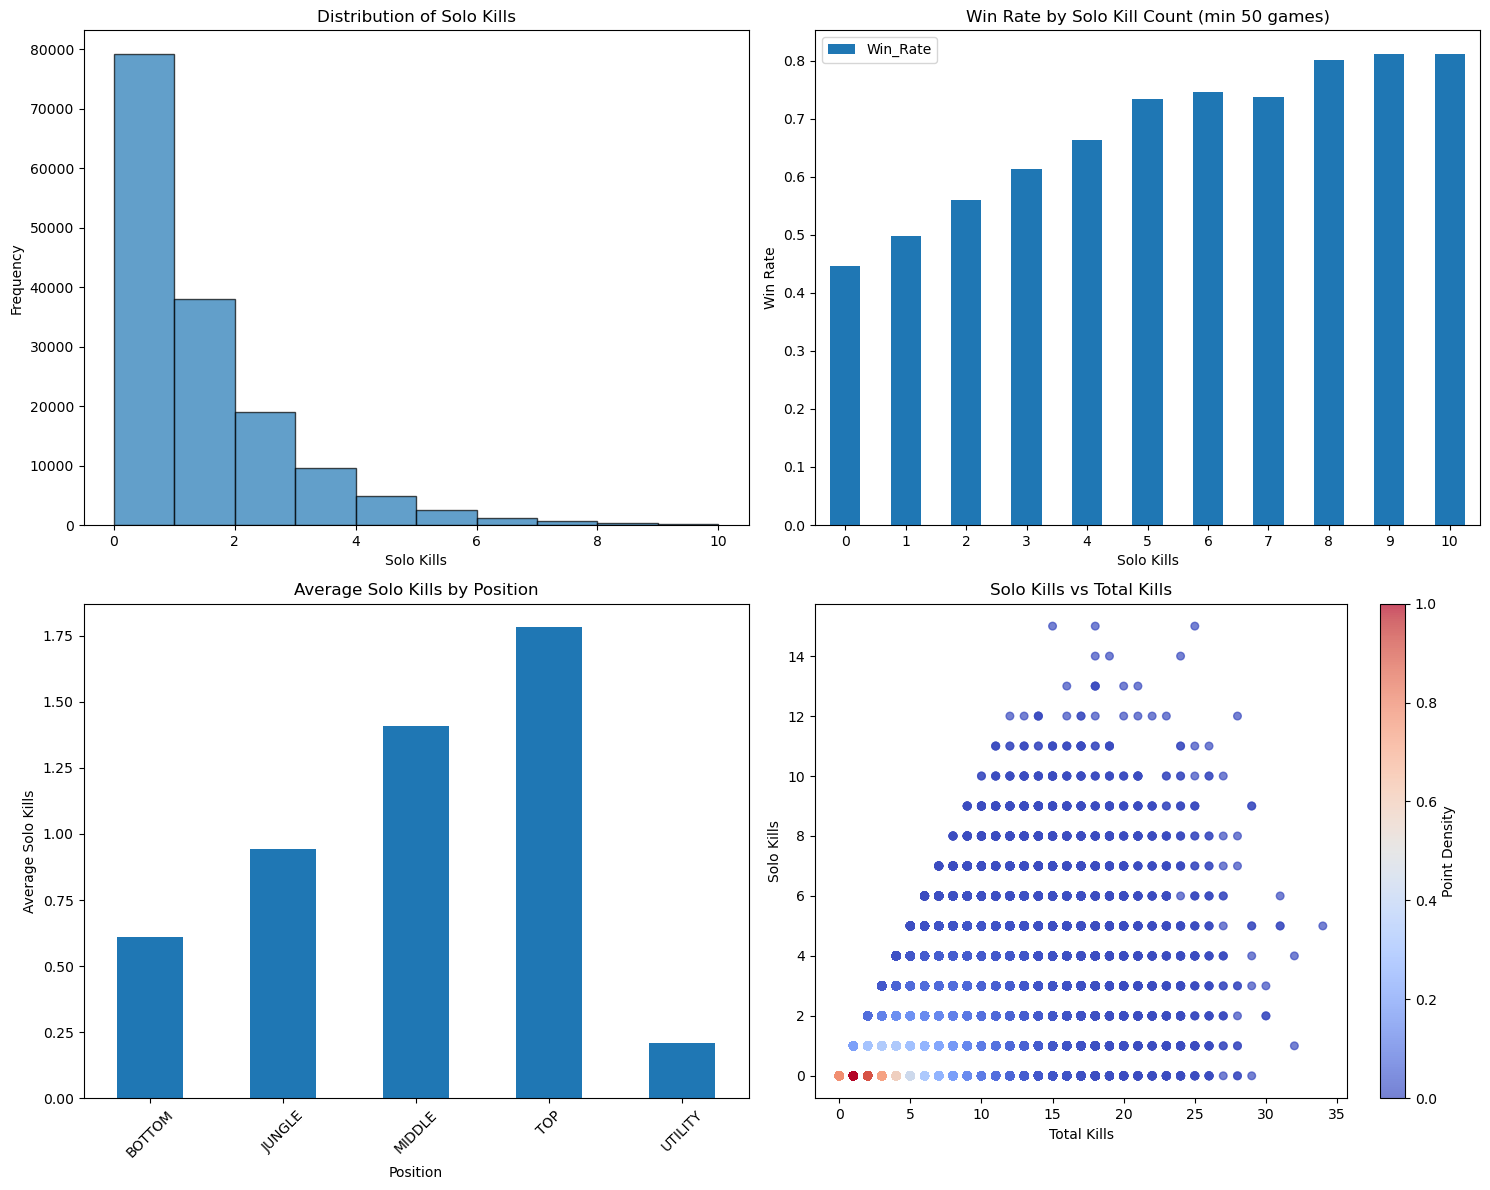

In [29]:
# Solo Kills Correlation with Win Rate EDA
print(f"Total games: {len(cleaned_df)}")
print(f"Games with solo kills: {(cleaned_df['soloKills'] > 0).sum()}")
print(f"Percentage with solo kills: {(cleaned_df['soloKills'] > 0).mean() * 100:.2f}%")

# Solo kills by win/loss
win_loss_solo = cleaned_df.groupby('win')['soloKills'].agg(['count', 'mean', 'std']).round(3)
print(f"\nSolo Kills by Win/Loss:")
print(win_loss_solo)

# --- Changes are here ---
# Win rate by solo kill count
solo_kill_win_rates = cleaned_df.groupby('soloKills')['win'].agg(['count', 'mean']).round(3)
solo_kill_win_rates.columns = ['Games', 'Win_Rate']
# Filter for statistical significance
solo_kill_win_rates = solo_kill_win_rates[solo_kill_win_rates['Games'] >= 50]
print(f"\nWin Rate by Solo Kill Count (min 50 games):")
print(solo_kill_win_rates)
# --- End of changes ---

# Solo kills by position
position_solo = cleaned_df.groupby('teamPosition')['soloKills'].agg(['count', 'mean']).round(3)
print(f"\nSolo Kills by Position:")
print(position_solo)

# Top champions by solo kills (min 50 games)
champ_solo = cleaned_df.groupby('championName')['soloKills'].agg(['count', 'mean']).round(3)
champ_solo_filtered = champ_solo[champ_solo['count'] >= 50].sort_values('mean', ascending=False)
print(f"\nTop 10 Champions by Solo Kills (min 50 games):")
print(champ_solo_filtered.head(10))

# Correlation with other metrics
correlation_columns = ['soloKills', 'kills', 'deaths', 'assists', 'damagePerMinute', 'totalDamageDealtToChampions', 'goldEarned']
correlation_matrix = cleaned_df[correlation_columns].corr()
print(f"\nCorrelation with Solo Kills:")
print(correlation_matrix['soloKills'].sort_values(ascending=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Solo kills distribution
axes[0,0].hist(cleaned_df['soloKills'], bins=range(0, 11), alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Solo Kills')
axes[0,0].set_xlabel('Solo Kills')
axes[0,0].set_ylabel('Frequency')

# 2. Win rate by solo kills (now uses the filtered data)
solo_kill_win_rates.plot(kind='bar', ax=axes[0,1], y='Win_Rate')
axes[0,1].set_title('Win Rate by Solo Kill Count (min 50 games)')
axes[0,1].set_xlabel('Solo Kills')
axes[0,1].set_ylabel('Win Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Solo kills by position
position_solo['mean'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Solo Kills by Position')
axes[1,0].set_xlabel('Position')
axes[1,0].set_ylabel('Average Solo Kills')
axes[1,0].tick_params(axis='x', rotation=45)


# 4. Solo kills vs total kills scatter with density coloring
from scipy.stats import gaussian_kde

x = cleaned_df['kills']
y = cleaned_df['soloKills']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize z to spread colors more evenly
z_normalized = (z - z.min()) / (z.max() - z.min())

scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='coolwarm')
axes[1,1].set_title('Solo Kills vs Total Kills')
axes[1,1].set_xlabel('Total Kills')
axes[1,1].set_ylabel('Solo Kills')

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Point Density')


plt.tight_layout()
plt.show()

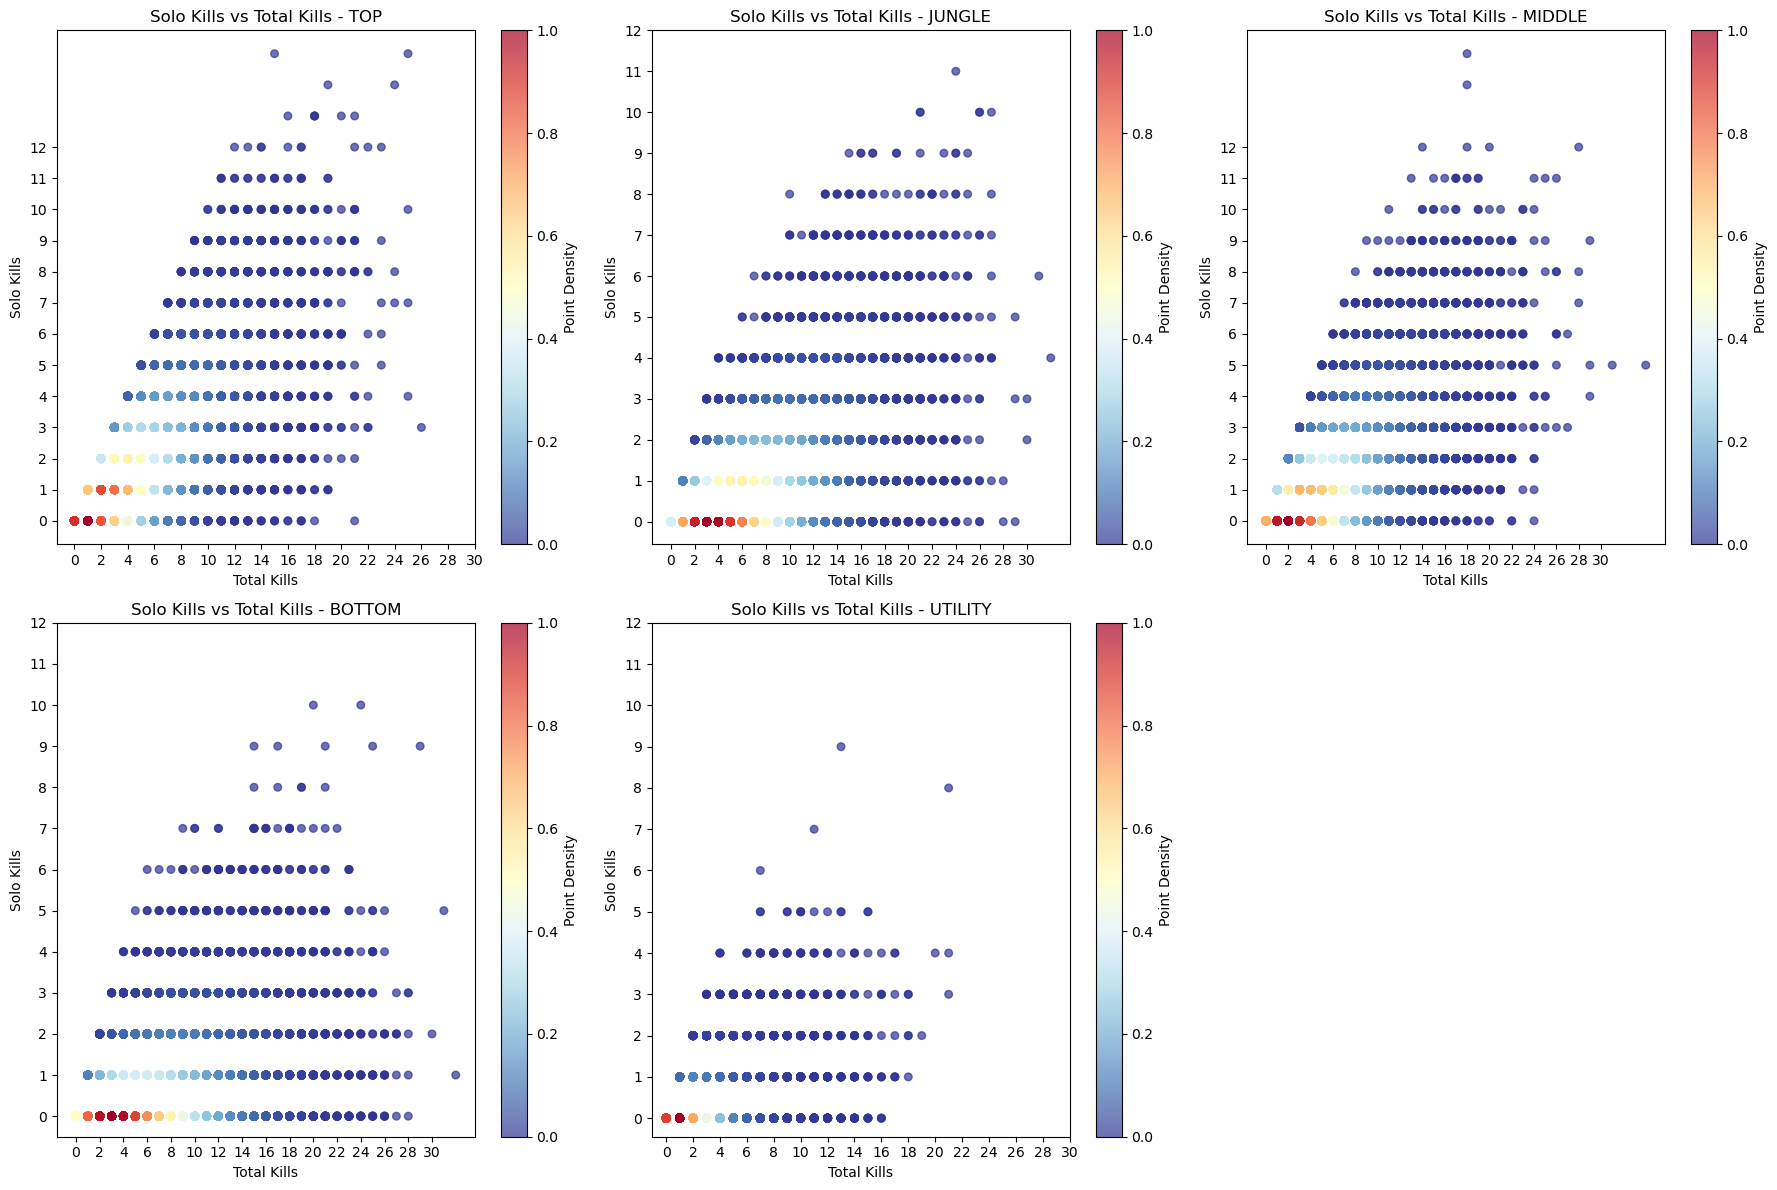

In [30]:
# Solo kills vs total kills scatter by position
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
positions = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']


# Option 1: Use 'viridis' for better contrast
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='viridis')

# Option 2: Use 'plasma' for bright colors
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='plasma')

# Option 3: Use 'hot' for fire-like colors (dark to bright)
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='hot')

# Option 4: Use 'RdYlBu_r' (red-yellow-blue reversed) for better contrast
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='RdYlBu_r')

for i, position in enumerate(positions):
    row = i // 3
    col = i % 3
    
    pos_data = cleaned_df[cleaned_df['teamPosition'] == position]
    x = pos_data['kills']
    y = pos_data['soloKills']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    z_normalized = (z - z.min()) / (z.max() - z.min())
    
    scatter = axes[row, col].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='RdYlBu_r')
    axes[row, col].set_title(f'Solo Kills vs Total Kills - {position}')
    axes[row, col].set_xlabel('Total Kills')
    axes[row, col].set_ylabel('Solo Kills')
    axes[row, col].set_xticks(range(0, 32, 2))
    axes[row, col].set_yticks(range(0, 13, 1))
    
    cbar = plt.colorbar(scatter, ax=axes[row, col])
    cbar.set_label('Point Density')

# Remove the empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [31]:
# Group by position and solo kills, then calculate win rate and game count
win_rate_by_lane_solo_kills = cleaned_df.groupby(['teamPosition', 'soloKills'])['win'].agg(['mean', 'count']).round(3)

# Rename columns for clarity
win_rate_by_lane_solo_kills.columns = ['Win_Rate', 'Games']

# Display the results for each position
print("=== Win Rate by Solo Kills for Each Lane ===\n")

# Get unique positions sorted for consistent output
positions = sorted(cleaned_df['teamPosition'].unique())

for position in positions:
    print(f"--- {position} ---")
    
    # Use .loc to select data for the current position from the multi-index
    position_data = win_rate_by_lane_solo_kills.loc[position]
    
    # Display the win rates, filtering for a reasonable number of games to ensure statistical significance
    print(position_data[position_data['Games'] >= 20])
    print("\n" + "="*30 + "\n")

=== Win Rate by Solo Kills for Each Lane ===

--- BOTTOM ---
           Win_Rate  Games
soloKills                 
0             0.459  18874
1             0.529   7949
2             0.601   2779
3             0.654    990
4             0.686    338
5             0.770    122
6             0.731     52
7             0.773     22


--- JUNGLE ---
           Win_Rate  Games
soloKills                 
0             0.428  14735
1             0.513   8994
2             0.593   4214
3             0.647   1817
4             0.686    810
5             0.736    307
6             0.729    144
7             0.710     69
8             0.800     30


--- MIDDLE ---
           Win_Rate  Games
soloKills                 
0             0.394  11116
1             0.486   8620
2             0.558   5305
3             0.605   2907
4             0.668   1578
5             0.742    783
6             0.754    418
7             0.790    224
8             0.804    107
9             0.783     46


--- TOP ---


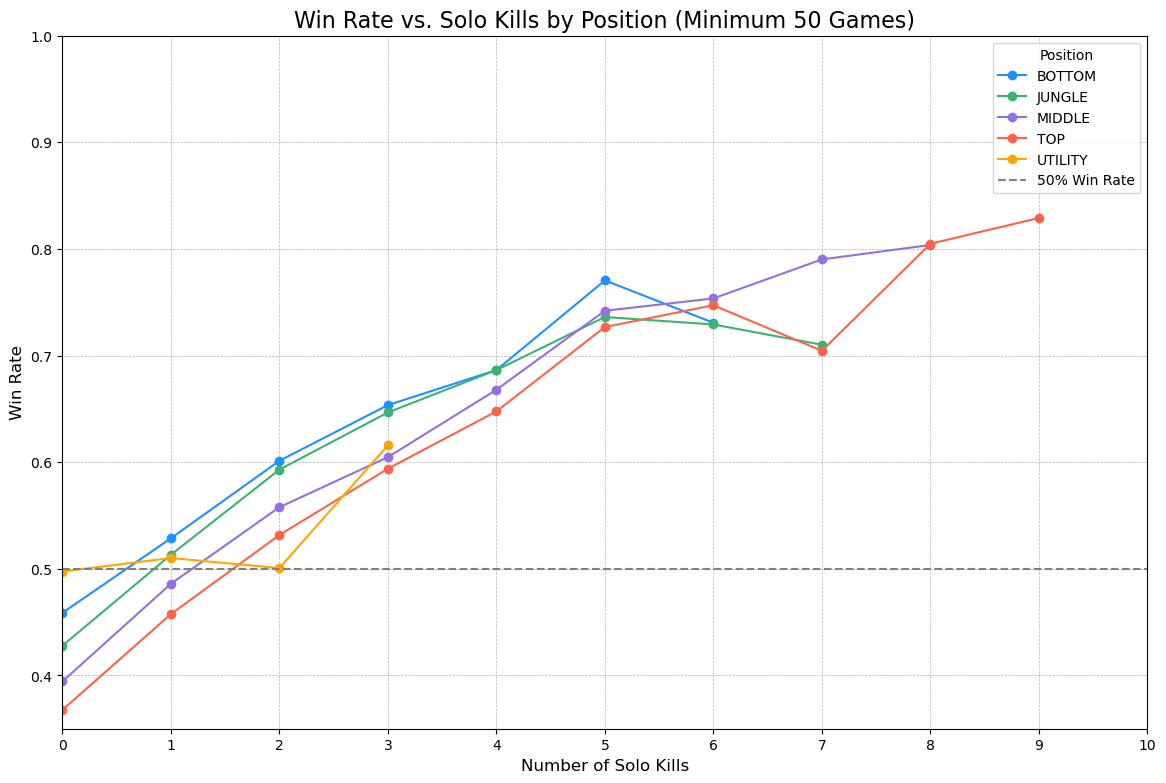

In [32]:
# Group data by position and solo kills to calculate win rate and game count
win_rate_by_lane = cleaned_df.groupby(['teamPosition', 'soloKills'])['win'].agg(['mean', 'count']).reset_index()
win_rate_by_lane.columns = ['teamPosition', 'soloKills', 'Win_Rate', 'Games']

# Set up the plot
plt.figure(figsize=(14, 9))
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

# Plot a line for each position
for position in positions:
    # Filter data for the current position and ensure a minimum number of games for statistical relevance
    position_data = win_rate_by_lane[
        (win_rate_by_lane['teamPosition'] == position) & 
        (win_rate_by_lane['Games'] >= 50)
    ]
    
    if not position_data.empty:
        plt.plot(position_data['soloKills'], position_data['Win_Rate'], marker='o', linestyle='-', label=position, color=colors.get(position, 'black'))

# Add plot details
plt.title('Win Rate vs. Solo Kills by Position (Minimum 50 Games)', fontsize=16)
plt.xlabel('Number of Solo Kills', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
plt.legend(title='Position')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Changes are here ---
# Set x-axis ticks to go from 0 to 10
plt.xticks(range(0, 11))
# Set the x-axis limit to stop at 10
plt.xlim(0, 10)
# --- End of changes ---

plt.ylim(0.35, 1.0)
plt.show()

**Key Takeaways:**
- Top has the highest number of solo kills due to top being the most isolated lane
- Bottom and Utility both have the lowest, as it is the only lane where there are two players 

### First Blood Kill

=== First Blood Kill Impact on Win Rate ===

--- Overall Win Rate by First Blood ---
                         Win_Rate   Games
Did Not Get First Blood     0.492  140238
Got First Blood             0.572   15452


--- Win Rate by Position for Getting First Blood ---
              Win_Rate_with_FB  First_Bloods
teamPosition                                
JUNGLE                   0.593          3458
TOP                      0.572          3298
BOTTOM                   0.567          3937
MIDDLE                   0.564          2893
UTILITY                  0.557          1866


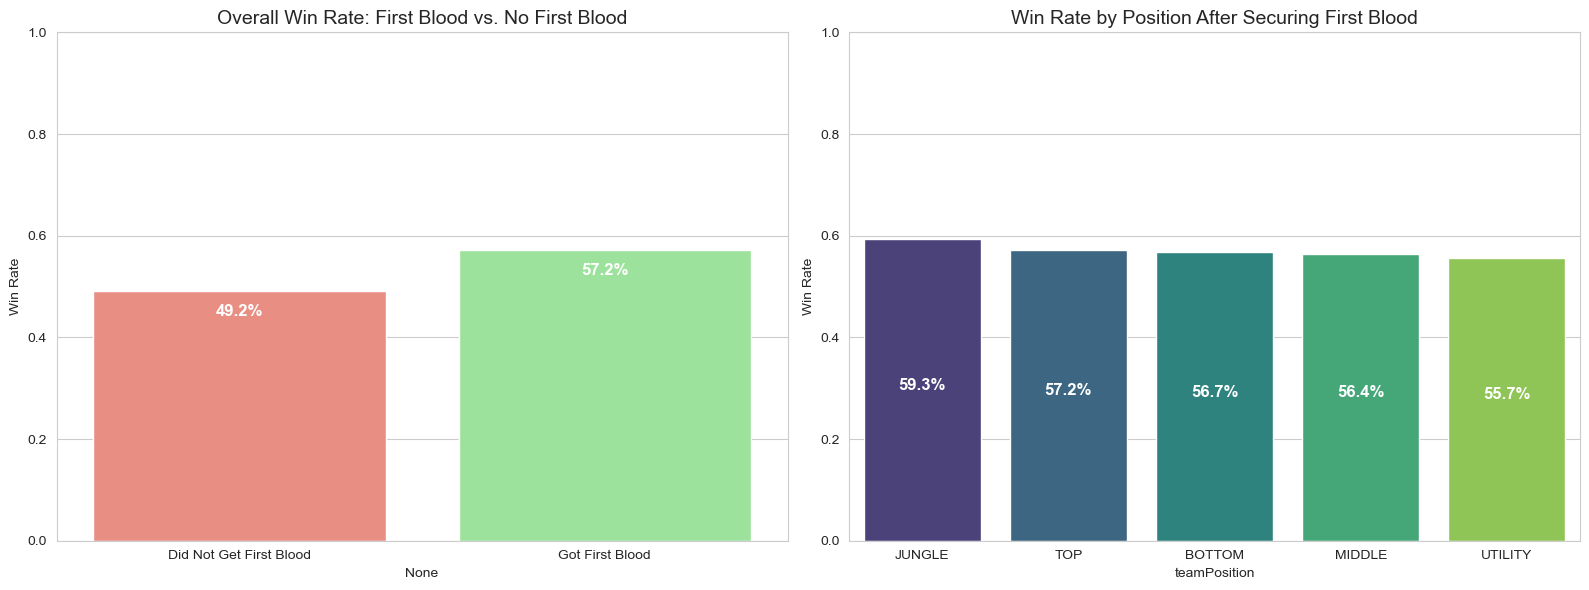

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Overall First Blood Impact ---
print("=== First Blood Kill Impact on Win Rate ===\n")

# Calculate win rate for players who got first blood vs. those who didn't
fb_win_rate = cleaned_df.groupby('firstBloodKill')['win'].agg(['mean', 'count']).round(3)
fb_win_rate.columns = ['Win_Rate', 'Games']
fb_win_rate.index = ['Did Not Get First Blood', 'Got First Blood']

print("--- Overall Win Rate by First Blood ---")
print(fb_win_rate)
print("\n" + "="*40 + "\n")


# --- 2. First Blood Impact by Position ---
print("--- Win Rate by Position for Getting First Blood ---")

# Group by position for players who secured first blood
fb_by_position = cleaned_df[cleaned_df['firstBloodKill'] == True].groupby('teamPosition')['win'].agg(['mean', 'count']).round(3)
fb_by_position.columns = ['Win_Rate_with_FB', 'First_Bloods']
fb_by_position = fb_by_position.sort_values('Win_Rate_with_FB', ascending=False)

print(fb_by_position)


# --- 3. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# Bar chart for overall win rate
# --- FIX: Updated to modern seaborn standard ---
sns.barplot(x=fb_win_rate.index, y=fb_win_rate['Win_Rate'], ax=axes[0], hue=fb_win_rate.index, palette=['salmon', 'lightgreen'], legend=False)
axes[0].set_title('Overall Win Rate: First Blood vs. No First Blood', fontsize=14)
axes[0].set_ylabel('Win Rate')
axes[0].set_ylim(0, 1.0)
# Add percentage labels
for index, value in enumerate(fb_win_rate['Win_Rate']):
    axes[0].text(index, value - 0.05, f'{value:.1%}', ha='center', color='white', fontsize=12, weight='bold')


# Bar chart for win rate by position
# --- FIX: Updated to modern seaborn standard ---
sns.barplot(x=fb_by_position.index, y=fb_by_position['Win_Rate_with_FB'], ax=axes[1], hue=fb_by_position.index, palette='viridis', legend=False)
axes[1].set_title('Win Rate by Position After Securing First Blood', fontsize=14)
axes[1].set_ylabel('Win Rate')
axes[1].set_ylim(0, 1.0)
# Add percentage labels
for index, value in enumerate(fb_by_position['Win_Rate_with_FB']):
    axes[1].text(index, value / 2, f'{value:.1%}', ha='center', color='white', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


**Key Takeaway**
- Teams/players that gets first Blood has a 57.2% Win Rate
- The highest win rate is Jungle, 59.3% Win Rate after getting first blood. This can be explained by jungler's ability to control more of the map while being ahead

### Damage Per Minute

=== Damage Per Minute (DPM) Correlation with Win Rate ===

--- Average DPM in Wins vs. Losses ---
        mean     std
Loss  613.17  286.31
Win   749.91  334.11


--- Average DPM by Position ---
teamPosition
BOTTOM     797.34
MIDDLE     790.12
TOP        760.55
JUNGLE     682.73
UTILITY    376.96
Name: damagePerMinute, dtype: float64


--- Win Rate Across DPM Ranges (min 50 games) ---
           Win_Rate  Games
dpm_bins                  
0-200         0.318   4453
201-400       0.399  27982
401-600       0.416  35801
601-800       0.494  36920
801-1000      0.586  26224
1001-1200     0.658  14111
1200+         0.736  10199




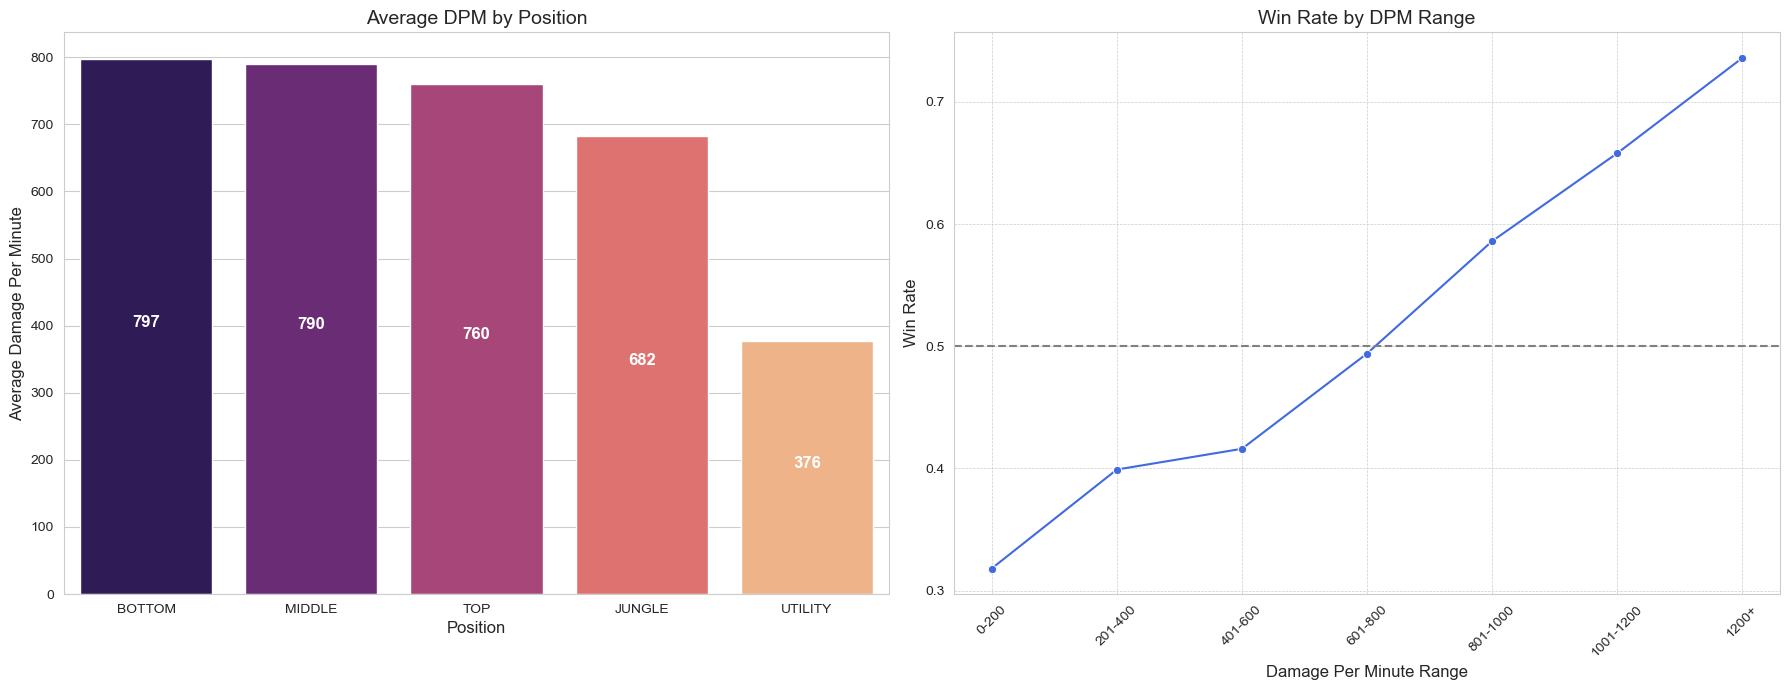

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Overall DPM for Wins vs. Losses ---
print("=== Damage Per Minute (DPM) Correlation with Win Rate ===\n")

# Calculate average DPM for winning and losing games
dpm_win_loss = cleaned_df.groupby('win')['damagePerMinute'].agg(['mean', 'std']).round(2)
dpm_win_loss.index = ['Loss', 'Win']

print("--- Average DPM in Wins vs. Losses ---")
print(dpm_win_loss)
print("\n" + "="*40 + "\n")


# --- 2. DPM by Position ---
print("--- Average DPM by Position ---")

# Calculate the average DPM for each role
dpm_by_position = cleaned_df.groupby('teamPosition')['damagePerMinute'].mean().round(2).sort_values(ascending=False)

print(dpm_by_position)
print("\n" + "="*40 + "\n")


# --- 3. Win Rate by DPM Bins ---
print("--- Win Rate Across DPM Ranges (min 50 games) ---")

# Create DPM bins to analyze win rate across different damage brackets
bins = [0, 200, 400, 600, 800, 1000, 1200, np.inf]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1200+']
cleaned_df['dpm_bins'] = pd.cut(cleaned_df['damagePerMinute'], bins=bins, labels=labels, right=False)

# Calculate win rate for each DPM bin
# --- FIX: Added observed=False to silence the warning and maintain current behavior ---
win_rate_by_dpm = cleaned_df.groupby('dpm_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_dpm.columns = ['Win_Rate', 'Games']
# Filter for bins with enough games to be statistically significant
win_rate_by_dpm = win_rate_by_dpm[win_rate_by_dpm['Games'] >= 50]

print(win_rate_by_dpm)
print("\n" + "="*40 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Bar chart for DPM by position
sns.barplot(x=dpm_by_position.index, y=dpm_by_position.values, ax=axes[0], hue=dpm_by_position.index, palette='magma', legend=False)
axes[0].set_title('Average DPM by Position', fontsize=14)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Average Damage Per Minute', fontsize=12)
for index, value in enumerate(dpm_by_position.values):
    axes[0].text(index, value / 2, f'{int(value)}', ha='center', color='white', fontsize=12, weight='bold')


# Line plot for Win Rate by DPM Bins
sns.lineplot(x=win_rate_by_dpm.index, y=win_rate_by_dpm['Win_Rate'], ax=axes[1], marker='o', color='royalblue')
axes[1].set_title('Win Rate by DPM Range', fontsize=14)
axes[1].set_xlabel('Damage Per Minute Range', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


**Key Takeaways**
- Bottom lane has th3e highest average damage per minute. Most champions are ranged in this category, and their identity is to deal damage (Attack Damage Carry)
- There is a steep upwards trend with higher DPM and Win Rate

### Kills Deaths and Assists

=== KDA Correlation with Win Rate ===

--- Average KDA in Wins vs. Losses ---
      kills  deaths  assists
Loss   4.15    6.62     6.09
Win    6.60    4.17    10.11


--- Average KDA by Position ---
              kills  deaths  assists
teamPosition                        
BOTTOM         6.57    5.49     6.95
JUNGLE         7.08    5.19     7.95
MIDDLE         6.01    5.28     6.58
TOP            4.97    5.46     5.39
UTILITY        2.26    5.56    13.63


--- Win Rate by Binned Stats (min 50 games) ---

Kills:
           Win_Rate  Games
kill_bins                 
0             0.269  11392
1-2           0.356  34605
3-4           0.434  32427
5-6           0.525  25872
7-8           0.600  19211
9-10          0.670  13060
11+           0.759  19123

Deaths:
            Win_Rate  Games
death_bins                 
0              0.949   4786
1-2            0.839  23163
3-4            0.621  36272
5-6            0.432  38595
7-8            0.309  28808
9-10           0.248  15541
11+     

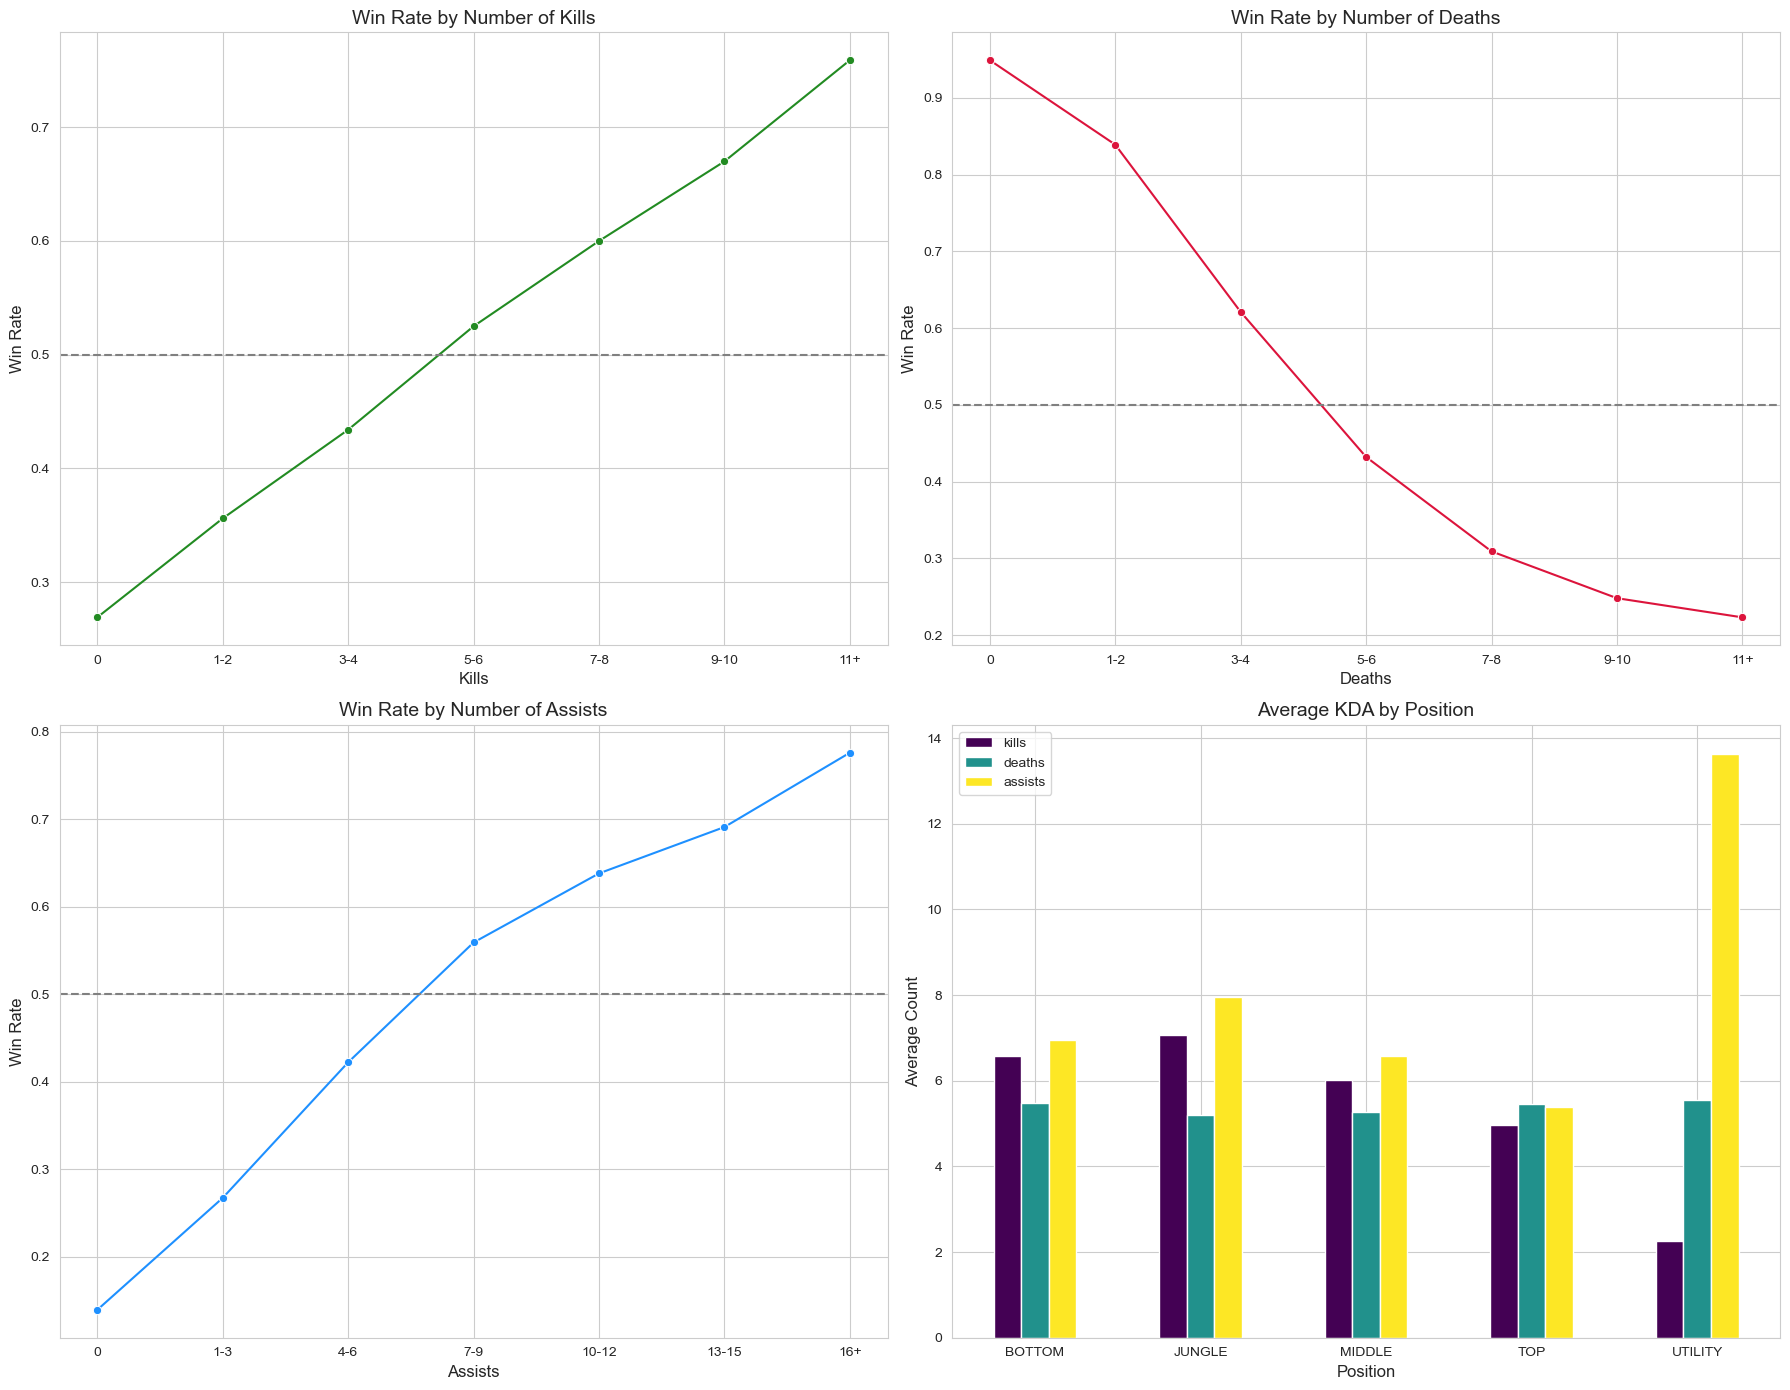

In [46]:
# --- 1. Overall KDA for Wins vs. Losses ---
print("=== KDA Correlation with Win Rate ===\n")

# Calculate the average KDA for winning and losing games
kda_win_loss = cleaned_df.groupby('win')[['kills', 'deaths', 'assists']].mean().round(2)
kda_win_loss.index = ['Loss', 'Win']

print("--- Average KDA in Wins vs. Losses ---")
print(kda_win_loss)
print("\n" + "="*40 + "\n")


# --- 2. KDA by Position ---
print("--- Average KDA by Position ---")

# Calculate the average KDA for each role
kda_by_position = cleaned_df.groupby('teamPosition')[['kills', 'deaths', 'assists']].mean().round(2)

print(kda_by_position)
print("\n" + "="*40 + "\n")


# --- 3. Win Rate by KDA Bins ---
# We create bins for each stat to see how win probability changes as they increase.

# Kills Bins
bins_k = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_k = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['kill_bins'] = pd.cut(cleaned_df['kills'], bins=bins_k, labels=labels_k, right=True)
win_rate_by_kills = cleaned_df.groupby('kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_kills.columns = ['Win_Rate', 'Games']

# Deaths Bins
bins_d = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_d = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['death_bins'] = pd.cut(cleaned_df['deaths'], bins=bins_d, labels=labels_d, right=True)
win_rate_by_deaths = cleaned_df.groupby('death_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_deaths.columns = ['Win_Rate', 'Games']

# Assists Bins
bins_a = [-1, 0, 3, 6, 9, 12, 15, np.inf]
labels_a = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
cleaned_df['assist_bins'] = pd.cut(cleaned_df['assists'], bins=bins_a, labels=labels_a, right=True)
win_rate_by_assists = cleaned_df.groupby('assist_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_assists.columns = ['Win_Rate', 'Games']

print("--- Win Rate by Binned Stats (min 50 games) ---")
print("\nKills:")
print(win_rate_by_kills[win_rate_by_kills['Games'] >= 50])
print("\nDeaths:")
print(win_rate_by_deaths[win_rate_by_deaths['Games'] >= 50])
print("\nAssists:")
print(win_rate_by_assists[win_rate_by_assists['Games'] >= 50])
print("\n" + "="*40 + "\n")


# --- 4. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")

# Plot 1: Win Rate by Kills
sns.lineplot(x=win_rate_by_kills.index, y=win_rate_by_kills['Win_Rate'], ax=axes[0, 0], marker='o', color='forestgreen')
axes[0, 0].set_title('Win Rate by Number of Kills', fontsize=14)
axes[0, 0].set_xlabel('Kills', fontsize=12)
axes[0, 0].set_ylabel('Win Rate', fontsize=12)
axes[0, 0].axhline(y=0.5, color='grey', linestyle='--')

# Plot 2: Win Rate by Deaths
sns.lineplot(x=win_rate_by_deaths.index, y=win_rate_by_deaths['Win_Rate'], ax=axes[0, 1], marker='o', color='crimson')
axes[0, 1].set_title('Win Rate by Number of Deaths', fontsize=14)
axes[0, 1].set_xlabel('Deaths', fontsize=12)
axes[0, 1].set_ylabel('Win Rate', fontsize=12)
axes[0, 1].axhline(y=0.5, color='grey', linestyle='--')

# Plot 3: Win Rate by Assists
sns.lineplot(x=win_rate_by_assists.index, y=win_rate_by_assists['Win_Rate'], ax=axes[1, 0], marker='o', color='dodgerblue')
axes[1, 0].set_title('Win Rate by Number of Assists', fontsize=14)
axes[1, 0].set_xlabel('Assists', fontsize=12)
axes[1, 0].set_ylabel('Win Rate', fontsize=12)
axes[1, 0].axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: KDA by Position
kda_by_position.plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Average KDA by Position', fontsize=14)
axes[1, 1].set_xlabel('Position', fontsize=12)
axes[1, 1].set_ylabel('Average Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


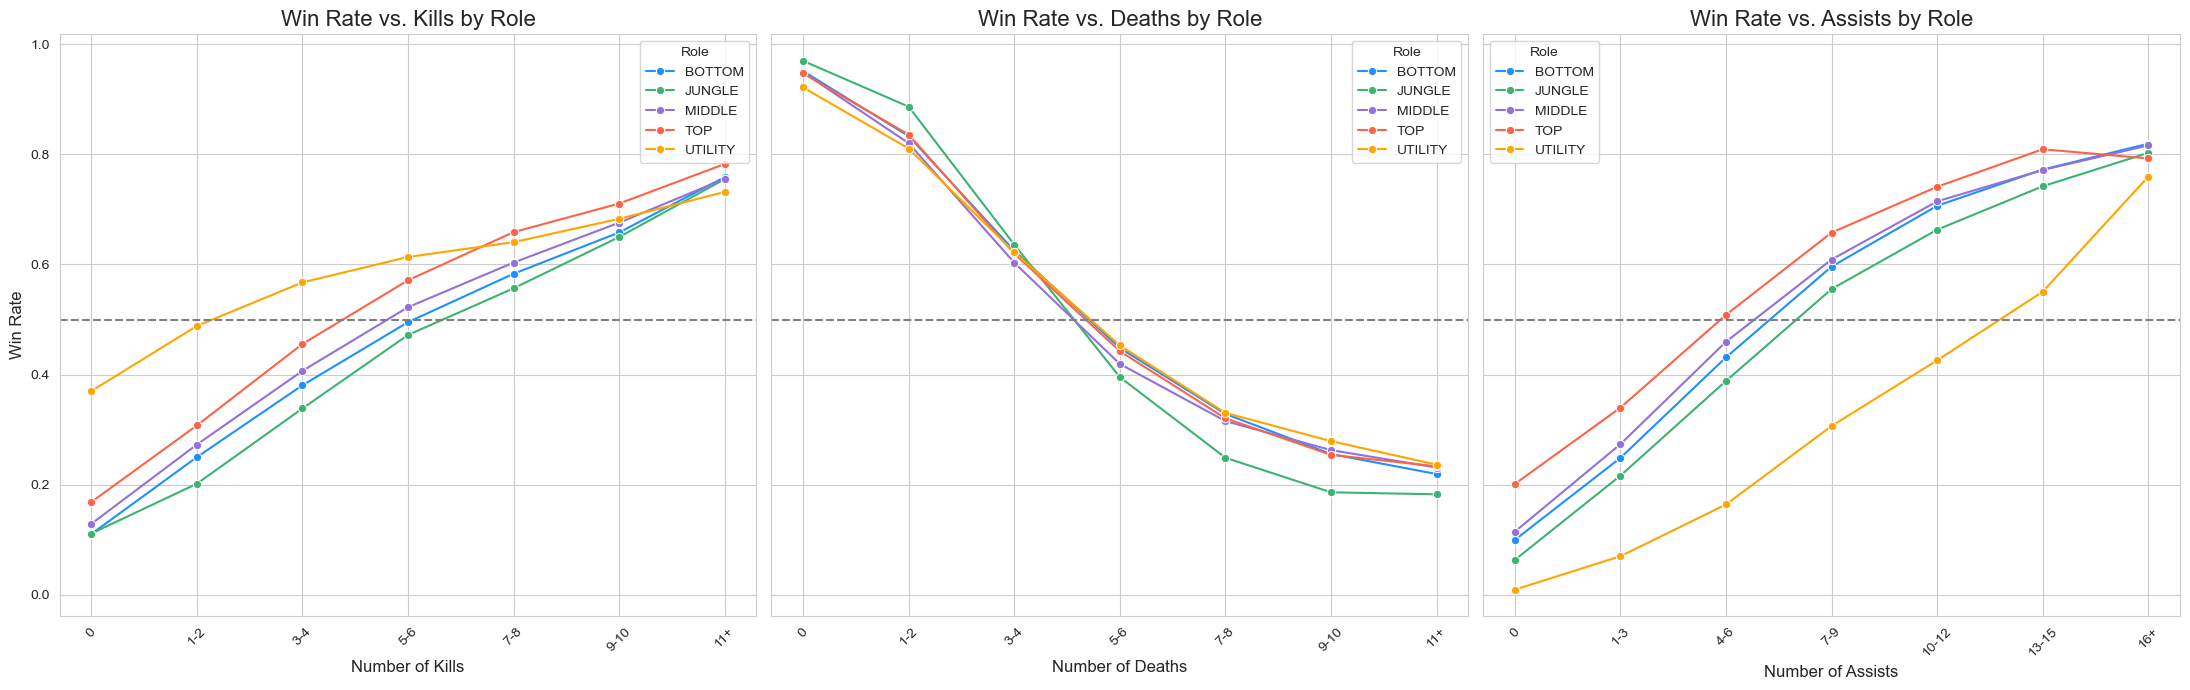

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
# We'll use the same bins as the previous analysis for consistency.
# It's good practice to redefine them here to make the cell self-contained.

# Kills Bins
bins_k = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_k = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['kill_bins'] = pd.cut(cleaned_df['kills'], bins=bins_k, labels=labels_k, right=True)

# Deaths Bins
bins_d = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_d = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['death_bins'] = pd.cut(cleaned_df['deaths'], bins=bins_d, labels=labels_d, right=True)

# Assists Bins
bins_a = [-1, 0, 3, 6, 9, 12, 15, np.inf]
labels_a = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
cleaned_df['assist_bins'] = pd.cut(cleaned_df['assists'], bins=bins_a, labels=labels_a, right=True)

# Group data by role and the binned stats
win_rate_kills_role = cleaned_df.groupby(['teamPosition', 'kill_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()
win_rate_deaths_role = cleaned_df.groupby(['teamPosition', 'death_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()
win_rate_assists_role = cleaned_df.groupby(['teamPosition', 'assist_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()


# --- Visualizations ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
sns.set_style("whitegrid")
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

# --- Plot 1: Win Rate vs. Kills by Role ---
axes[0].set_title('Win Rate vs. Kills by Role', fontsize=16)
for position in positions:
    # Filter for the current role and for statistical significance
    data = win_rate_kills_role[(win_rate_kills_role['teamPosition'] == position) & (win_rate_kills_role['count'] >= 50)]
    sns.lineplot(x='kill_bins', y='mean', data=data, ax=axes[0], label=position, color=colors[position], marker='o')
axes[0].set_xlabel('Number of Kills', fontsize=12)
axes[0].set_ylabel('Win Rate', fontsize=12)
axes[0].axhline(y=0.5, color='grey', linestyle='--')
axes[0].legend(title='Role')
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Win Rate vs. Deaths by Role ---
axes[1].set_title('Win Rate vs. Deaths by Role', fontsize=16)
for position in positions:
    data = win_rate_deaths_role[(win_rate_deaths_role['teamPosition'] == position) & (win_rate_deaths_role['count'] >= 50)]
    sns.lineplot(x='death_bins', y='mean', data=data, ax=axes[1], label=position, color=colors[position], marker='o')
axes[1].set_xlabel('Number of Deaths', fontsize=12)
axes[1].set_ylabel('') # Hide redundant y-axis label
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].legend(title='Role')
axes[1].tick_params(axis='x', rotation=45)

# --- Plot 3: Win Rate vs. Assists by Role ---
axes[2].set_title('Win Rate vs. Assists by Role', fontsize=16)
for position in positions:
    data = win_rate_assists_role[(win_rate_assists_role['teamPosition'] == position) & (win_rate_assists_role['count'] >= 50)]
    sns.lineplot(x='assist_bins', y='mean', data=data, ax=axes[2], label=position, color=colors[position], marker='o')
axes[2].set_xlabel('Number of Assists', fontsize=12)
axes[2].set_ylabel('') # Hide redundant y-axis label
axes[2].axhline(y=0.5, color='grey', linestyle='--')
axes[2].legend(title='Role')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Creep Score

=== Creep Score (CS) Analysis for Laning Roles ===

--- Average CS Metrics in Wins vs. Losses (for Laners) ---
      csPerMinute  laneMinionsFirst10Minutes  maxCsAdvantageOnLaneOpponent
Loss         6.93                      66.68                         21.00
Win          7.26                      69.09                         29.67


--- Average CS Metrics by Position ---
              csPerMinute  laneMinionsFirst10Minutes  \
teamPosition                                           
BOTTOM               7.23                      62.36   
MIDDLE               7.07                      72.32   
TOP                  7.00                      68.98   

              maxCsAdvantageOnLaneOpponent  
teamPosition                                
BOTTOM                               24.85  
MIDDLE                               24.60  
TOP                                  26.56  


--- Win Rate by Max CS Advantage on Lane Opponent ---
             Win_Rate  Games
cs_adv_bins                 
0  

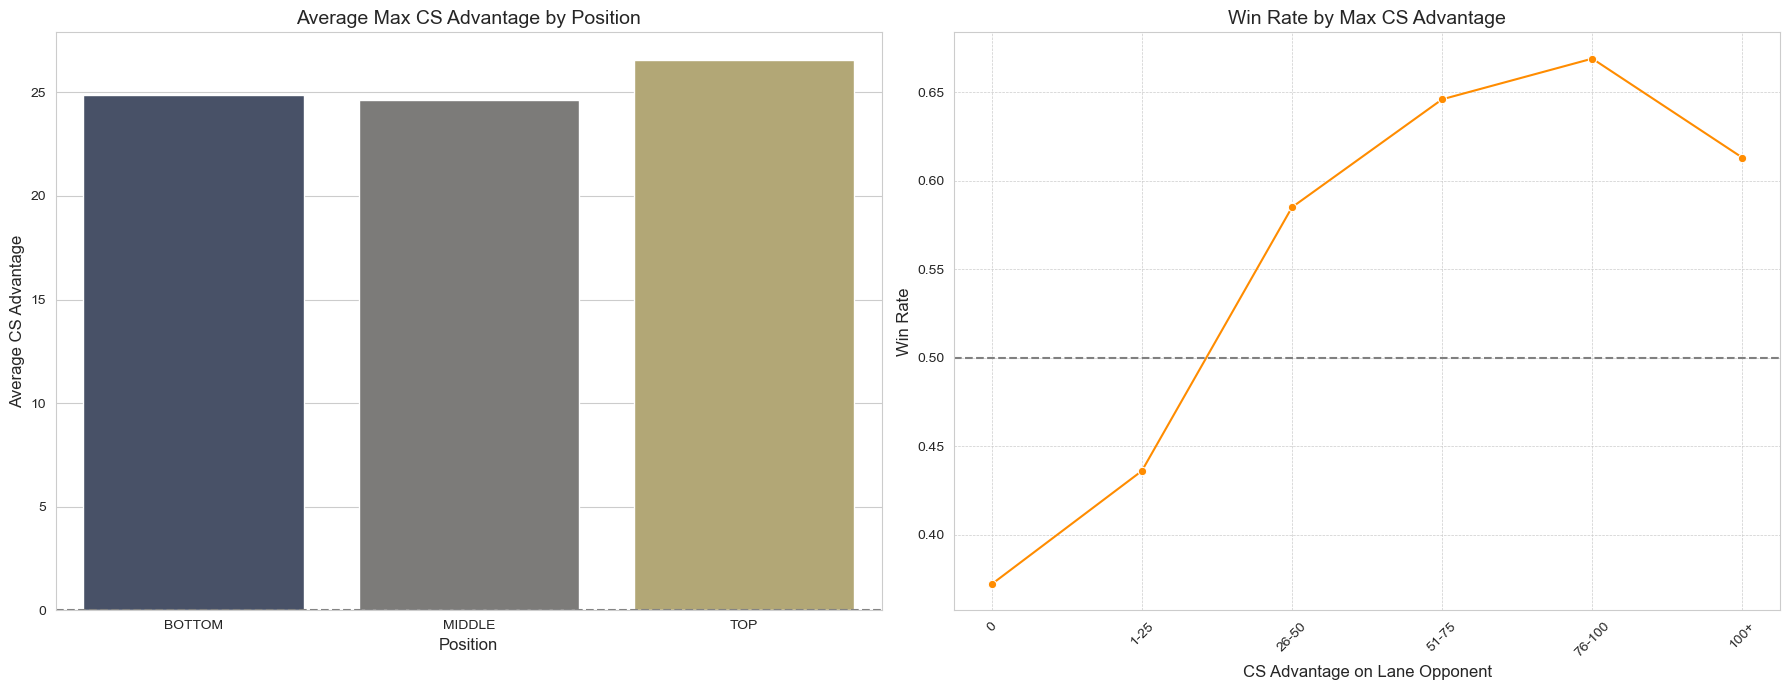

In [53]:
# Filter the DataFrame to only include the three laning roles.
laner_roles = ['TOP', 'MIDDLE', 'BOTTOM']
laner_df = cleaned_df[cleaned_df['teamPosition'].isin(laner_roles)].copy()

# Calculate CS Per Minute, a standardized metric for farm rate.
# Ensure gameDuration is not zero to avoid division errors.
laner_df['csPerMinute'] = laner_df.apply(
    lambda row: row['totalMinionsKilled'] / (row['gameDuration'] / 60) if row['gameDuration'] > 0 else 0,
    axis=1
)

print("=== Creep Score (CS) Analysis for Laning Roles ===\n")

# --- 2. Overall CS Metrics for Wins vs. Losses ---
print("--- Average CS Metrics in Wins vs. Losses (for Laners) ---")

# Define the key CS metrics we want to analyze
cs_metrics = ['csPerMinute', 'laneMinionsFirst10Minutes', 'maxCsAdvantageOnLaneOpponent']
cs_win_loss = laner_df.groupby('win')[cs_metrics].mean().round(2)
cs_win_loss.index = ['Loss', 'Win']

print(cs_win_loss)
print("\n" + "="*50 + "\n")

# --- 3. CS Metrics by Position ---
print("--- Average CS Metrics by Position ---")

cs_by_position = laner_df.groupby('teamPosition')[cs_metrics].mean().round(2)
print(cs_by_position)
print("\n" + "="*50 + "\n")

# --- 4. Win Rate by CS Advantage ---
print("--- Win Rate by Max CS Advantage on Lane Opponent ---")

# Create bins for CS advantage to see how win rate scales with a farming lead.
bins_cs = [-np.inf, -50, -25, -1, 0, 25, 50, 75, 100, np.inf]
labels_cs = ['-50+', '-49 to -25', '-24 to -1', '0', '1-25', '26-50', '51-75', '76-100', '100+']
laner_df['cs_adv_bins'] = pd.cut(laner_df['maxCsAdvantageOnLaneOpponent'], bins=bins_cs, labels=labels_cs, right=True)

win_rate_by_cs_adv = laner_df.groupby('cs_adv_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_cs_adv.columns = ['Win_Rate', 'Games']
win_rate_by_cs_adv = win_rate_by_cs_adv[win_rate_by_cs_adv['Games'] >= 50]

print(win_rate_by_cs_adv)
print("\n" + "="*50 + "\n")


# --- 5. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Plot 1: Average CS Advantage by Position
sns.barplot(x=cs_by_position.index, y=cs_by_position['maxCsAdvantageOnLaneOpponent'], ax=axes[0], hue=cs_by_position.index, palette='cividis', legend=False)
axes[0].set_title('Average Max CS Advantage by Position', fontsize=14)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Average CS Advantage', fontsize=12)
axes[0].axhline(y=0, color='grey', linestyle='--')

# Plot 2: Win Rate by CS Advantage
sns.lineplot(x=win_rate_by_cs_adv.index, y=win_rate_by_cs_adv['Win_Rate'], ax=axes[1], marker='o', color='darkorange')
axes[1].set_title('Win Rate by Max CS Advantage', fontsize=14)
axes[1].set_xlabel('CS Advantage on Lane Opponent', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


=== Creep Score (CS) Analysis for Junglers ===

--- Average Jungle CS Metrics in Wins vs. Losses ---
      jungleCsPerMinute  totalEnemyJungleMinionsKilled  \
Loss               5.33                           9.11   
Win                6.26                          17.09   

      jungleCsBefore10Minutes  maxCsAdvantageOnLaneOpponent  
Loss                    60.68                         18.36  
Win                     63.45                         37.36  


--- Win Rate by Max CS Advantage Over Enemy Jungler ---
                 Win_Rate  Games
cs_adv_bins_jng                 
0                   0.289    947
1-20                0.355  15602
21-40               0.567   6590
41-60               0.693   3796
60+                 0.804   4203




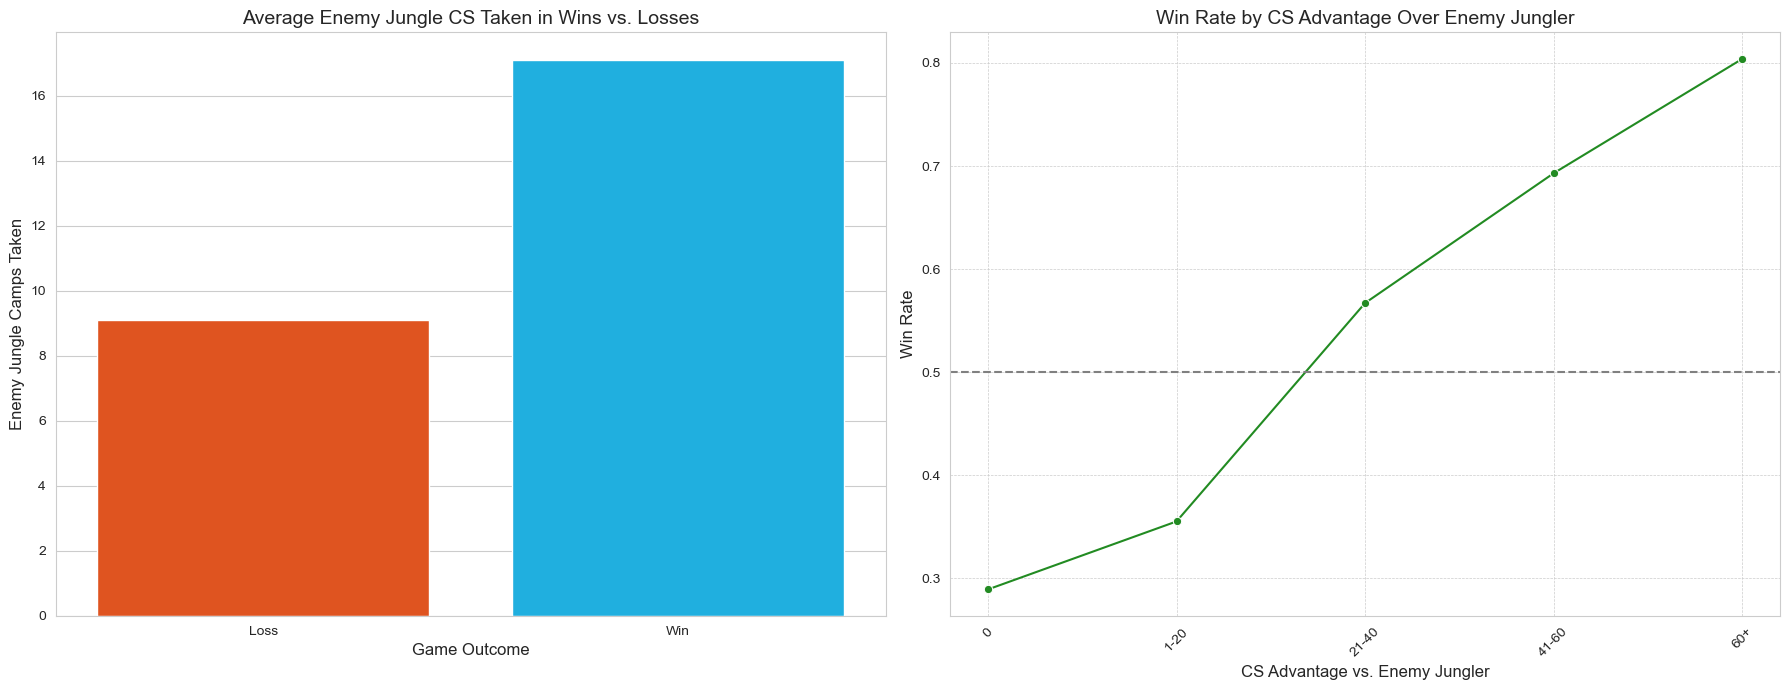

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Preparation ---
# Filter the DataFrame to only include the JUNGLE position.
jungle_df = cleaned_df[cleaned_df['teamPosition'] == 'JUNGLE'].copy()

# Calculate Jungle CS Per Minute from neutral minions killed.
jungle_df['jungleCsPerMinute'] = jungle_df.apply(
    lambda row: row['neutralMinionsKilled'] / (row['gameDuration'] / 60) if row['gameDuration'] > 0 else 0,
    axis=1
)

print("=== Creep Score (CS) Analysis for Junglers ===\n")


# --- 2. Overall Jungle CS Metrics for Wins vs. Losses ---
print("--- Average Jungle CS Metrics in Wins vs. Losses ---")

# Define the key CS metrics relevant to junglers.
# Note: For junglers, 'maxCsAdvantageOnLaneOpponent' compares them to the enemy jungler.
cs_metrics_jungle = ['jungleCsPerMinute', 'totalEnemyJungleMinionsKilled', 'jungleCsBefore10Minutes', 'maxCsAdvantageOnLaneOpponent']
cs_win_loss_jungle = jungle_df.groupby('win')[cs_metrics_jungle].mean().round(2)
cs_win_loss_jungle.index = ['Loss', 'Win']

print(cs_win_loss_jungle)
print("\n" + "="*70 + "\n")


# --- 3. Win Rate by CS Advantage Over Enemy Jungler ---
print("--- Win Rate by Max CS Advantage Over Enemy Jungler ---")

# Create bins for CS advantage to see how win rate scales with a farming lead over the enemy jungler.
bins_cs_jng = [-np.inf, -40, -20, -1, 0, 20, 40, 60, np.inf]
labels_cs_jng = ['-40+', '-39 to -20', '-19 to -1', '0', '1-20', '21-40', '41-60', '60+']
jungle_df['cs_adv_bins_jng'] = pd.cut(jungle_df['maxCsAdvantageOnLaneOpponent'], bins=bins_cs_jng, labels=labels_cs_jng, right=True)

win_rate_by_cs_adv_jng = jungle_df.groupby('cs_adv_bins_jng', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_cs_adv_jng.columns = ['Win_Rate', 'Games']
win_rate_by_cs_adv_jng = win_rate_by_cs_adv_jng[win_rate_by_cs_adv_jng['Games'] >= 50]

print(win_rate_by_cs_adv_jng)
print("\n" + "="*70 + "\n")


# --- 4. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Plot 1: Comparing Enemy Jungle CS in Wins vs. Losses
sns.barplot(
    x=cs_win_loss_jungle.index,
    y=cs_win_loss_jungle['totalEnemyJungleMinionsKilled'],
    ax=axes[0],
    hue=cs_win_loss_jungle.index,
    palette=['orangered', 'deepskyblue'],
    legend=False
)
axes[0].set_title('Average Enemy Jungle CS Taken in Wins vs. Losses', fontsize=14)
axes[0].set_xlabel('Game Outcome', fontsize=12)
axes[0].set_ylabel('Enemy Jungle Camps Taken', fontsize=12)

# Plot 2: Win Rate by CS Advantage
sns.lineplot(x=win_rate_by_cs_adv_jng.index, y=win_rate_by_cs_adv_jng['Win_Rate'], ax=axes[1], marker='o', color='forestgreen')
axes[1].set_title('Win Rate by CS Advantage Over Enemy Jungler', fontsize=14)
axes[1].set_xlabel('CS Advantage vs. Enemy Jungler', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


**Key Takeaways**
- Higher CS/M shows a higher win rate. The winning player with an early advantage can usually pressure the lane harder, denying farm from the opponent. 
- CS = Gold, and gold is one of the most important resources in the game.
- Jungers who take more enemy camps also has a high correlation to winning, however, typically the winning team will have more control over the map, which can indicate a bias towards winning team rather than winning jungler.

## Objectives

### Towers

=== Tower, First Tower Time, and Turret Plate Analysis ===

--- Win Rate by Securing First Tower ---
 Did Not Get First Tower Kill    0.478
Got First Tower Kill            0.710
Name: win, dtype: float64 

--- Win Rate by First Tower Kill Time ---
                        Win_Rate  Games
first_tower_time_bins                 
< 8 min                   0.667     24
8-10 min                  0.754    313
10-12 min                 0.752   2077
12-14 min                 0.743   4956
14-16 min                 0.678   6753
16+ min                   0.657    896 

--- Win Rate by Turret Plates Taken ---
             Win_Rate  Games
plate_bins                 
0              0.417  66393
1              0.485  33301
2              0.537  23937
3              0.602  14275
4              0.672   8278
5              0.715   6964
6+             0.806   2542 

--- Average Turret Plates Taken by Role ---
 teamPosition
TOP        1.91
BOTTOM     1.88
MIDDLE     1.35
UTILITY    1.22
JUNGLE     0.37
Name

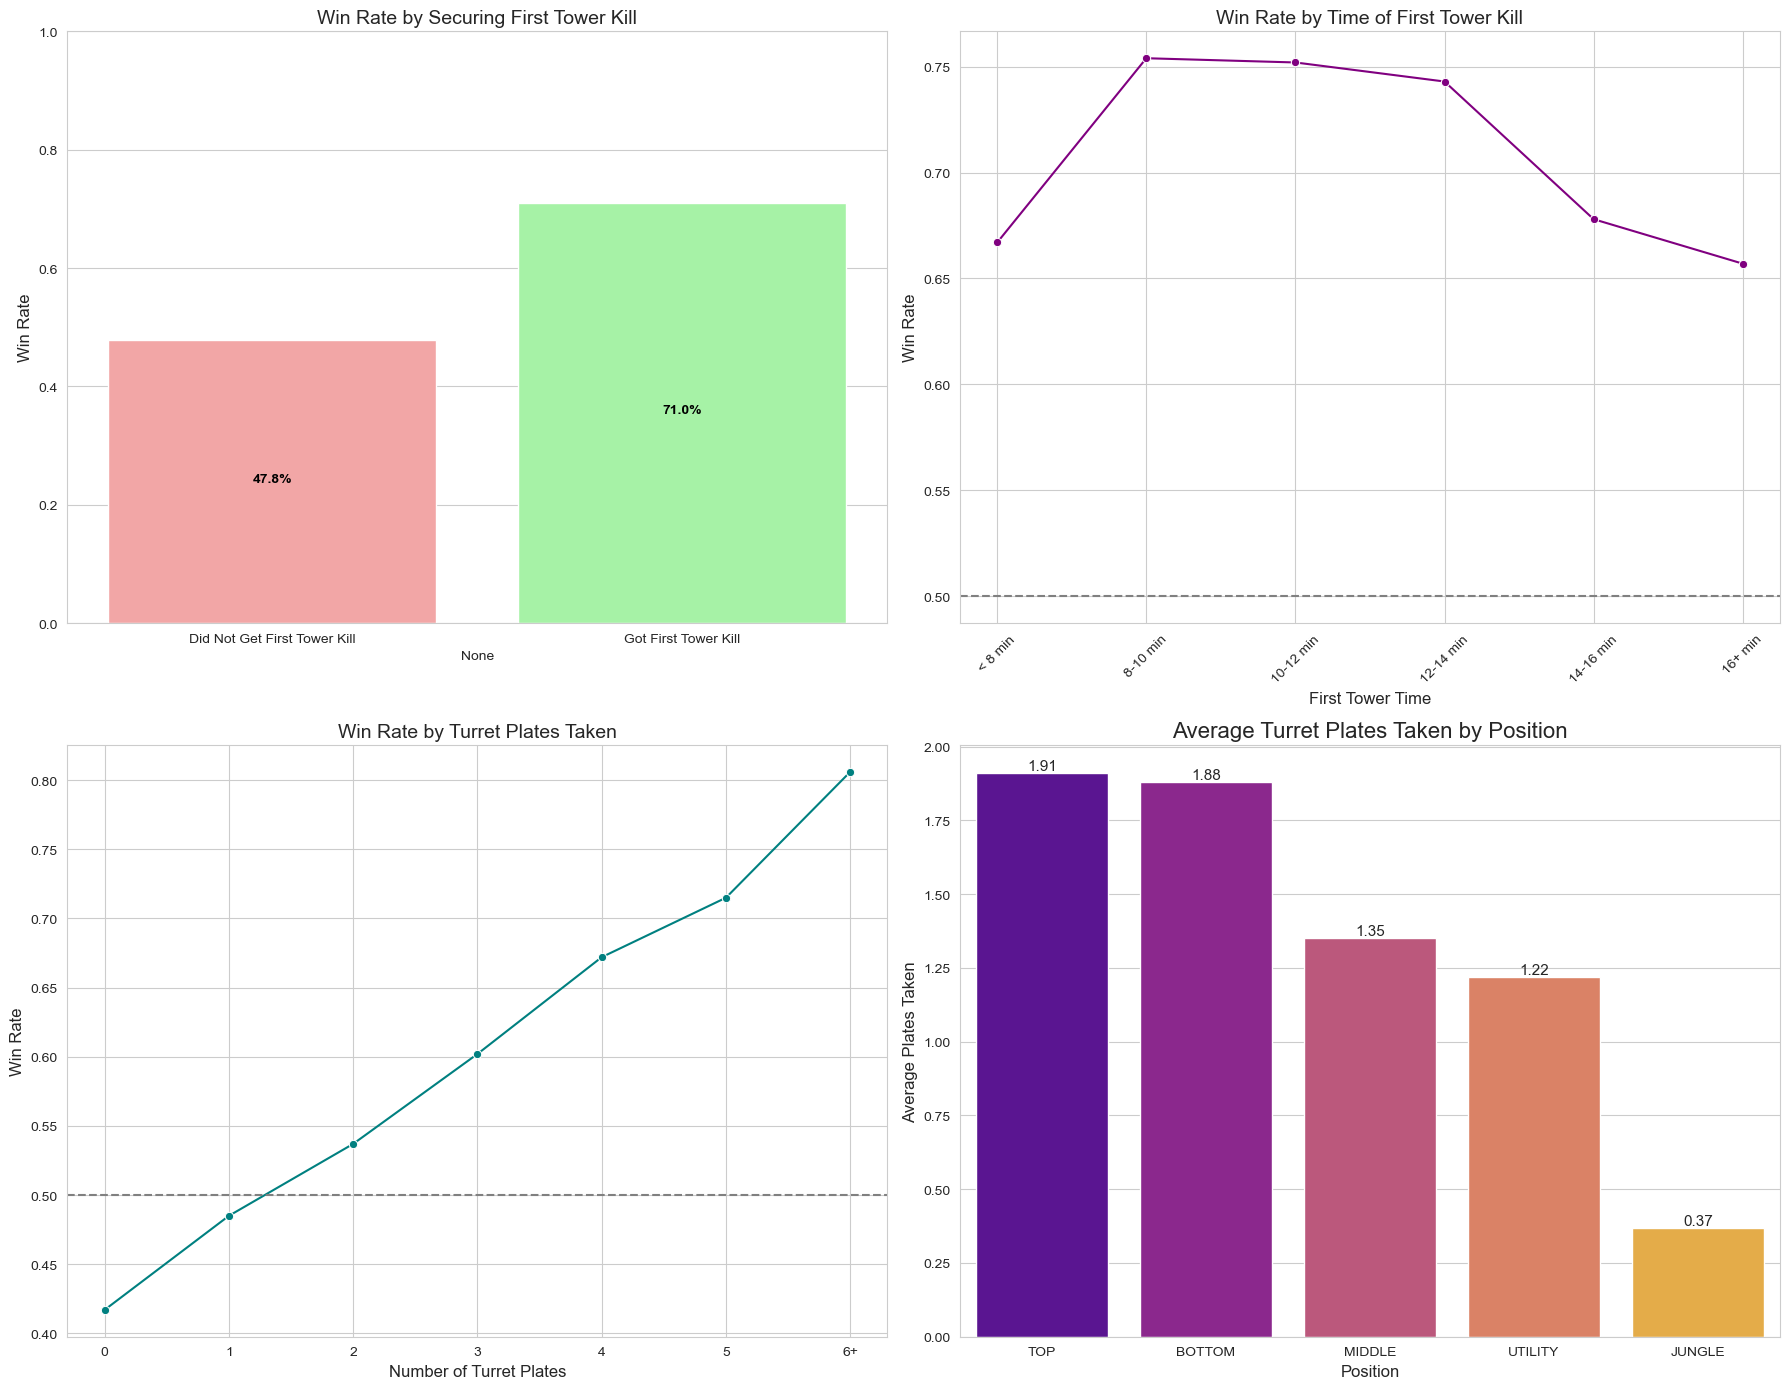

In [92]:
# --- 1. Data Preparation ---
tower_df = cleaned_df.copy()
tower_df.dropna(subset=['firstTowerKill'], inplace=True)
tower_df['firstTowerKill'] = tower_df['firstTowerKill'].astype(bool)
tower_df['firstTurretKilledTime'] = tower_df['firstTurretKilledTime'].fillna(0)

print("=== Tower, First Tower Time, and Turret Plate Analysis ===\n")


# --- 2. Calculations for Plotting ---

# Win Rate by First Tower Kill
win_rate_ft = tower_df.groupby('firstTowerKill')['win'].mean().round(3)
win_rate_ft.index = ['Did Not Get First Tower Kill', 'Got First Tower Kill']
print("--- Win Rate by Securing First Tower ---\n", win_rate_ft, "\n" + "="*50 + "\n")

# Win Rate by First Tower Time
first_tower_takers = tower_df[tower_df['firstTowerKill'] == True].copy()
bins_time = [0, 480, 600, 720, 840, 960, np.inf]
labels_time = ['< 8 min', '8-10 min', '10-12 min', '12-14 min', '14-16 min', '16+ min']
first_tower_takers['first_tower_time_bins'] = pd.cut(first_tower_takers['firstTurretKilledTime'], bins=bins_time, labels=labels_time, right=False)
win_rate_by_time = first_tower_takers.groupby('first_tower_time_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_time.columns = ['Win_Rate', 'Games']
print("--- Win Rate by First Tower Kill Time ---\n", win_rate_by_time, "\n" + "="*50 + "\n")

# Win Rate by Turret Plates Taken
bins_plates = [-1, 0, 1, 2, 3, 4, 5, np.inf]
labels_plates = ['0', '1', '2', '3', '4', '5', '6+']
tower_df['plate_bins'] = pd.cut(tower_df['turretPlatesTaken'], bins=bins_plates, labels=labels_plates, right=True)
win_rate_by_plates = tower_df.groupby('plate_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_plates.columns = ['Win_Rate', 'Games']
print("--- Win Rate by Turret Plates Taken ---\n", win_rate_by_plates[win_rate_by_plates['Games'] >= 50], "\n" + "="*50 + "\n")

# Average Turret Plates by Position
plates_by_position = cleaned_df.groupby('teamPosition')['turretPlatesTaken'].mean().round(2).sort_values(ascending=False)
print("--- Average Turret Plates Taken by Role ---\n", plates_by_position, "\n" + "="*50 + "\n")


# --- 3. Visualizations (2x2 Grid) ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Changed to 2x2 layout
sns.set_style("whitegrid")

# Plot 1: Win Rate by First Tower (Top-Left)
ax1 = axes[0, 0]
sns.barplot(x=win_rate_ft.index, y=win_rate_ft.values, ax=ax1, hue=win_rate_ft.index, palette=['#ff9999','#99ff99'], legend=False)
ax1.set_title('Win Rate by Securing First Tower Kill', fontsize=14)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.set_ylim(0, 1)
for i, v in enumerate(win_rate_ft.values):
    ax1.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 2: Win Rate by First Tower Time (Top-Right)
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_by_time.index, y=win_rate_by_time['Win_Rate'], ax=ax2, marker='o', color='purple')
ax2.set_title('Win Rate by Time of First Tower Kill', fontsize=14)
ax2.set_xlabel('First Tower Time', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Win Rate by Turret Plates Taken (Bottom-Left)
ax3 = axes[1, 0]
sns.lineplot(x=win_rate_by_plates.index, y=win_rate_by_plates['Win_Rate'], ax=ax3, marker='o', color='teal')
ax3.set_title('Win Rate by Turret Plates Taken', fontsize=14)
ax3.set_xlabel('Number of Turret Plates', fontsize=12)
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Average Turret Plates by Position (Bottom-Right)
ax4 = axes[1, 1]
sns.barplot(x=plates_by_position.index, y=plates_by_position.values, ax=ax4, hue=plates_by_position.index, palette='plasma', legend=False)
ax4.set_title('Average Turret Plates Taken by Position', fontsize=16)
ax4.set_xlabel('Position', fontsize=12)
ax4.set_ylabel('Average Plates Taken', fontsize=12)
for index, value in enumerate(plates_by_position.values):
    ax4.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=11)


plt.tight_layout()
plt.show()


**Key Takeaway**
- Teams that get first turret wins 71% of the time. The highest win rate by time of kill is 8-10 minutes, with a steep fall off at 12-14 minutes, which can be explained by turret plates dropping at the 14 minute mark. 
- Turret plates = gold, so it makes sense that it has a strong correlation to winning

### Neutral Objectives (Baron/Dragons)

=== Major Objective Correlation with Win Rate ===

--- Win Rate by Securing First Dragon & First Baron ---

First Dragon:
Did Not Get First Dragon    0.394
Got First Dragon            0.606
Name: win, dtype: float64

First Baron:
Did Not Get First Baron    0.381
Got First Baron            0.825
Name: win, dtype: float64


--- Win Rate by Number of Objectives Taken ---

Dragon Kills:
                  Win_Rate   Games
dragon_kill_bins                  
0                    0.465  123471
1                    0.546   16824
2                    0.661    8783
3                    0.788    4745
4+ (Soul)            0.909    1867

Baron Kills:
                 Win_Rate   Games
baron_kill_bins                  
0                   0.370  110395
1                   0.820   40230
2                   0.791    4675
3+                  0.731     390


--- Win Rate by Rift Herald and Atakhan Kills ---

Rift Herald Kills:
                 Win_Rate  Games
riftHeraldKills                 
0            

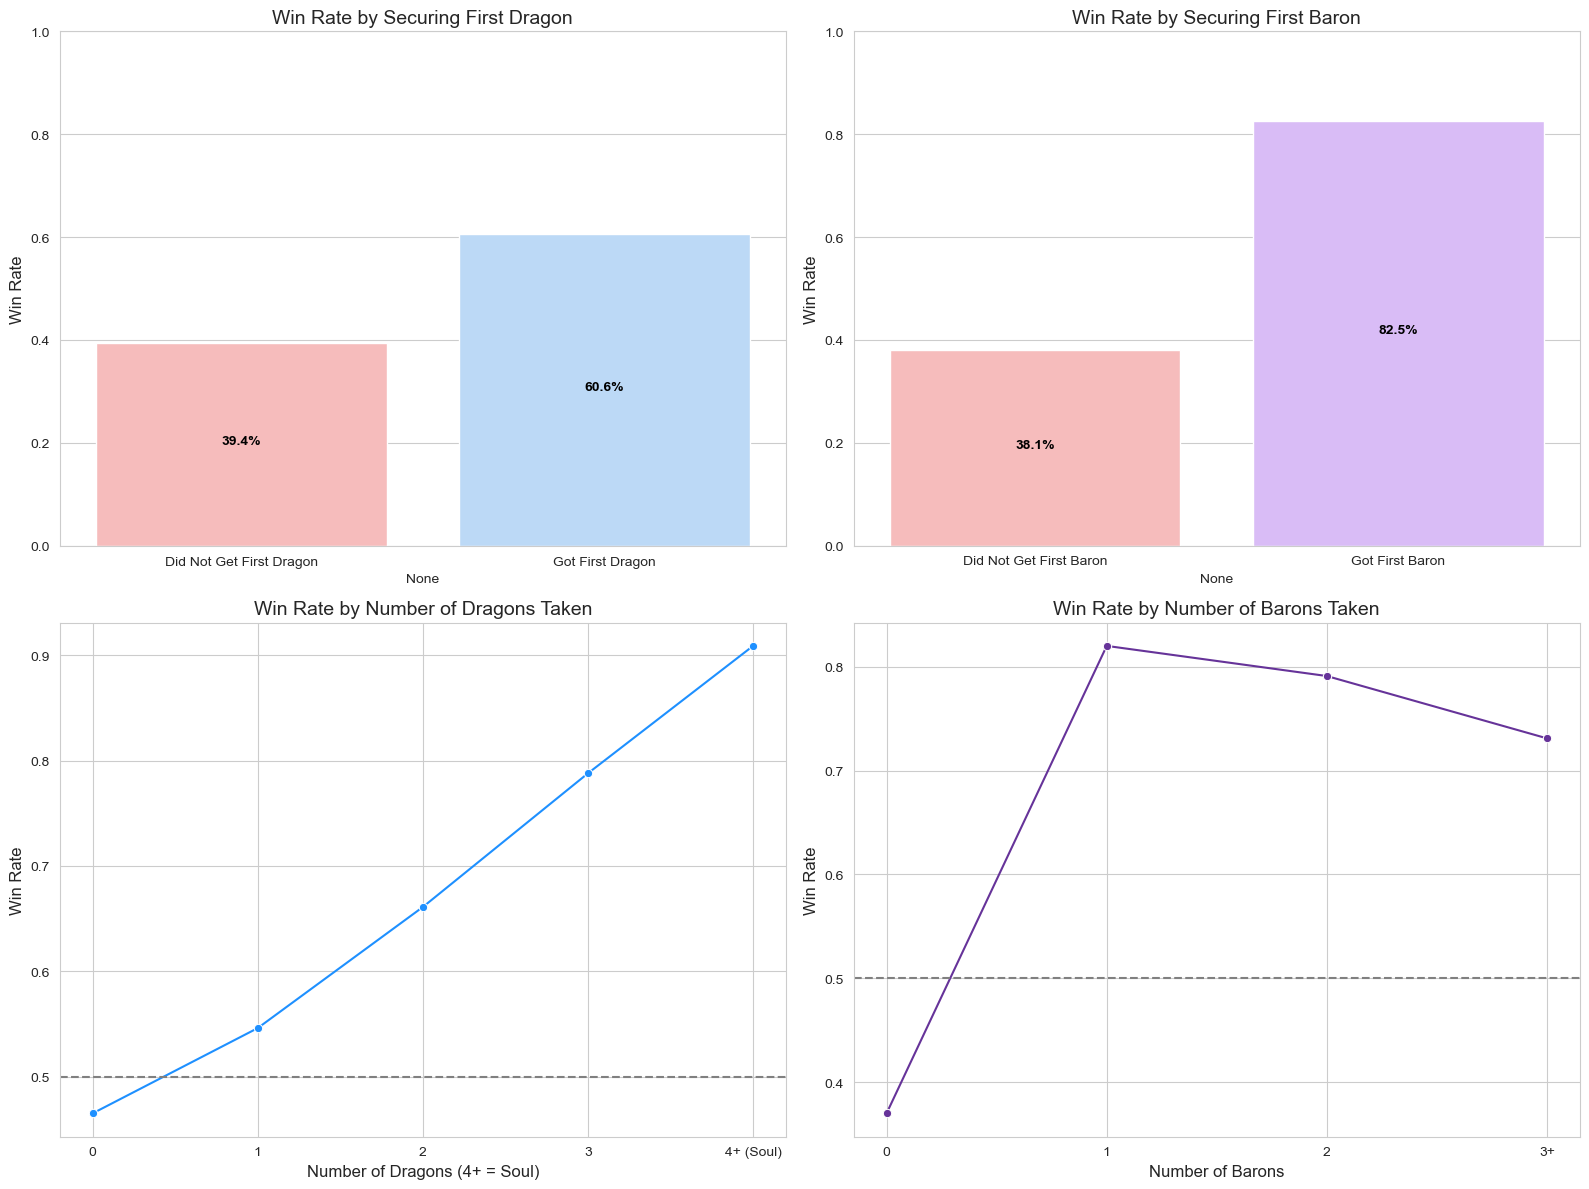

In [83]:
# --- 1. Data Preparation ---
objectives_df = cleaned_df.copy()
objectives_df.dropna(subset=['baronFirst', 'dragonFirst'], inplace=True)
objectives_df['baronFirst'] = objectives_df['baronFirst'].astype(bool)
objectives_df['dragonFirst'] = objectives_df['dragonFirst'].astype(bool)

print("=== Major Objective Correlation with Win Rate ===\n")


# --- 2. First Objective Impact ---
print("--- Win Rate by Securing First Dragon & First Baron ---")
win_rate_dragon_first = objectives_df.groupby('dragonFirst')['win'].mean().round(3)
win_rate_dragon_first.index = ['Did Not Get First Dragon', 'Got First Dragon']
print("\nFirst Dragon:")
print(win_rate_dragon_first)
win_rate_baron_first = objectives_df.groupby('baronFirst')['win'].mean().round(3)
win_rate_baron_first.index = ['Did Not Get First Baron', 'Got First Baron']
print("\nFirst Baron:")
print(win_rate_baron_first)
print("\n" + "="*50 + "\n")


# --- 3. Stacked Objective Impact ---
print("--- Win Rate by Number of Objectives Taken ---")

# --- FIX: Capped dragon bins at 4+ to represent securing Soul ---
bins_d = [-1, 0, 1, 2, 3, np.inf]
labels_d = ['0', '1', '2', '3', '4+ (Soul)']
objectives_df['dragon_kill_bins'] = pd.cut(objectives_df['dragonKills'], bins=bins_d, labels=labels_d, right=True)
win_rate_dragons = objectives_df.groupby('dragon_kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_dragons.columns = ['Win_Rate', 'Games']
print("\nDragon Kills:")
print(win_rate_dragons[win_rate_dragons['Games'] >= 50])

bins_b = [-1, 0, 1, 2, np.inf]
labels_b = ['0', '1', '2', '3+']
objectives_df['baron_kill_bins'] = pd.cut(objectives_df['baronKills'], bins=bins_b, labels=labels_b, right=True)
win_rate_barons = objectives_df.groupby('baron_kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_barons.columns = ['Win_Rate', 'Games']
print("\nBaron Kills:")
print(win_rate_barons[win_rate_barons['Games'] >= 50])
print("\n" + "="*50 + "\n")


# --- 4. Rift Herald & Atakhan Analysis ---
print("--- Win Rate by Rift Herald and Atakhan Kills ---")
win_rate_herald = objectives_df.groupby('riftHeraldKills')['win'].agg(['mean', 'count']).round(3)
win_rate_herald.columns = ['Win_Rate', 'Games']
print("\nRift Herald Kills:")
print(win_rate_herald)

atakhan_counts = objectives_df['atakhanKills'].value_counts()
if len(atakhan_counts) > 1 and atakhan_counts.iloc[1] > 0:
    win_rate_atakhan = objectives_df.groupby('atakhanKills')['win'].agg(['mean', 'count']).round(3)
    win_rate_atakhan.columns = ['Win_Rate', 'Games']
    print("\nAtakhan Kills:")
    print(win_rate_atakhan)
else:
    print("\nAtakhan Kills: No 'Atakhan' kills recorded in this dataset.")
print("\n" + "="*50 + "\n")

print("--- Win Rate by Game Duration for First Baron Takers ---")
print("(Note: Using game duration as a proxy for when Baron was taken)\n")

# Filter for teams that got the first Baron
first_baron_takers = objectives_df[objectives_df['baronFirst'] == True].copy()

# Create bins for game duration (in seconds). Baron spawns at 20 min (1200s).
bins_g = [1200, 1500, 1800, 2100, np.inf] # 20-25m, 25-30m, 30-35m, 35m+
labels_g = ['20-25 min', '25-30 min', '30-35 min', '35+ min']
first_baron_takers['game_duration_bins'] = pd.cut(first_baron_takers['gameDuration'], bins=bins_g, labels=labels_g, right=False)

win_rate_by_baron_time = first_baron_takers.groupby('game_duration_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_baron_time.columns = ['Win_Rate', 'Games']
print(win_rate_by_baron_time)
print("\n" + "="*50 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Win Rate by First Dragon
ax1 = axes[0, 0]
sns.barplot(x=win_rate_dragon_first.index, y=win_rate_dragon_first.values, ax=ax1, hue=win_rate_dragon_first.index, palette=['#ffb3b3', '#b3d9ff'], legend=False)
ax1.set_title('Win Rate by Securing First Dragon', fontsize=14)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.set_ylim(0, 1)
for i, v in enumerate(win_rate_dragon_first.values):
    ax1.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 2: Win Rate by First Baron
ax2 = axes[0, 1]
sns.barplot(x=win_rate_baron_first.index, y=win_rate_baron_first.values, ax=ax2, hue=win_rate_baron_first.index, palette=['#ffb3b3', '#d9b3ff'], legend=False)
ax2.set_title('Win Rate by Securing First Baron', fontsize=14)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.set_ylim(0, 1)
for i, v in enumerate(win_rate_baron_first.values):
    ax2.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 3: Win Rate by Dragon Kills
ax3 = axes[1, 0]
sns.lineplot(data=win_rate_dragons, x=win_rate_dragons.index, y='Win_Rate', ax=ax3, marker='o', color='dodgerblue')
ax3.set_title('Win Rate by Number of Dragons Taken', fontsize=14)
ax3.set_xlabel('Number of Dragons (4+ = Soul)', fontsize=12) # Updated Label
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Win Rate by Baron Kills
ax4 = axes[1, 1]
sns.lineplot(data=win_rate_barons, x=win_rate_barons.index, y='Win_Rate', ax=ax4, marker='o', color='rebeccapurple')
ax4.set_title('Win Rate by Number of Barons Taken', fontsize=14)
ax4.set_xlabel('Number of Barons', fontsize=12)
ax4.set_ylabel('Win Rate', fontsize=12)
ax4.axhline(y=0.5, color='grey', linestyle='--')

plt.tight_layout()
plt.show()


=== Dragon Kills Participation by Role ===

--- Average Dragon Kills on Team by Player Role ---
teamPosition
JUNGLE     1.52
BOTTOM     0.14
MIDDLE     0.06
TOP        0.06
UTILITY    0.03
Name: dragonKills, dtype: float64


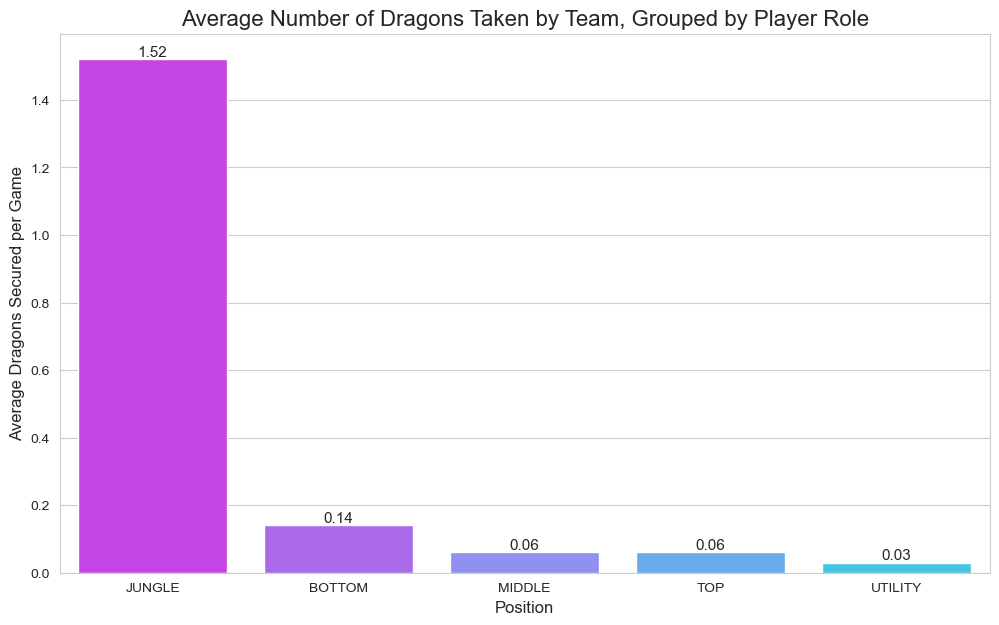


--- Interpretation Note ---
This chart shows the average number of dragons a player's TEAM takes, grouped by that player's role.
Since 'dragonKills' is a team stat, the values are very similar across roles.
A higher average for a role like Jungle or Support might indicate that when those roles perform well,
their teams are more successful at securing this objective.


In [93]:
# --- Dragon Kills by Position Analysis ---

print("=== Dragon Kills Participation by Role ===\n")

# Step 1: Group the DataFrame by role and calculate the mean for dragon kills.
# Note: 'dragonKills' is a team-level stat, so this shows which roles are on
# teams that successfully secure dragons, not who gets the last hit.
dragons_by_position = cleaned_df.groupby('teamPosition')['dragonKills'].mean().round(2).sort_values(ascending=False)

print("--- Average Dragon Kills on Team by Player Role ---")
print(dragons_by_position)

# --- Visualization ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(
    x=dragons_by_position.index,
    y=dragons_by_position.values,
    hue=dragons_by_position.index,
    palette='cool_r',
    legend=False
)

# Add plot details
ax.set_title('Average Number of Dragons Taken by Team, Grouped by Player Role', fontsize=16)
ax.set_xlabel('Position', fontsize=12)
ax.set_ylabel('Average Dragons Secured per Game', fontsize=12)

# Add text labels on top of each bar for clarity
for index, value in enumerate(dragons_by_position.values):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=11)

plt.show()

print("\n--- Interpretation Note ---")
print("This chart shows the average number of dragons a player's TEAM takes, grouped by that player's role.")
print("Since 'dragonKills' is a team stat, the values are very similar across roles.")
print("A higher average for a role like Jungle or Support might indicate that when those roles perform well,")
print("their teams are more successful at securing this objective.")


=== Win Rate by Number of Dragons Taken (Jungle Role) ===

--- Win Rate by Dragon Kills (Junglers Only) ---
                  Win_Rate  Games
dragon_kill_bins                 
0                    0.150   7264
1                    0.412   9096
2                    0.650   8200
3                    0.787   4712
4+ (Soul)            0.909   1866


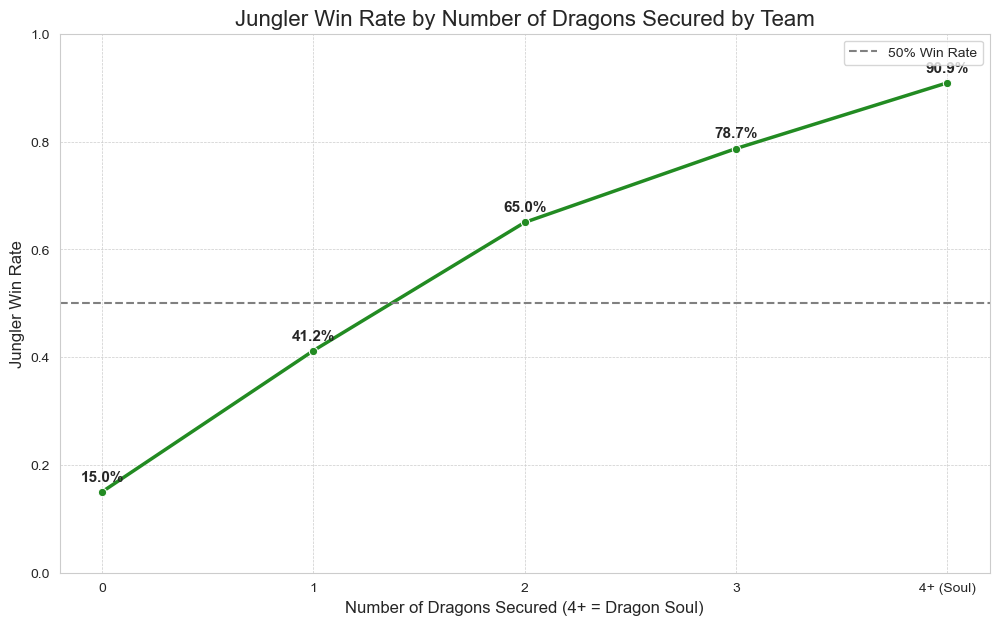

In [95]:
# Filter the DataFrame to only include players in the JUNGLE position.
jungle_df = cleaned_df[cleaned_df['teamPosition'] == 'JUNGLE'].copy()

# Create bins for the number of dragons taken.
bins_d = [-1, 0, 1, 2, 3, np.inf]
labels_d = ['0', '1', '2', '3', '4+ (Soul)']
jungle_df['dragon_kill_bins'] = pd.cut(jungle_df['dragonKills'], bins=bins_d, labels=labels_d, right=True)

# --- 2. Calculate Win Rate by Dragon Kills for Junglers ---
print("=== Win Rate by Number of Dragons Taken (Jungle Role) ===\n")

# Group by the dragon kill bins and calculate the win rate and number of games.
win_rate_by_dragons_jng = jungle_df.groupby('dragon_kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_dragons_jng.columns = ['Win_Rate', 'Games']

# Filter for bins with enough games to be statistically significant.
win_rate_by_dragons_jng = win_rate_by_dragons_jng[win_rate_by_dragons_jng['Games'] >= 50]

print("--- Win Rate by Dragon Kills (Junglers Only) ---")
print(win_rate_by_dragons_jng)

# --- 3. Visualization ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create the line plot
ax = sns.lineplot(
    x=win_rate_by_dragons_jng.index,
    y=win_rate_by_dragons_jng['Win_Rate'],
    marker='o',
    color='forestgreen', # Changed color to represent the jungle role
    linewidth=2.5
)

# Add plot details
ax.set_title('Jungler Win Rate by Number of Dragons Secured by Team', fontsize=16)
ax.set_xlabel('Number of Dragons Secured (4+ = Dragon Soul)', fontsize=12)
ax.set_ylabel('Jungler Win Rate', fontsize=12)
ax.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
ax.set_ylim(0, 1.0)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add win rate labels to each point on the graph
for index, row in win_rate_by_dragons_jng.iterrows():
    ax.text(index, row['Win_Rate'] + 0.02, f'{row["Win_Rate"]:.1%}', ha='center', fontsize=11, weight='bold')

plt.show()


=== Calculating 'dragonLead' Column ===

Successfully added the 'dragonLead' column.
It represents the number of dragons a player's team has taken minus the enemy team's count.

--- Win Rate by Dragon Lead for Each Role ---


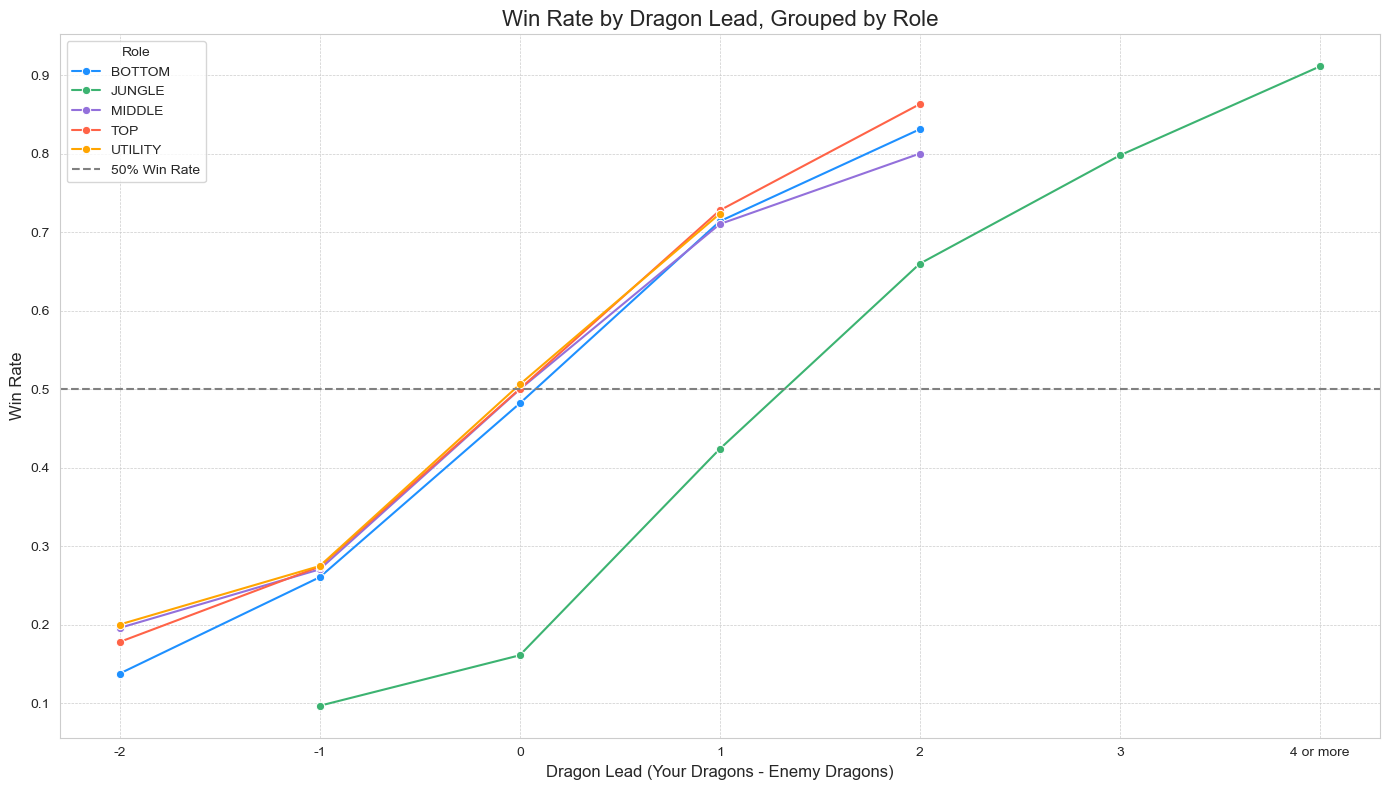

In [90]:
# --- 1. Calculate Dragon Lead ---
print("=== Calculating 'dragonLead' Column ===\n")

# Step 1: We need to know the dragon count for both teams in a match.
# First, create a unique identifier for each team in each match.
cleaned_df['matchTeamId'] = cleaned_df['matchId'] + '_' + cleaned_df['teamId'].astype(str)

# Step 2: Create a mapping of each team's dragon kills.
# The key will be the unique match-team ID, and the value will be the dragon count.
# We use 'first' because 'dragonKills' is a team stat and is the same for all 5 players.
dragon_map = cleaned_df.groupby('matchTeamId')['dragonKills'].first()

# Step 3: Identify the opposing team for each player.
# We do this by grouping by matchId and finding the two unique teamIds.
team_ids_per_match = cleaned_df.groupby('matchId')['teamId'].unique()

# Create a map to find the opponent's teamId.
opponent_map = {}
for match, teams in team_ids_per_match.items():
    if len(teams) == 2:
        opponent_map[f"{match}_{teams[0]}"] = f"{match}_{teams[1]}"
        opponent_map[f"{match}_{teams[1]}"] = f"{match}_{teams[0]}"

# Step 4: Map the opponent's unique ID to each player's row.
cleaned_df['opponentMatchTeamId'] = cleaned_df['matchTeamId'].map(opponent_map)

# Step 5: Map the opponent's dragon count to each player's row.
cleaned_df['opponentDragonKills'] = cleaned_df['opponentMatchTeamId'].map(dragon_map).fillna(0).astype(int)

# Step 6: Calculate the Dragon Lead.
cleaned_df['dragonLead'] = cleaned_df['dragonKills'] - cleaned_df['opponentDragonKills']

# Clean up temporary columns
cleaned_df = cleaned_df.drop(columns=['matchTeamId', 'opponentMatchTeamId', 'opponentDragonKills'])

print("Successfully added the 'dragonLead' column.")
print("It represents the number of dragons a player's team has taken minus the enemy team's count.\n")


# --- 2. Analyze Dragon Lead by Role ---
print("--- Win Rate by Dragon Lead for Each Role ---")

# Create bins for the dragon lead.
bins_dl = [-np.inf, -3, -2, -1, 0, 1, 2, 3, np.inf]
labels_dl = ['-3 or less', '-2', '-1', '0', '1', '2', '3', '4 or more']
cleaned_df['dragon_lead_bins'] = pd.cut(cleaned_df['dragonLead'], bins=bins_dl, labels=labels_dl, right=True)

# Group by role and lead bins to calculate win rate.
win_rate_by_lead_role = cleaned_df.groupby(['teamPosition', 'dragon_lead_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()


# --- 3. Visualization ---
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

ax = sns.lineplot(
    data=win_rate_by_lead_role[win_rate_by_lead_role['count'] >= 50], # Filter for significance
    x='dragon_lead_bins',
    y='mean',
    hue='teamPosition',
    palette=colors,
    marker='o'
)

# Add plot details
ax.set_title('Win Rate by Dragon Lead, Grouped by Role', fontsize=16)
ax.set_xlabel('Dragon Lead (Your Dragons - Enemy Dragons)', fontsize=12)
ax.set_ylabel('Win Rate', fontsize=12)
ax.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
ax.legend(title='Role')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


=== Win Rate by Stealing an Objective ===

--- Win Rate by Objective Steal Status ---
                              Win_Rate  Players
Did Not Steal Objective          0.499   152710
Stole at Least One Objective     0.556     2980


--- Win Rate by Number of Objectives Stolen ---
                  Win_Rate   Games
objectivesStolen                  
0                    0.499  152710
1                    0.557    2853
2                    0.548     124
3                    0.333       3




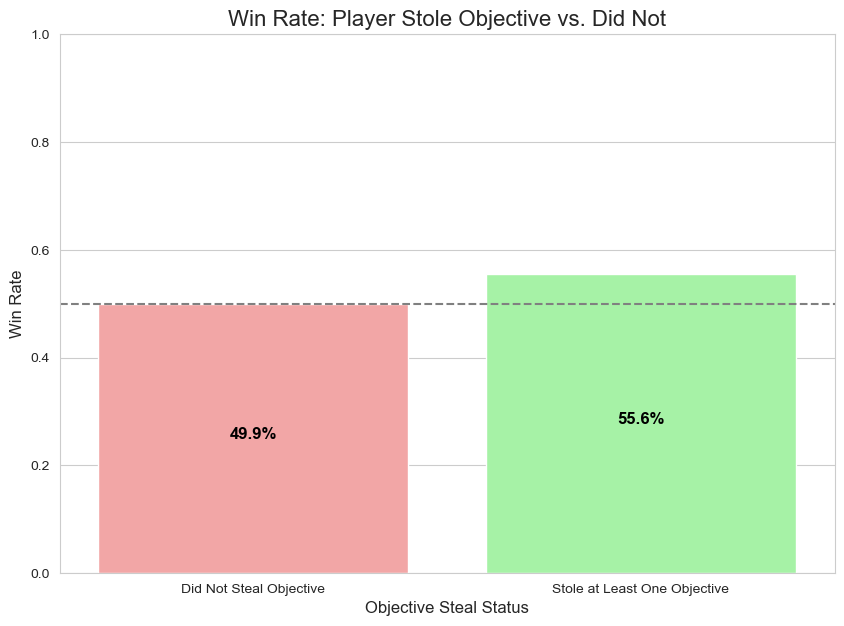


--- Interpretation ---
This analysis shows a significant increase in win rate for players who manage to steal a major objective.
A successful steal is a high-impact event that often turns the tide of a game by denying the enemy a crucial buff (like Baron or Dragon Soul) and claiming it for your own team.


In [91]:
# --- 1. Data Preparation ---
# The 'objectivesStolen' column is a count of major objectives a player stole.
# We can treat it as a categorical variable: 0 steals vs. 1 or more steals.
stole_df = cleaned_df.copy()
stole_df['did_steal_objective'] = stole_df['objectivesStolen'] > 0

# --- 2. Calculate Win Rate by Objective Steals ---
print("=== Win Rate by Stealing an Objective ===\n")

# Calculate the win rate for players who stole an objective vs. those who didn't.
win_rate_by_steal = stole_df.groupby('did_steal_objective')['win'].agg(['mean', 'count']).round(3)
win_rate_by_steal.columns = ['Win_Rate', 'Players']
win_rate_by_steal.index = ['Did Not Steal Objective', 'Stole at Least One Objective']

print("--- Win Rate by Objective Steal Status ---")
print(win_rate_by_steal)
print("\n" + "="*50 + "\n")

# Let's also see the win rate by the number of objectives stolen.
win_rate_by_steal_count = stole_df.groupby('objectivesStolen')['win'].agg(['mean', 'count']).round(3)
win_rate_by_steal_count.columns = ['Win_Rate', 'Games']
print("--- Win Rate by Number of Objectives Stolen ---")
# We show all, as stealing more than 1 is very rare and interesting to see.
print(win_rate_by_steal_count)
print("\n" + "="*50 + "\n")


# --- 3. Visualization ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(
    x=win_rate_by_steal.index,
    y=win_rate_by_steal['Win_Rate'],
    hue=win_rate_by_steal.index,
    palette=['#ff9999', '#99ff99'],
    legend=False
)

# Add plot details
ax.set_title('Win Rate: Player Stole Objective vs. Did Not', fontsize=16)
ax.set_xlabel('Objective Steal Status', fontsize=12)
ax.set_ylabel('Win Rate', fontsize=12)
ax.set_ylim(0, 1)
ax.axhline(y=0.5, color='grey', linestyle='--')

# Add percentage labels on the bars
for index, value in enumerate(win_rate_by_steal['Win_Rate']):
    ax.text(index, value / 2, f'{value:.1%}', color='black', ha='center', weight='bold', fontsize=12)

plt.show()

print("\n--- Interpretation ---")
print("This analysis shows a significant increase in win rate for players who manage to steal a major objective.")
print("A successful steal is a high-impact event that often turns the tide of a game by denying the enemy a crucial buff (like Baron or Dragon Soul) and claiming it for your own team.")


## Vision

### Vision Score 

=== Vision Control Analysis and Win Rate ===

--- Average Vision Metrics in Wins vs. Losses ---
      visionScore  wardsPlaced  stealthWardsPlaced  controlWardsPlaced  wardsKilled  visionScorePerMinute
Loss        26.12        11.45                9.07                1.34         3.06                  0.95
Win         27.87        11.91                9.02                1.58         3.34                  1.01


--- Average Vision Score by Position ---
teamPosition
UTILITY    64.53
JUNGLE     22.40
MIDDLE     16.71
TOP        15.93
BOTTOM     15.40
Name: visionScore, dtype: float64


--- Win Rate by Vision Score Ranges ---
                   Win_Rate  Games
vision_score_bins                 
0-10                  0.444  26497
11-20                 0.495  61377
21-30                 0.533  29487
31-40                 0.534  10580
41-50                 0.498   5410
51-60                 0.488   4851
60+                   0.531  17428


--- Win Rate by Number of Wards Placed ---
         

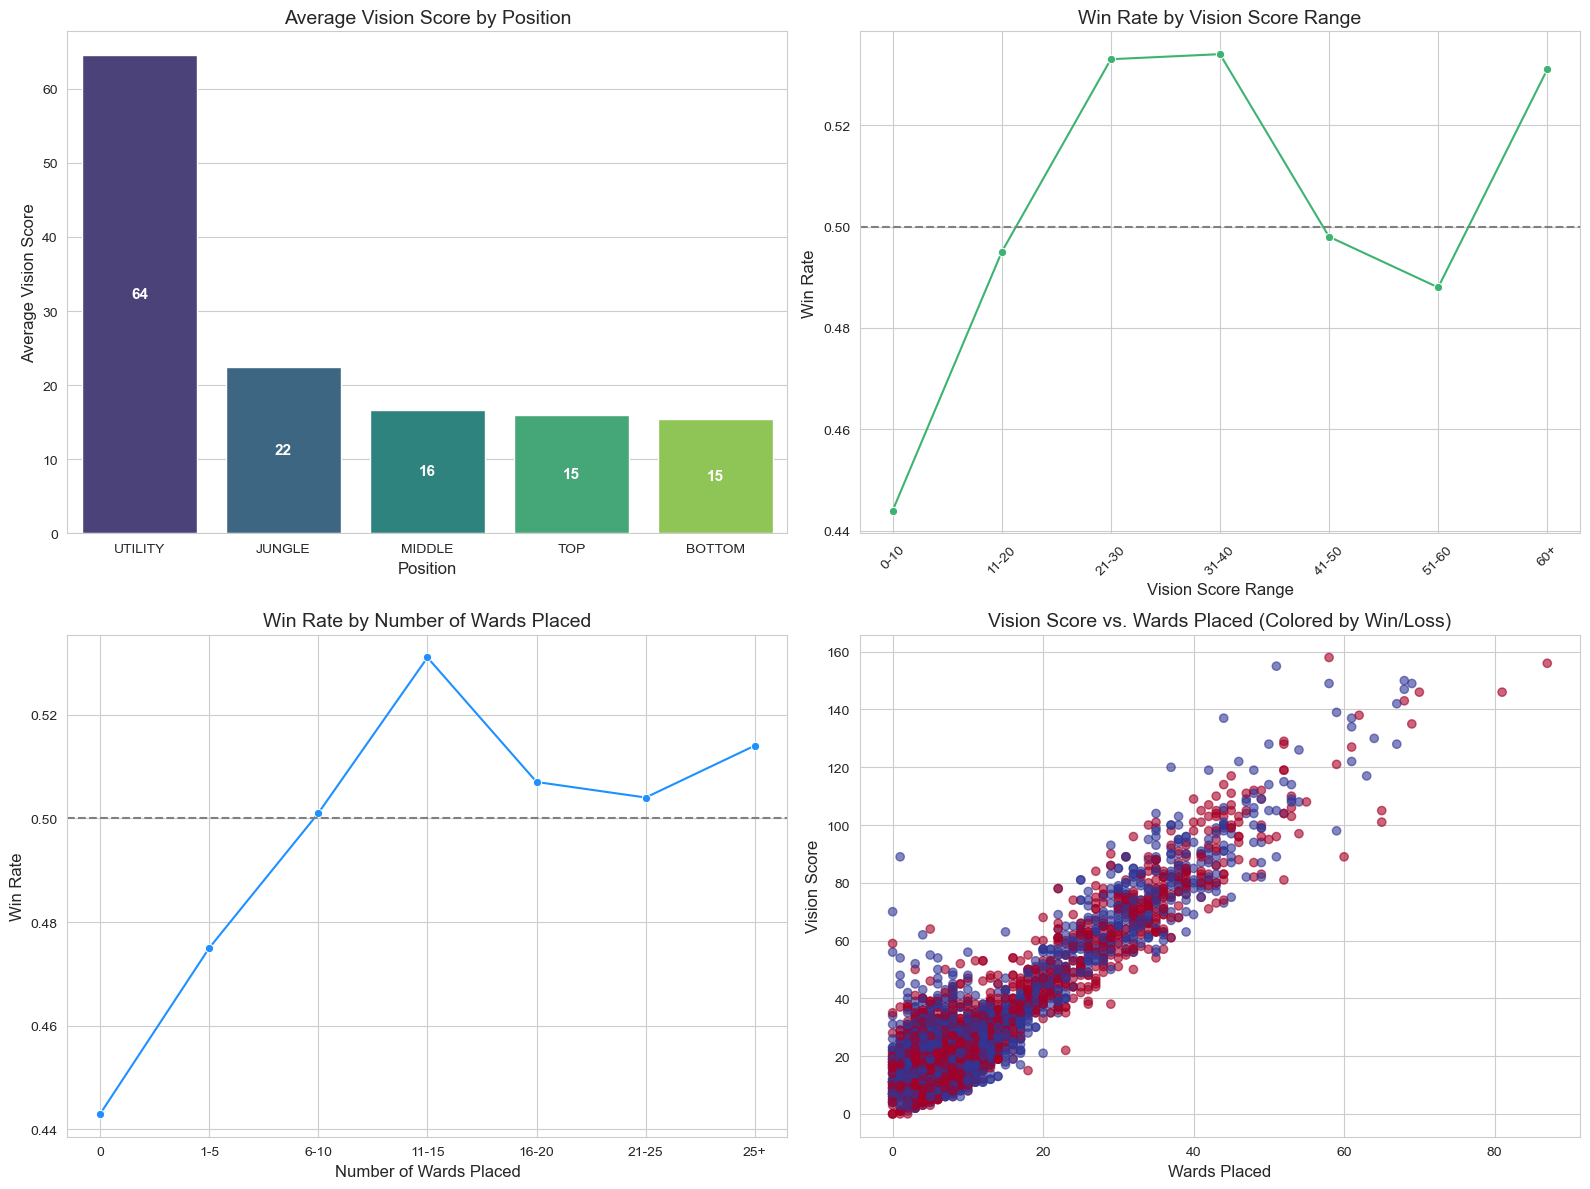

In [123]:
vision_df = cleaned_df.copy()

print("=== Vision Control Analysis and Win Rate ===\n")

# --- 2. Overall Vision Metrics for Wins vs. Losses ---
print("--- Average Vision Metrics in Wins vs. Losses ---")

# Define the key vision metrics to analyze
vision_metrics = ['visionScore', 'wardsPlaced', 'stealthWardsPlaced', 'controlWardsPlaced', 'wardsKilled', 'visionScorePerMinute']
vision_win_loss = vision_df.groupby('win')[vision_metrics].mean().round(2)
vision_win_loss.index = ['Loss', 'Win']

print(vision_win_loss)
print("\n" + "="*50 + "\n")

# --- 3. Vision Score by Position ---
print("--- Average Vision Score by Position ---")

vision_by_position = vision_df.groupby('teamPosition')['visionScore'].mean().round(2).sort_values(ascending=False)
print(vision_by_position)
print("\n" + "="*50 + "\n")

# --- 4. Win Rate by Vision Score Bins ---
print("--- Win Rate by Vision Score Ranges ---")

# Create bins for vision score to see how win probability changes.
bins_vs = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels_vs = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
vision_df['vision_score_bins'] = pd.cut(vision_df['visionScore'], bins=bins_vs, labels=labels_vs, right=True)

win_rate_by_vision = vision_df.groupby('vision_score_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_vision.columns = ['Win_Rate', 'Games']
win_rate_by_vision = win_rate_by_vision[win_rate_by_vision['Games'] >= 50]

print(win_rate_by_vision)
print("\n" + "="*50 + "\n")

# --- 5. Win Rate by Wards Placed ---
print("--- Win Rate by Number of Wards Placed ---")

bins_wards = [-1, 0, 5, 10, 15, 20, 25, np.inf]
labels_wards = ['0', '1-5', '6-10', '11-15', '16-20', '21-25', '25+']
vision_df['wards_placed_bins'] = pd.cut(vision_df['wardsPlaced'], bins=bins_wards, labels=labels_wards, right=True)

win_rate_by_wards = vision_df.groupby('wards_placed_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_wards.columns = ['Win_Rate', 'Games']
win_rate_by_wards = win_rate_by_wards[win_rate_by_wards['Games'] >= 50]

print(win_rate_by_wards)
print("\n" + "="*50 + "\n")

# --- 6. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Vision Score by Position
ax1 = axes[0, 0]
sns.barplot(x=vision_by_position.index, y=vision_by_position.values, ax=ax1, hue=vision_by_position.index, palette='viridis', legend=False)
ax1.set_title('Average Vision Score by Position', fontsize=14)
ax1.set_xlabel('Position', fontsize=12)
ax1.set_ylabel('Average Vision Score', fontsize=12)
for index, value in enumerate(vision_by_position.values):
    ax1.text(index, value / 2, f'{int(value)}', ha='center', va='center', color='white', fontsize=11, weight='bold')

# Plot 2: Win Rate by Vision Score
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_by_vision.index, y=win_rate_by_vision['Win_Rate'], ax=ax2, marker='o', color='mediumseagreen')
ax2.set_title('Win Rate by Vision Score Range', fontsize=14)
ax2.set_xlabel('Vision Score Range', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Win Rate by Wards Placed
ax3 = axes[1, 0]
sns.lineplot(x=win_rate_by_wards.index, y=win_rate_by_wards['Win_Rate'], ax=ax3, marker='o', color='dodgerblue')
ax3.set_title('Win Rate by Number of Wards Placed', fontsize=14)
ax3.set_xlabel('Number of Wards Placed', fontsize=12)
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Vision Score vs. Wards Placed Scatter
ax4 = axes[1, 1]
# Sample a subset of data to avoid overcrowding
sample_size = min(5000, len(vision_df))
sample_data = vision_df.sample(n=sample_size, random_state=42)
ax4.scatter(sample_data['wardsPlaced'], sample_data['visionScore'], alpha=0.6, c=sample_data['win'], cmap='RdYlBu')
ax4.set_title('Vision Score vs. Wards Placed (Colored by Win/Loss)', fontsize=14)
ax4.set_xlabel('Wards Placed', fontsize=12)
ax4.set_ylabel('Vision Score', fontsize=12)

plt.tight_layout()
plt.show()


In [110]:
# --- Vision Score Correlation with Win Rate by Role ---

print("=== Vision Score Correlation with Win Rate by Role ===\n")

# Get unique roles
roles = sorted(cleaned_df['teamPosition'].unique())

# Calculate correlation for each role
vision_correlations = {}

for role in roles:
    # Filter data for the current role
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    
    # Calculate correlation between vision score and win rate
    # Convert win to numeric (True=1, False=0) for correlation calculation
    correlation = role_data['visionScore'].corr(role_data['win'].astype(int))
    
    # Store the result
    vision_correlations[role] = correlation
    
    # Print the result
    print(f"{role}: {correlation:.4f}")

print()

# Sort roles by correlation strength (absolute value)
sorted_correlations = sorted(vision_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("--- Roles Ranked by Vision Score Correlation Strength ---")
for role, corr in sorted_correlations:
    print(f"{role}: {corr:.4f}")


=== Vision Score Correlation with Win Rate by Role ===

BOTTOM: 0.0682
JUNGLE: 0.0919
MIDDLE: 0.0773
TOP: 0.0555
UTILITY: 0.0682

--- Roles Ranked by Vision Score Correlation Strength ---
JUNGLE: 0.0919
MIDDLE: 0.0773
UTILITY: 0.0682
BOTTOM: 0.0682
TOP: 0.0555


### Ward Types (Stealth Wards vs Control Wards)

=== Win Rate Correlation: Stealth Wards vs. Control Wards ===

--- Overall Statistics for Ward Types ---
       stealthWardsPlaced  controlWardsPlaced
count       155690.000000       155690.000000
mean             9.047479            1.460640
std              9.740335            2.240075
min              0.000000            0.000000
25%              4.000000            0.000000
50%              5.000000            1.000000
75%             10.000000            2.000000
max             85.000000           30.000000


--- Win Rate by Number of Stealth Wards Placed ---
                   Win_Rate  Games
stealth_ward_bins                 
0                     0.487   4514
1-3                   0.506  33314
4-6                   0.504  57258
7-9                   0.475  21444
10-12                 0.496   9382
13-15                 0.515   3649
16-18                 0.512   2886
19-21                 0.526   3271
22+                   0.501  19972


--- Win Rate by Number of Control Wards P

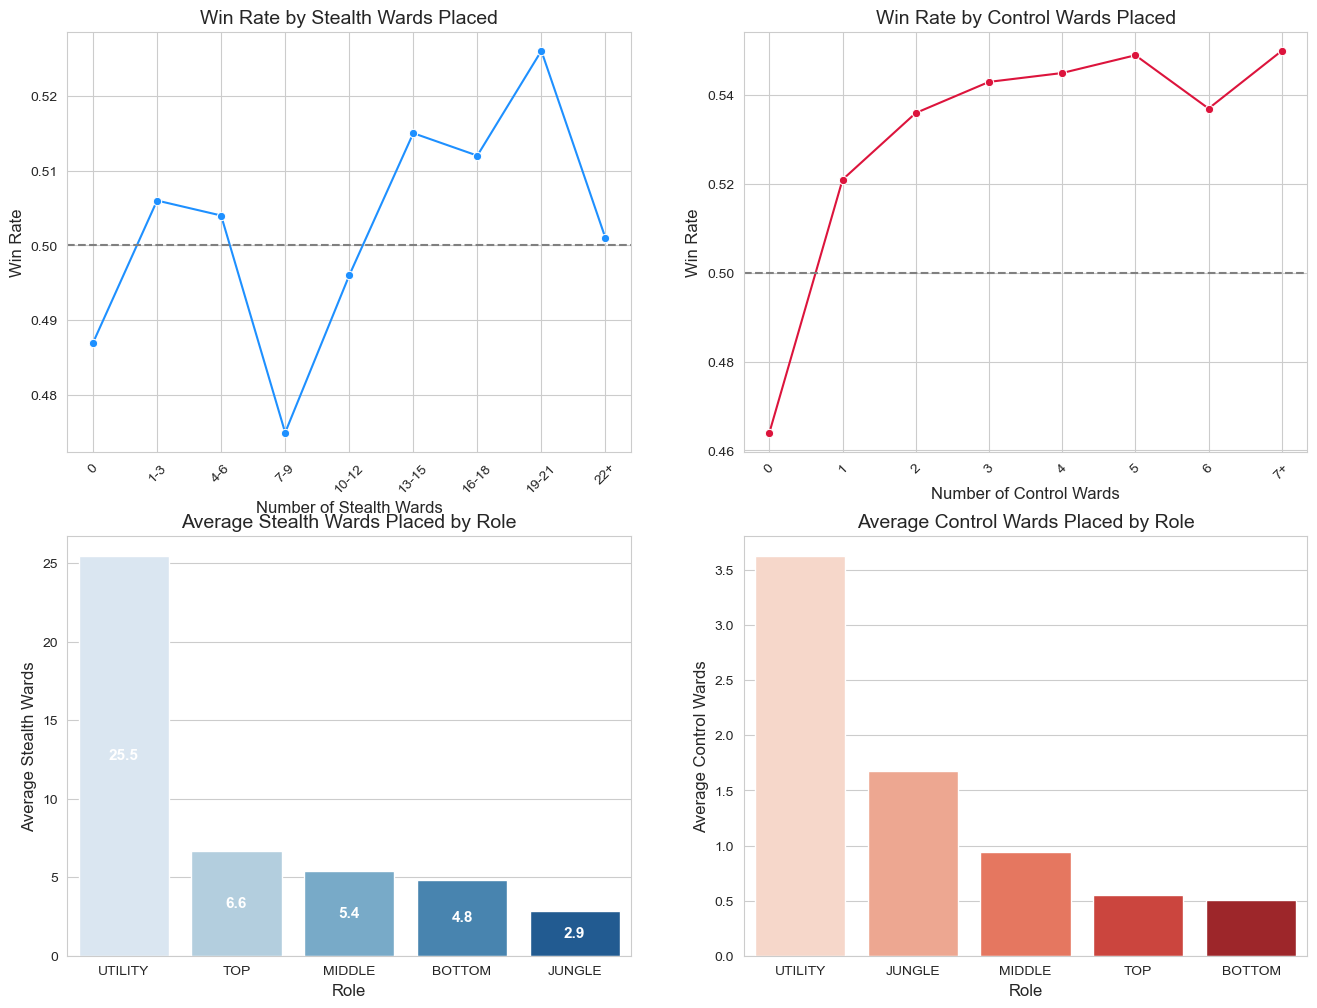

In [124]:
# --- Stealth Wards vs. Control Wards Analysis ---

print("=== Win Rate Correlation: Stealth Wards vs. Control Wards ===\n")

# --- 1. Overall Statistics for Both Ward Types ---
print("--- Overall Statistics for Ward Types ---")

ward_stats = cleaned_df[['stealthWardsPlaced', 'controlWardsPlaced']].describe()
print(ward_stats)
print("\n" + "="*50 + "\n")

# --- 2. Win Rate by Stealth Wards Placed ---
print("--- Win Rate by Number of Stealth Wards Placed ---")

# Create bins for stealth wards
bins_stealth = [-1, 0, 3, 6, 9, 12, 15, 18, 21, np.inf]
labels_stealth = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22+']
cleaned_df['stealth_ward_bins'] = pd.cut(cleaned_df['stealthWardsPlaced'], bins=bins_stealth, labels=labels_stealth, right=True)

win_rate_stealth = cleaned_df.groupby('stealth_ward_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_stealth.columns = ['Win_Rate', 'Games']
win_rate_stealth = win_rate_stealth[win_rate_stealth['Games'] >= 50]

print(win_rate_stealth)
print("\n" + "="*50 + "\n")

# --- 3. Win Rate by Control Wards Placed ---
print("--- Win Rate by Number of Control Wards Placed ---")

# Create bins for control wards
bins_control = [-1, 0, 1, 2, 3, 4, 5, 6, np.inf]
labels_control = ['0', '1', '2', '3', '4', '5', '6', '7+']
cleaned_df['control_ward_bins'] = pd.cut(cleaned_df['controlWardsPlaced'], bins=bins_control, labels=labels_control, right=True)

win_rate_control = cleaned_df.groupby('control_ward_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_control.columns = ['Win_Rate', 'Games']
win_rate_control = win_rate_control[win_rate_control['Games'] >= 50]

print(win_rate_control)
print("\n" + "="*50 + "\n")

# --- 4. Correlation Analysis by Role ---
print("--- Win Rate Correlation by Role ---")

roles = sorted(cleaned_df['teamPosition'].unique())

print("Stealth Wards Correlation with Win Rate:")
for role in roles:
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    corr_stealth = role_data['stealthWardsPlaced'].corr(role_data['win'].astype(int))
    print(f"{role}: {corr_stealth:.4f}")

print("\nControl Wards Correlation with Win Rate:")
for role in roles:
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    corr_control = role_data['controlWardsPlaced'].corr(role_data['win'].astype(int))
    print(f"{role}: {corr_control:.4f}")

print("\n" + "="*50 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Win Rate by Stealth Wards
ax1 = axes[0, 0]
sns.lineplot(x=win_rate_stealth.index, y=win_rate_stealth['Win_Rate'], ax=ax1, marker='o', color='dodgerblue')
ax1.set_title('Win Rate by Stealth Wards Placed', fontsize=14)
ax1.set_xlabel('Number of Stealth Wards', fontsize=12)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.axhline(y=0.5, color='grey', linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Win Rate by Control Wards
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_control.index, y=win_rate_control['Win_Rate'], ax=ax2, marker='o', color='crimson')
ax2.set_title('Win Rate by Control Wards Placed', fontsize=14)
ax2.set_xlabel('Number of Control Wards', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Stealth Wards by Role
ax3 = axes[1, 0]
stealth_by_role = cleaned_df.groupby('teamPosition')['stealthWardsPlaced'].mean().round(2).sort_values(ascending=False)
sns.barplot(x=stealth_by_role.index, y=stealth_by_role.values, ax=ax3, hue=stealth_by_role.index, palette='Blues', legend=False)
ax3.set_title('Average Stealth Wards Placed by Role', fontsize=14)
ax3.set_xlabel('Role', fontsize=12)
ax3.set_ylabel('Average Stealth Wards', fontsize=12)
for index, value in enumerate(stealth_by_role.values):
    ax3.text(index, value/2, f'{value:.1f}', ha='center', va='center', color='white', fontsize=11, weight='bold')

# Plot 4: Control Wards by Role
ax4 = axes[1, 1]
control_by_role = cleaned_df.groupby('teamPosition')['controlWardsPlaced'].mean().round(2).sort_values(ascending=False)
sns.barplot(x=control_by_role.index, y=control_by_role.values, ax=ax4, hue=control_by_role.index, palette='Reds', legend=False)
ax4.set_title('Average Control Wards Placed by Role', fontsize=14)
ax4.set_xlabel('Role', fontsize=12)
ax4.set_ylabel('Average Control Wards', fontsize=12)
for index, value in enumerate(control_by_role.values):
    ax4.text

### Wards Killed, Vision Score/M, Ward Takedowns Before 20M, and Vision Score Advantage

In [106]:
# --- Specific Vision Metrics Correlation with Win Rate by Role ---
print("=== Vision Metrics Correlation with Win Rate by Role ===\n")
# Define the specific vision metrics to analyze
vision_metrics = [
    'wardsKilled',
    'visionScorePerMinute', 
    'wardTakedownsBefore20M',
    'visionScoreAdvantageLaneOpponent'
]

# Get unique roles
roles = sorted(cleaned_df['teamPosition'].unique())

# Create a DataFrame to store all correlations
correlation_results = {}

for role in roles:
    # Filter data for the current role
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    
    # Calculate correlation for each vision metric
    role_correlations = {}
    for metric in vision_metrics:
        # Check if the metric exists and has non-null values
        if metric in role_data.columns and role_data[metric].notna().sum() > 0:
            correlation = role_data[metric].corr(role_data['win'].astype(int))
            role_correlations[metric] = correlation
        else:
            role_correlations[metric] = np.nan
    
    correlation_results[role] = role_correlations

# Display results in a formatted table
print("--- Correlation Coefficients by Role and Metric ---")
print("(Positive = Higher metric = Higher win rate)")
print("(Negative = Higher metric = Lower win rate)")
print()

# Print header
print(f"{'Role':<12}", end="")
for metric in vision_metrics:
    print(f"{metric:<25}", end="")
print()

# Print separator
print("-" * 120)

# Print data for each role
for role in roles:
    print(f"{role:<12}", end="")
    for metric in vision_metrics:
        corr = correlation_results[role][metric]
        if not np.isnan(corr):
            print(f"{corr:<25.4f}", end="")
        else:
            print(f"{'N/A':<25}", end="")
    print()
print()
# Find the strongest correlations for each metric
print("--- Strongest Correlations by Metric ---")
for metric in vision_metrics:
    print(f"\n{metric}:")
    metric_correlations = [(role, correlation_results[role][metric]) for role in roles]
    # Sort by absolute correlation value, excluding NaN
    valid_correlations = [(role, corr) for role, corr in metric_correlations if not np.isnan(corr)]
    sorted_correlations = sorted(valid_correlations, key=lambda x: abs(x[1]), reverse=True)
    
    for role, corr in sorted_correlations:
        print(f"  {role}: {corr:.4f}")

print("Metric explanations:")
print("- wardsKilled: Number of enemy wards destroyed")
print("- visionScorePerMinute: Vision score normalized by game duration")
print("- wardTakedownsBefore20M: Wards destroyed before 20 minutes")
print("- visionScoreAdvantageLaneOpponent: Vision score difference vs. lane opponent")

=== Vision Metrics Correlation with Win Rate by Role ===

--- Correlation Coefficients by Role and Metric ---
(Positive = Higher metric = Higher win rate)
(Negative = Higher metric = Lower win rate)

Role        wardsKilled              visionScorePerMinute     wardTakedownsBefore20M   visionScoreAdvantageLaneOpponent
------------------------------------------------------------------------------------------------------------------------
BOTTOM      0.0834                   0.0962                   0.0539                   0.1217                   
JUNGLE      0.0187                   0.1334                   0.0005                   0.1896                   
MIDDLE      0.0786                   0.1124                   0.0504                   0.1416                   
TOP         0.0507                   0.0829                   0.0195                   0.0729                   
UTILITY     0.0541                   0.1218                   0.0513                   0.1682              

In [121]:
# --- Describe visionScoreAdvantageLaneOpponent Column ---
print("=== Statistical Description of visionScoreAdvantageLaneOpponent ===\n")

# Use pandas describe() function to get comprehensive statistics
description = cleaned_df['visionScoreAdvantageLaneOpponent'].describe()

print(description)

=== Statistical Description of visionScoreAdvantageLaneOpponent ===

count    155690.000000
mean          0.112250
std           0.698443
min          -1.000000
25%          -0.236794
50%          -0.000009
75%           0.310224
max         117.283699
Name: visionScoreAdvantageLaneOpponent, dtype: float64


=== Vision Metrics vs. Win Rate by Role (Visualized) ===



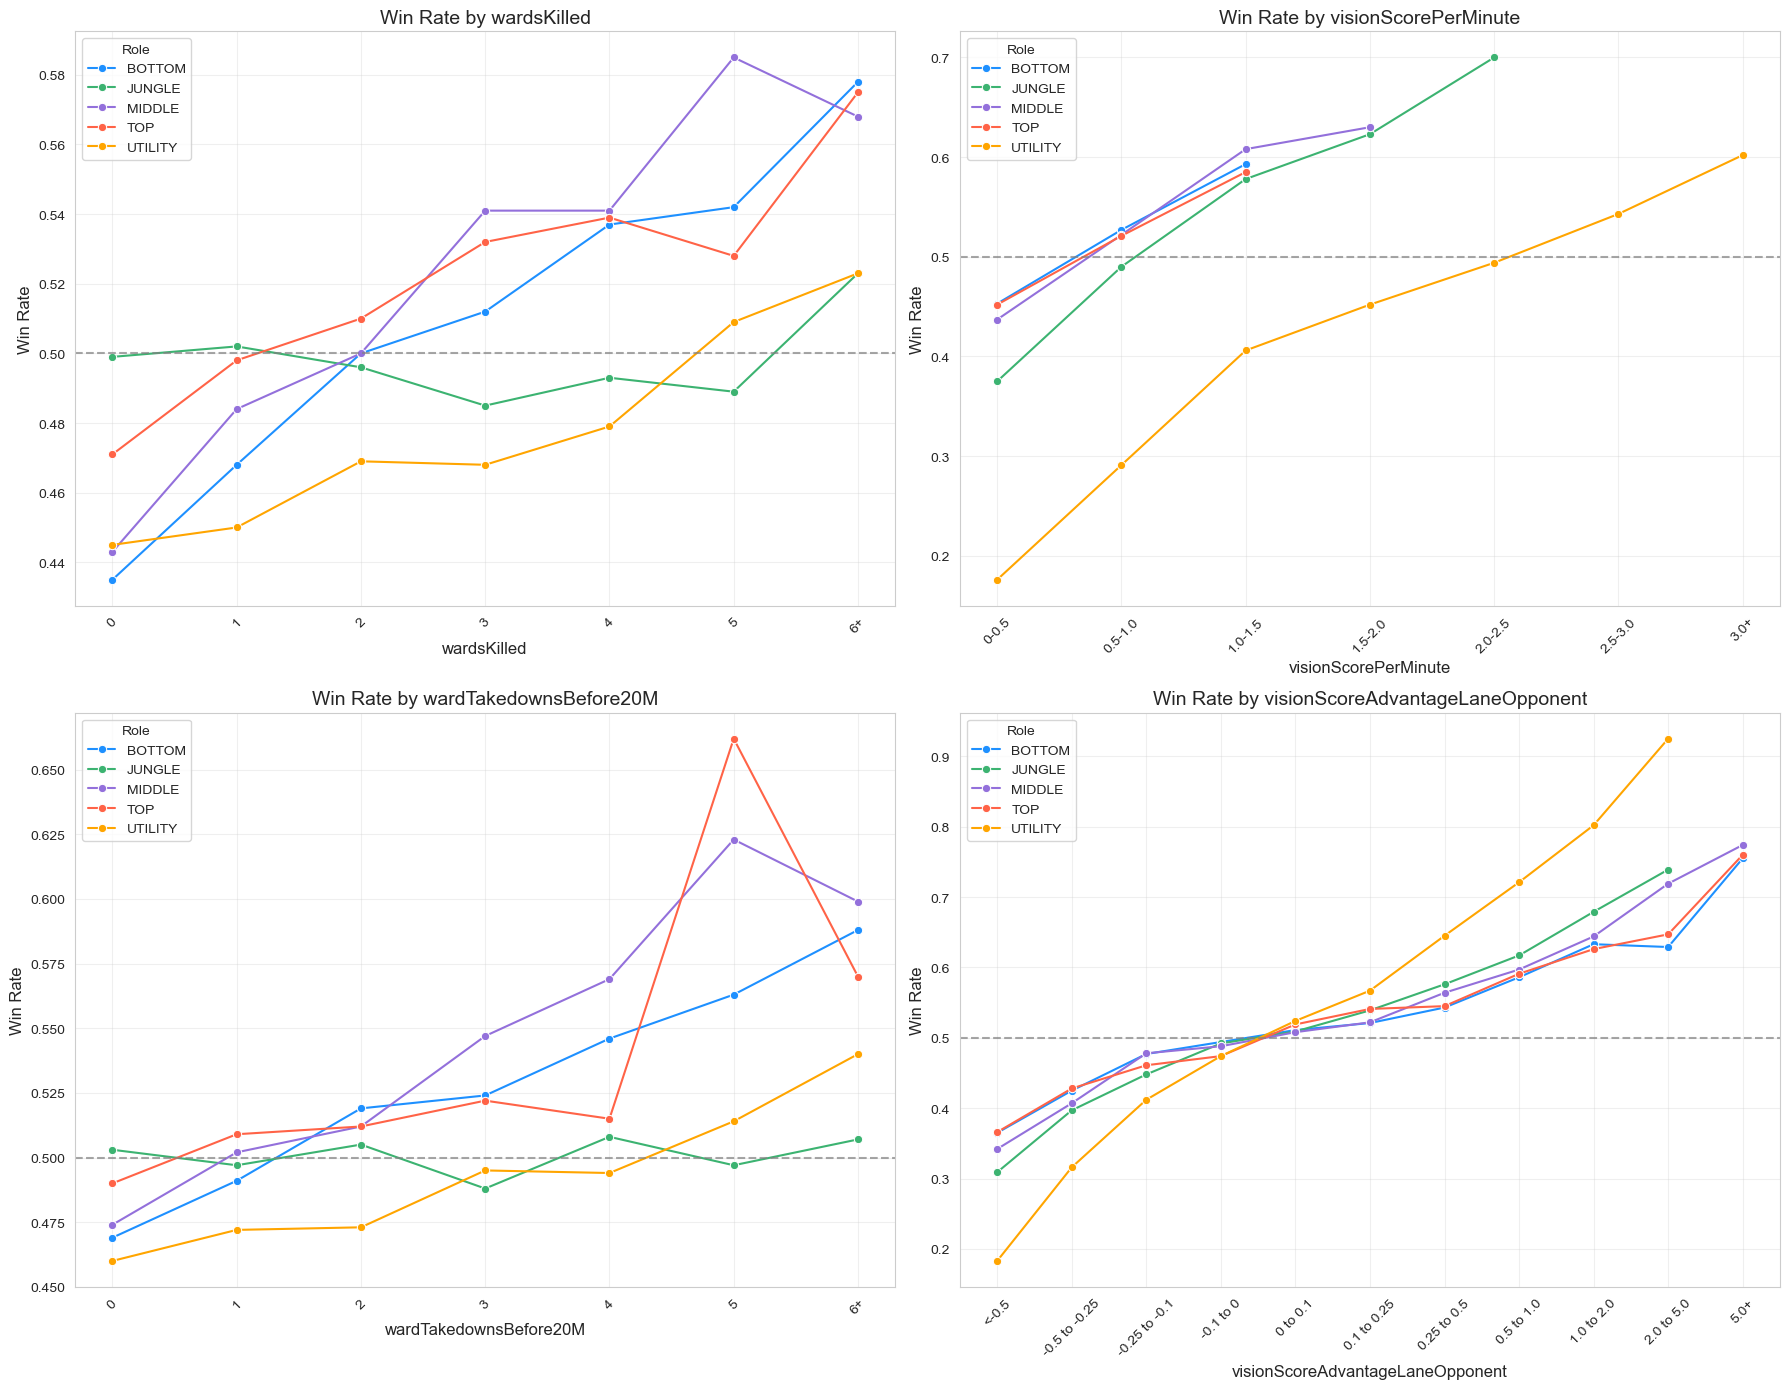

In [122]:
# --- Vision Metrics Visualization by Role (Corrected) ---

print("=== Vision Metrics vs. Win Rate by Role (Visualized) ===\n")

# Define the specific vision metrics to analyze
vision_metrics = [
    'wardsKilled',
    'visionScorePerMinute', 
    'wardTakedownsBefore20M',
    'visionScoreAdvantageLaneOpponent'
]

# Get unique roles
roles = sorted(cleaned_df['teamPosition'].unique())
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")

# Flatten axes for easier iteration
axes = axes.flatten()

# Create bins for each metric to analyze win rate across ranges
for i, metric in enumerate(vision_metrics):
    ax = axes[i]
    
    # Create appropriate bins for each metric
    if metric == 'wardsKilled':
        bins = [-1, 0, 1, 2, 3, 4, 5, np.inf]
        labels = ['0', '1', '2', '3', '4', '5', '6+']
    elif metric == 'visionScorePerMinute':
        bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, np.inf]
        labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0+']
    elif metric == 'wardTakedownsBefore20M':
        bins = [-1, 0, 1, 2, 3, 4, 5, np.inf]
        labels = ['0', '1', '2', '3', '4', '5', '6+']
    elif metric == 'visionScoreAdvantageLaneOpponent':
        # --- BINS BASED ON ACTUAL DATA DISTRIBUTION ---
        # Using percentiles and standard deviations to create meaningful ranges
        bins = [-np.inf, -0.5, -0.25, -0.1, 0, 0.1, 0.25, 0.5, 1.0, 2.0, 5.0, np.inf]
        labels = ['<-0.5', '-0.5 to -0.25', '-0.25 to -0.1', '-0.1 to 0', '0 to 0.1', '0.1 to 0.25', '0.25 to 0.5', '0.5 to 1.0', '1.0 to 2.0', '2.0 to 5.0', '5.0+']
    
    # Create bins for the current metric
    cleaned_df[f'{metric}_bins'] = pd.cut(cleaned_df[metric], bins=bins, labels=labels, right=True)
    
    # Plot win rate by metric bins for each role
    for role in roles:
        # Filter data for the current role
        role_data = cleaned_df[cleaned_df['teamPosition'] == role].copy()
        
        # Calculate win rate by bins for this role
        win_rate_by_bins = role_data.groupby(f'{metric}_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
        win_rate_by_bins.columns = ['Win_Rate', 'Games']
        
        # Filter for bins with enough games for statistical significance
        min_games = 20 if metric == 'visionScoreAdvantageLaneOpponent' else 30
        win_rate_by_bins = win_rate_by_bins[win_rate_by_bins['Games'] >= min_games]
        
        if not win_rate_by_bins.empty:
            sns.lineplot(
                x=win_rate_by_bins.index,
                y=win_rate_by_bins['Win_Rate'],
                ax=ax,
                label=role,
                color=colors[role],
                marker='o'
            )
    
    # Customize the plot
    ax.set_title(f'Win Rate by {metric}', fontsize=14)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('Win Rate', fontsize=12)
    ax.axhline(y=0.5, color='grey', linestyle='--', alpha=0.7)
    ax.legend(title='Role')
    
    # Rotate x-axis labels for better readability
    if metric == 'visionScoreAdvantageLaneOpponent':
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=45)
    
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clean up temporary columns
for metric in vision_metrics:
    if f'{metric}_bins' in cleaned_df.columns:
        cleaned_df.drop(columns=[f'{metric}_bins'], inplace=True)

**Key Takeaway**
- Vision Score's correlation with winning appears much lower than I had expected.

### Vision Correlation with Other Metrics (Kills / Deaths)

Deaths vs. Wards Correlation Matrix

                    deaths  wardsPlaced  stealthWardsPlaced  controlWardsPlaced  wardsKilled
deaths              1.0000       0.1482              0.1360              0.0588       0.1443
wardsPlaced         0.1482       1.0000              0.9664              0.6559       0.5527
stealthWardsPlaced  0.1360       0.9664              1.0000              0.5205       0.5147
controlWardsPlaced  0.0588       0.6559              0.5205              1.0000       0.4795
wardsKilled         0.1443       0.5527              0.5147              0.4795       1.0000

Average Deaths by Ward Count Category
                     Avg_Deaths  Games
ward_count_category                   
0                         5.288   1689
1-2                       5.101   9976
3-5                       4.725  30550
6-8                       5.186  40246
9-11                      5.682  29943
12+                       5.940  43286

Win Rate Analysis: Low Wards + High Deaths
Win Rate b

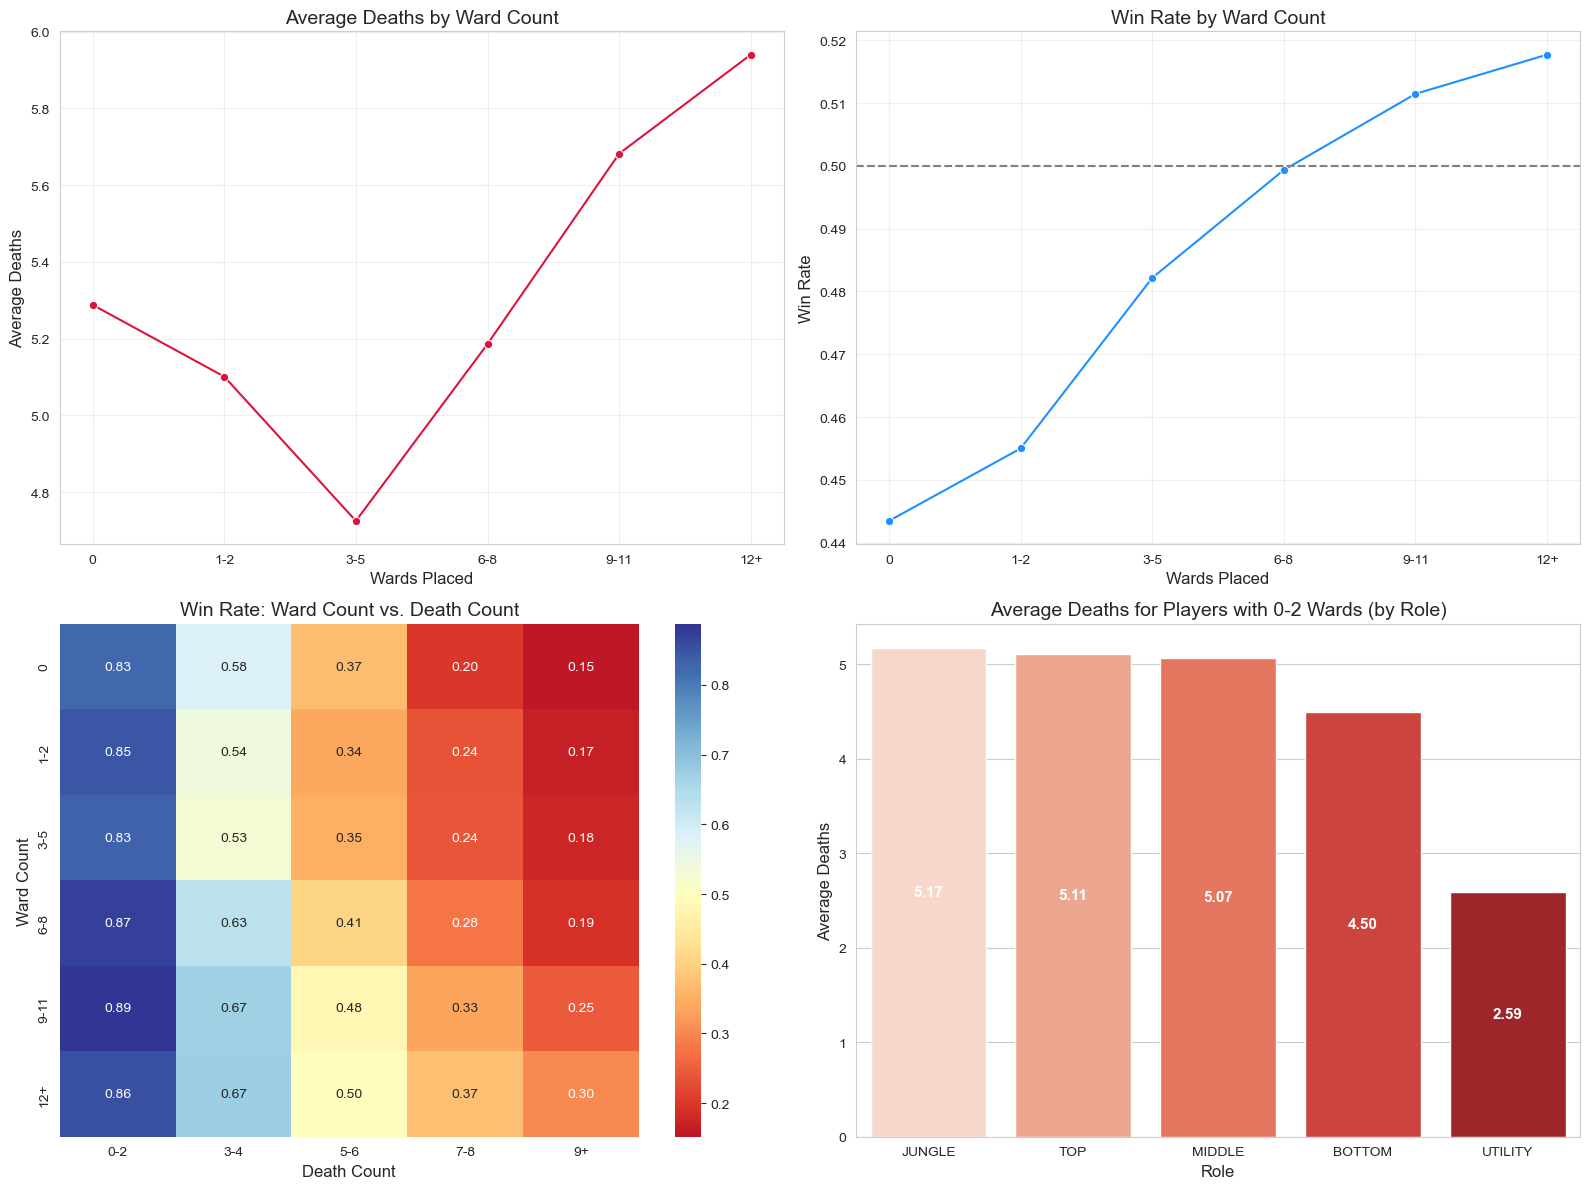

In [144]:
# --- Deaths vs. Wards Correlation Matrix ---
print("Deaths vs. Wards Correlation Matrix\n")

# Select the relevant columns for correlation analysis
ward_death_columns = ['deaths', 'wardsPlaced', 'stealthWardsPlaced', 'controlWardsPlaced', 'wardsKilled']

# Calculate correlation matrix
correlation_matrix = cleaned_df[ward_death_columns].corr()

print(correlation_matrix.round(4))

print()

# --- 1. Create ward count categories ---
cleaned_df['ward_count_category'] = pd.cut(cleaned_df['wardsPlaced'], 
                                          bins=[-1, 0, 2, 5, 8, 11, np.inf], 
                                          labels=['0', '1-2', '3-5', '6-8', '9-11', '12+'])

# --- 2. Average deaths by ward count category ---
print("Average Deaths by Ward Count Category")
deaths_by_wards = cleaned_df.groupby('ward_count_category', observed=False)['deaths'].agg(['mean', 'count']).round(3)
deaths_by_wards.columns = ['Avg_Deaths', 'Games']
print(deaths_by_wards)

print()

# --- 3. Win rate by ward count and death count ---
print("Win Rate Analysis: Low Wards + High Deaths")

cleaned_df['death_category'] = pd.cut(cleaned_df['deaths'], 
                                     bins=[-1, 2, 4, 6, 8, np.inf], 
                                     labels=['0-2', '3-4', '5-6', '7-8', '9+'])

ward_death_win = cleaned_df.groupby(['ward_count_category', 'death_category'], observed=False)['win'].agg(['mean', 'count']).round(3)
ward_death_win.columns = ['Win_Rate', 'Games']

ward_death_win = ward_death_win[ward_death_win['Games'] >= 30]

print("Win Rate by Ward Count and Death Count (min 30 games):")
print(ward_death_win)

print()

# --- 4. Role-specific analysis for low ward players ---
print("Role Analysis: Players with 0-2 Wards")

low_ward_players = cleaned_df[cleaned_df['wardsPlaced'] <= 2]
low_ward_by_role = low_ward_players.groupby('teamPosition')['deaths'].agg(['mean', 'count']).round(3)
low_ward_by_role.columns = ['Avg_Deaths', 'Games']

print("Average Deaths for Players with 0-2 Wards (by Role):")
print(low_ward_by_role)

print()

# --- 5. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Average Deaths by Ward Count
ax1 = axes[0, 0]
sns.lineplot(x=deaths_by_wards.index, y=deaths_by_wards['Avg_Deaths'], ax=ax1, marker='o', color='crimson')
ax1.set_title('Average Deaths by Ward Count', fontsize=14)
ax1.set_xlabel('Wards Placed', fontsize=12)
ax1.set_ylabel('Average Deaths', fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: Win Rate by Ward Count
ax2 = axes[0, 1]
win_rate_by_wards = cleaned_df.groupby('ward_count_category', observed=False)['win'].mean()
sns.lineplot(x=win_rate_by_wards.index, y=win_rate_by_wards.values, ax=ax2, marker='o', color='dodgerblue')
ax2.set_title('Win Rate by Ward Count', fontsize=14)
ax2.set_xlabel('Wards Placed', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.grid(True, alpha=0.3)

# Plot 3: Heatmap of Win Rate by Ward Count and Death Count
ax3 = axes[1, 0]
win_rate_pivot = cleaned_df.groupby(['ward_count_category', 'death_category'], observed=False)['win'].mean().unstack()
sns.heatmap(win_rate_pivot, annot=True, cmap='RdYlBu', center=0.5, fmt='.2f', ax=ax3)
ax3.set_title('Win Rate: Ward Count vs. Death Count', fontsize=14)
ax3.set_xlabel('Death Count', fontsize=12)
ax3.set_ylabel('Ward Count', fontsize=12)

# Plot 4: Average Deaths by Role for Low Ward Players (Fixed)
ax4 = axes[1, 1]
low_ward_deaths_by_role = low_ward_players.groupby('teamPosition')['deaths'].mean().sort_values(ascending=False)
sns.barplot(x=low_ward_deaths_by_role.index, y=low_ward_deaths_by_role.values, ax=ax4, hue=low_ward_deaths_by_role.index, palette='Reds', legend=False)
ax4.set_title('Average Deaths for Players with 0-2 Wards (by Role)', fontsize=14)
ax4.set_xlabel('Role', fontsize=12)
ax4.set_ylabel('Average Deaths', fontsize=12)
for index, value in enumerate(low_ward_deaths_by_role.values):
    ax4.text(index, value/2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# Clean up temporary columns
cleaned_df.drop(columns=['ward_count_category', 'death_category'], inplace=True)

## Communication

In [145]:
cleaned_df.head(10)

matchId  gameDuration  gameEndedInEarlySurrender  gameEndedInSurrender  teamId    win  championKills  participantId    riotIdGameName  summonerLevel championName teamPosition  \
0  NA1_5310002423          1635                      False                 False     100  False             16              1          14115621            259     Renekton          TOP   
1  NA1_5310002423          1635                      False                 False     100  False             16              2              自不量力            453       LeeSin       JUNGLE   
2  NA1_5310002423          1635                      False                 False     100  False             16              3          dead boi            147         Hwei       MIDDLE   
3  NA1_5310002423          1635                      False                 False     100  False             16              4     Darth Goonius           1169      Kalista       BOTTOM   
4  NA1_5310002423          1635                      False                 False     100  False             16              5             marco            886       Thresh      UTILITY   
5  NA1_5310002423          1635                      False                 False     200   True             36              6        uncle Urgy            142        Urgot          TOP   
6  NA1_5310002423          1635                      False                 False     200   True             36              7              tibs            552        Poppy       JUNGLE   
7  NA1_5310002423          1635                      False                 False     200   True             36              8        xExplosive            662        Karma       MIDDLE   
8  NA1_5310002423          1635                      False                 False     200   True             36              9       Me Have Fun            714        Corki       BOTTOM   
9  NA1_5310002423          1635                      False                 False     200   True             36             10  BenTbeyondrepair            767       Maokai      UTILITY   

   champExperience  kills  deaths  assists  soloKills  firstBloodKill  consumablesPurchased  damageDealtToObjectives  damageSelfMitigated  totalDamageTaken  firstTowerKill  firstTowerAssist  \
0            12990      3       7        3          1           False                     1                      591                31231             37257           False             False   
1            11416      2       8        6          1           False                     6                    10476                30342             32820           False             False   
2            14658      1       8        4          1           False                     2                     4702                 9004             15512           False             False   
3            10990      9       9        2          0           False                     1                     3460                13152             22780           False             False   
4            10000      1       4       10          0           False                     4                        0                17677             20320           False             False   
5            15600      8       5        1          4            True                     1                    23130                35685             25218            True             False   
6            15885      6       2       18          0           False                     7                    39937                44356             29302           False             False   
7            16102      7       0       18          0           False                     2                     7932                 9018             11526           False             False   
8            14285     12       4       10          0           False                     1                    33164                15835             13520           False             False   
9          

### Pings

Key Insights
1. Which ping types correlate most strongly with winning?
2. Which roles use which ping types most?
3. Is there an optimal amount of pinging?
4. Do certain ping types indicate better team coordination?

Ping Usage Analysis and Win Rate Correlation

Overall Ping Statistics
       allInPings  assistMePings  commandPings  enemyMissingPings  enemyVisionPings  getBackPings  needVisionPings  onMyWayPings  pushPings
count   155690.00      155690.00     155690.00          155690.00         155690.00     155690.00        155690.00     155690.00  155690.00
mean         0.93           3.20          6.64               6.53              3.57          2.87             0.30         13.24       0.41
std          3.05           5.57          7.93               7.33              5.97          5.28             0.99         15.91       1.57
min          0.00           0.00          0.00               0.00              0.00          0.00             0.00          0.00       0.00
25%          0.00           0.00          1.00               2.00              0.00          0.00             0.00          3.00       0.00
50%          0.00           1.00          4.00               4.00              1.00       

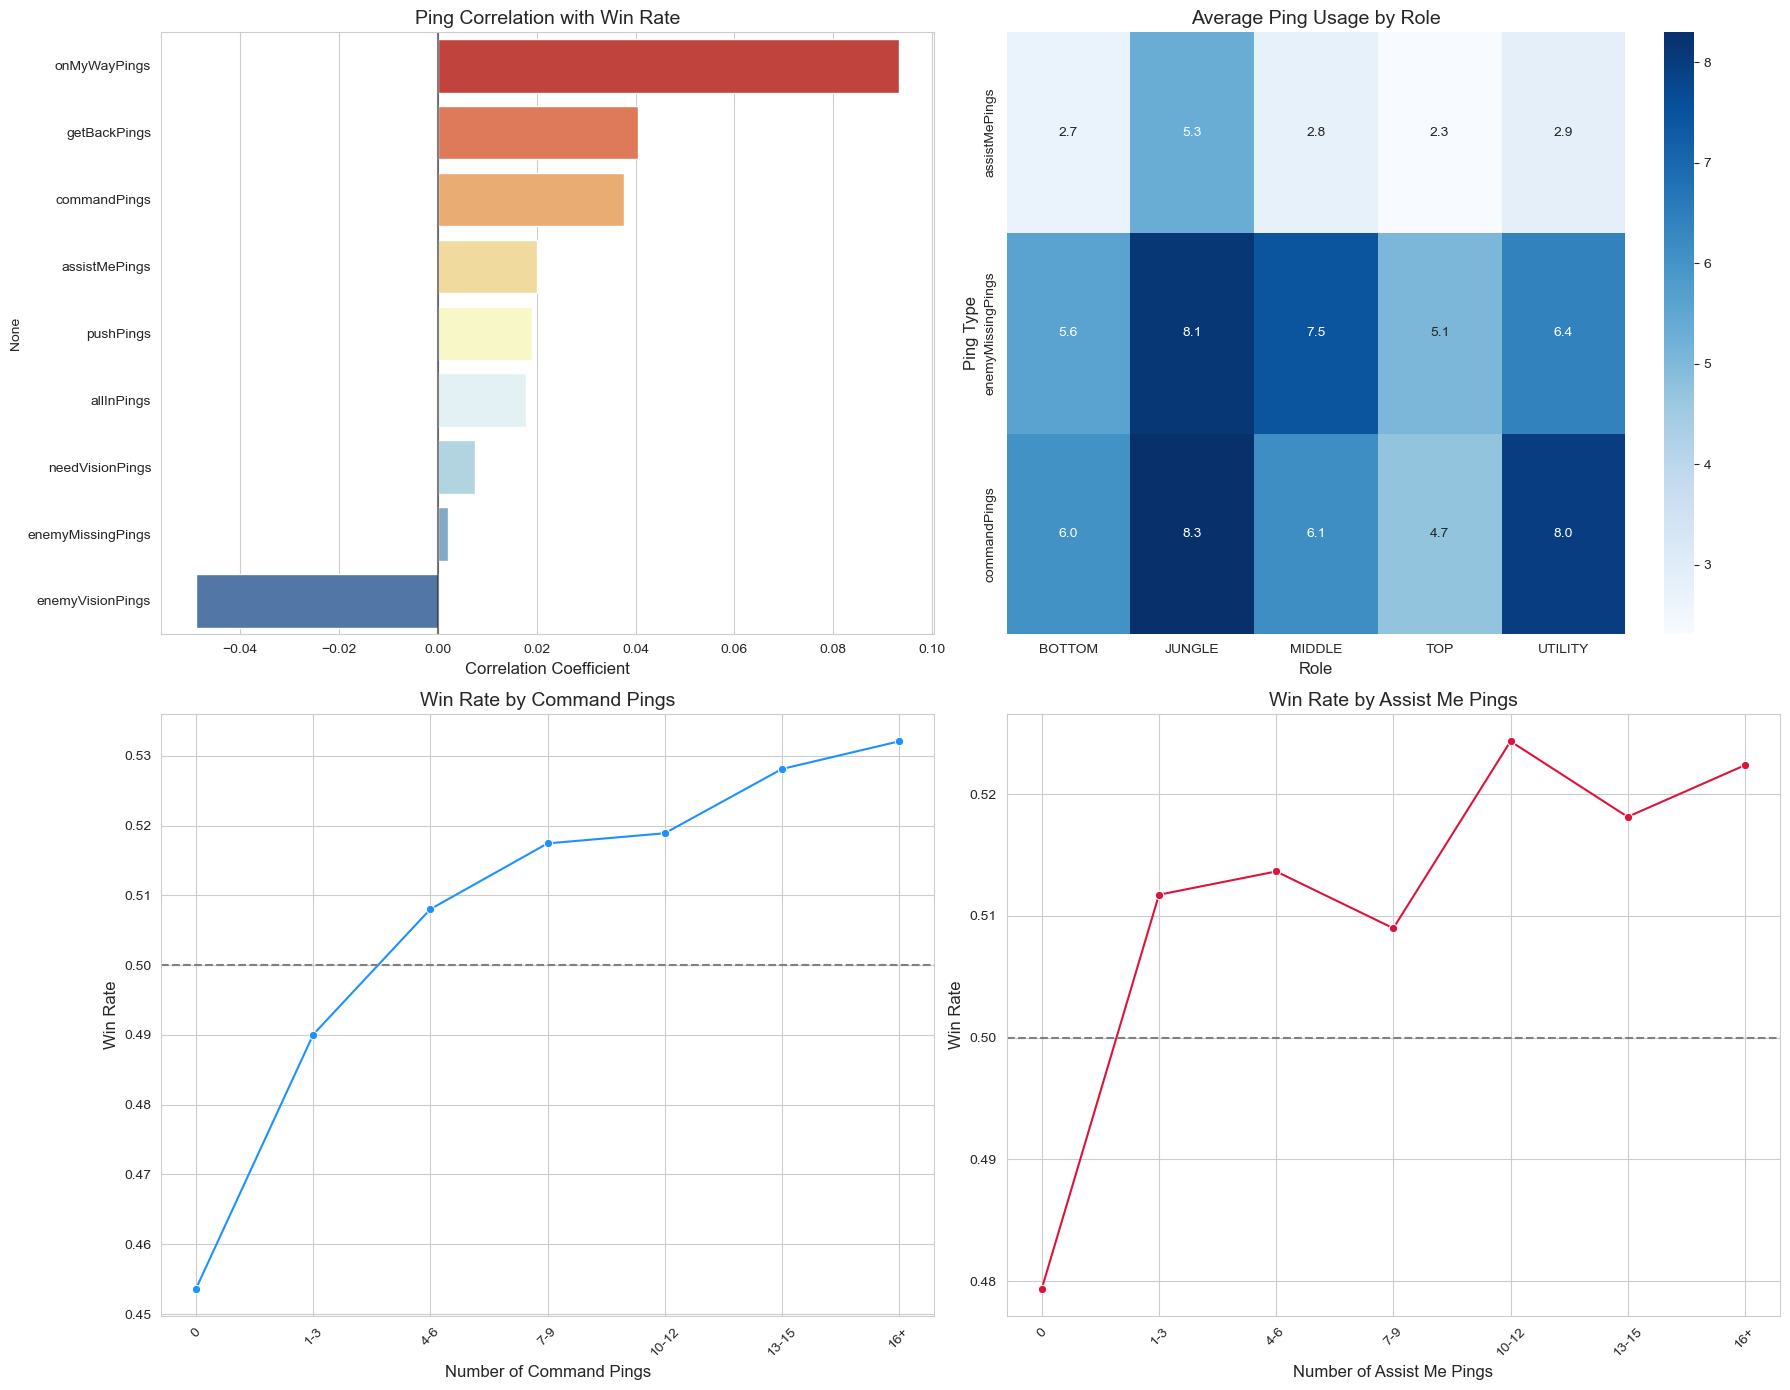

In [154]:
# --- Ping Analysis and Win Rate Correlation ---
print("Ping Usage Analysis and Win Rate Correlation\n")

# --- 1. Define all ping columns ---
ping_columns = [
    'allInPings', 'assistMePings', 'commandPings', 'enemyMissingPings', 'enemyVisionPings',
    'getBackPings', 'needVisionPings', 'onMyWayPings', 'pushPings'
]

# --- 2. Overall ping statistics ---
print("Overall Ping Statistics")
ping_stats = cleaned_df[ping_columns].describe()
print(ping_stats.round(2))

print()

# --- 3. Correlation with win rate ---
print("Ping Correlation with Win Rate")
ping_win_correlations = {}

for ping_type in ping_columns:
    correlation = cleaned_df[ping_type].corr(cleaned_df['win'].astype(int))
    ping_win_correlations[ping_type] = correlation

# Sort by correlation strength
sorted_correlations = sorted(ping_win_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Ping Type Correlation with Win Rate (sorted by strength):")
for ping_type, corr in sorted_correlations:
    print(f"{ping_type}: {corr:.4f}")

print()

# --- 4. Ping usage by role ---
print("Average Ping Usage by Role")
ping_by_role = cleaned_df.groupby('teamPosition')[ping_columns].mean().round(2)
print(ping_by_role)

print()

# --- 5. Win rate by ping count bins ---
print("Win Rate by Ping Count (for most common ping types)")

# Focus on the most used ping types
most_used_pings = ['assistMePings', 'enemyMissingPings', 'commandPings']

for ping_type in most_used_pings:
    print(f"\n{ping_type}:")
    
    # Create bins based on the actual distribution
    max_pings = cleaned_df[ping_type].max()
    if max_pings <= 10:
        bins = [-1, 0, 1, 2, 3, 4, 5, np.inf]
        labels = ['0', '1', '2', '3', '4', '5', '6+']
    elif max_pings <= 20:
        bins = [-1, 0, 2, 4, 6, 8, 10, np.inf]
        labels = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
    else:
        bins = [-1, 0, 3, 6, 9, 12, 15, np.inf]
        labels = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
    
    cleaned_df[f'{ping_type}_bins'] = pd.cut(cleaned_df[ping_type], bins=bins, labels=labels, right=True)
    
    win_rate_by_pings = cleaned_df.groupby(f'{ping_type}_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
    win_rate_by_pings.columns = ['Win_Rate', 'Games']
    win_rate_by_pings = win_rate_by_pings[win_rate_by_pings['Games'] >= 50]
    
    print(win_rate_by_pings)

print()

# --- 6. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")

# Plot 1: Ping correlation heatmap
ax1 = axes[0, 0]
ping_corr_matrix = cleaned_df[ping_columns + ['win']].corr()
ping_corr_with_win = ping_corr_matrix['win'].drop('win').sort_values(ascending=False)
sns.barplot(x=ping_corr_with_win.values, y=ping_corr_with_win.index, ax=ax1, 
            palette='RdYlBu', hue=ping_corr_with_win.index, legend=False)
ax1.set_title('Ping Correlation with Win Rate', fontsize=14)
ax1.set_xlabel('Correlation Coefficient', fontsize=12)
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)

# Plot 2: Average ping usage by role
ax2 = axes[0, 1]
# Use the most used ping types for this plot
top_pings_by_role = ping_by_role[most_used_pings].T
sns.heatmap(top_pings_by_role, annot=True, cmap='Blues', fmt='.1f', ax=ax2)
ax2.set_title('Average Ping Usage by Role', fontsize=14)
ax2.set_xlabel('Role', fontsize=12)
ax2.set_ylabel('Ping Type', fontsize=12)

# Plot 3: Win rate by command pings (replacing basic pings)
ax3 = axes[1, 0]
if 'commandPings_bins' in cleaned_df.columns:
    win_rate_command = cleaned_df.groupby('commandPings_bins', observed=False)['win'].mean()
    sns.lineplot(x=win_rate_command.index, y=win_rate_command.values, ax=ax3, marker='o', color='dodgerblue')
    ax3.set_title('Win Rate by Command Pings', fontsize=14)
    ax3.set_xlabel('Number of Command Pings', fontsize=12)
    ax3.set_ylabel('Win Rate', fontsize=12)
    ax3.axhline(y=0.5, color='grey', linestyle='--')
    ax3.tick_params(axis='x', rotation=45)

# Plot 4: Win rate by assist me pings
ax4 = axes[1, 1]
if 'assistMePings_bins' in cleaned_df.columns:
    win_rate_assist = cleaned_df.groupby('assistMePings_bins', observed=False)['win'].mean()
    sns.lineplot(x=win_rate_assist.index, y=win_rate_assist.values, ax=ax4, marker='o', color='crimson')
    ax4.set_title('Win Rate by Assist Me Pings', fontsize=14)
    ax4.set_xlabel('Number of Assist Me Pings', fontsize=12)
    ax4.set_ylabel('Win Rate', fontsize=12)
    ax4.axhline(y=0.5, color='grey', linestyle='--')
    ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Clean up temporary columns
for ping_type in most_used_pings:
    if f'{ping_type}_bins' in cleaned_df.columns:
        cleaned_df.drop(columns=[f'{ping_type}_bins'], inplace=True)

In [147]:
# Remove holdPings and visionClearedPings columns
cleaned_df = cleaned_df.drop(['holdPings', 'visionClearedPings', 'basicPing'], axis=1)
print(f"Removed holdPings and visionClearedPings columns. DataFrame now has {cleaned_df.shape[1]} columns.")

Removed holdPings and visionClearedPings columns. DataFrame now has 103 columns.


Total Pings Statistics:
count    155690.00
mean         37.70
std          34.97
min           0.00
25%          14.00
50%          28.00
75%          50.00
max         486.00
Name: totalPings, dtype: float64

Total Pings Correlation with Win Rate: 0.0550

Average Total Pings by Role:
              Mean_Total_Pings  Std_Total_Pings  Games
teamPosition                                          
BOTTOM                   30.18            29.63  31138
JUNGLE                   58.68            43.69  31138
MIDDLE                   35.17            29.98  31138
TOP                      25.82            24.26  31138
UTILITY                  38.65            34.56  31138

Win Rate by Total Ping Count:
                 Win_Rate  Games
totalPings_bins                 
0                   0.355   1050
1-15                0.457  43145
16-30               0.501  40646
31-45               0.515  26053
46-60               0.530  16127
61-75               0.526  10104
76-90               0.530   6444
9

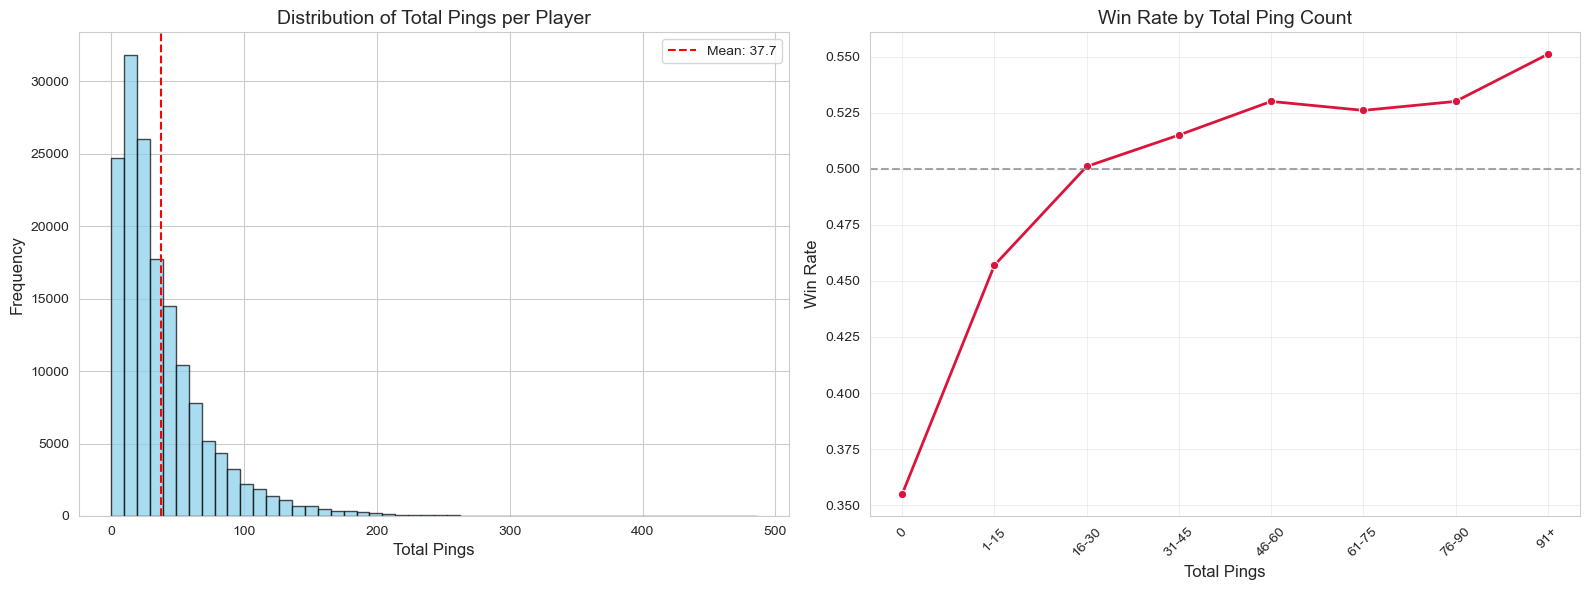

In [156]:
# Create aggregated pings column
cleaned_df['totalPings'] = cleaned_df[ping_columns].sum(axis=1)

# Display statistics for the new column
print("Total Pings Statistics:")
print(cleaned_df['totalPings'].describe().round(2))
print()

# Show correlation with win rate
total_pings_corr = cleaned_df['totalPings'].corr(cleaned_df['win'].astype(int))
print(f"Total Pings Correlation with Win Rate: {total_pings_corr:.4f}")
print()

# Show average total pings by role
print("Average Total Pings by Role:")
total_pings_by_role = cleaned_df.groupby('teamPosition')['totalPings'].agg(['mean', 'std', 'count']).round(2)
total_pings_by_role.columns = ['Mean_Total_Pings', 'Std_Total_Pings', 'Games']
print(total_pings_by_role)
print()

# Create bins for total pings and analyze win rate
print("Win Rate by Total Ping Count:")
max_total_pings = cleaned_df['totalPings'].max()
if max_total_pings <= 50:
    bins = [-1, 0, 5, 10, 15, 20, 25, 30, np.inf]
    labels = ['0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+']
elif max_total_pings <= 100:
    bins = [-1, 0, 10, 20, 30, 40, 50, 60, np.inf]
    labels = ['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+']
else:
    bins = [-1, 0, 15, 30, 45, 60, 75, 90, np.inf]
    labels = ['0', '1-15', '16-30', '31-45', '46-60', '61-75', '76-90', '91+']

cleaned_df['totalPings_bins'] = pd.cut(cleaned_df['totalPings'], bins=bins, labels=labels, right=True)

win_rate_by_total_pings = cleaned_df.groupby('totalPings_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_total_pings.columns = ['Win_Rate', 'Games']
win_rate_by_total_pings = win_rate_by_total_pings[win_rate_by_total_pings['Games'] >= 50]
print(win_rate_by_total_pings)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# Plot 1: Distribution of total pings
ax1.hist(cleaned_df['totalPings'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
ax1.set_title('Distribution of Total Pings per Player', fontsize=14)
ax1.set_xlabel('Total Pings', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.axvline(cleaned_df['totalPings'].mean(), color='red', linestyle='--', label=f'Mean: {cleaned_df["totalPings"].mean():.1f}')
ax1.legend()

# Plot 2: Win rate by total ping bins
if len(win_rate_by_total_pings) > 0:
    sns.lineplot(x=win_rate_by_total_pings.index, y=win_rate_by_total_pings['Win_Rate'], 
                ax=ax2, marker='o', color='crimson', linewidth=2, markersize=6)
    ax2.set_title('Win Rate by Total Ping Count', fontsize=14)
    ax2.set_xlabel('Total Pings', fontsize=12)
    ax2.set_ylabel('Win Rate', fontsize=12)
    ax2.axhline(y=0.5, color='grey', linestyle='--', alpha=0.7)
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clean up temporary column
if 'totalPings_bins' in cleaned_df.columns:
    cleaned_df.drop(columns=['totalPings_bins'], inplace=True)

# EDA (Non-Role Specific / Trivial)

1. Spell Casts 
    - What abilities gets pressed the most (Q)
    - How does summoner spell usage correlate with win/loss
2. Fist Bump Participation
    - Is there a correlation with players who likes to fist bump and win/loss

# Modelling 

In [158]:
cleaned_df.head(10)

matchId  gameDuration  gameEndedInEarlySurrender  gameEndedInSurrender  teamId    win  championKills  participantId    riotIdGameName  summonerLevel championName teamPosition  \
0  NA1_5310002423          1635                      False                 False     100  False             16              1          14115621            259     Renekton          TOP   
1  NA1_5310002423          1635                      False                 False     100  False             16              2              自不量力            453       LeeSin       JUNGLE   
2  NA1_5310002423          1635                      False                 False     100  False             16              3          dead boi            147         Hwei       MIDDLE   
3  NA1_5310002423          1635                      False                 False     100  False             16              4     Darth Goonius           1169      Kalista       BOTTOM   
4  NA1_5310002423          1635                      False                 False     100  False             16              5             marco            886       Thresh      UTILITY   
5  NA1_5310002423          1635                      False                 False     200   True             36              6        uncle Urgy            142        Urgot          TOP   
6  NA1_5310002423          1635                      False                 False     200   True             36              7              tibs            552        Poppy       JUNGLE   
7  NA1_5310002423          1635                      False                 False     200   True             36              8        xExplosive            662        Karma       MIDDLE   
8  NA1_5310002423          1635                      False                 False     200   True             36              9       Me Have Fun            714        Corki       BOTTOM   
9  NA1_5310002423          1635                      False                 False     200   True             36             10  BenTbeyondrepair            767       Maokai      UTILITY   

   champExperience  kills  deaths  assists  soloKills  firstBloodKill  consumablesPurchased  damageDealtToObjectives  damageSelfMitigated  totalDamageTaken  firstTowerKill  firstTowerAssist  \
0            12990      3       7        3          1           False                     1                      591                31231             37257           False             False   
1            11416      2       8        6          1           False                     6                    10476                30342             32820           False             False   
2            14658      1       8        4          1           False                     2                     4702                 9004             15512           False             False   
3            10990      9       9        2          0           False                     1                     3460                13152             22780           False             False   
4            10000      1       4       10          0           False                     4                        0                17677             20320           False             False   
5            15600      8       5        1          4            True                     1                    23130                35685             25218            True             False   
6            15885      6       2       18          0           False                     7                    39937                44356             29302           False             False   
7            16102      7       0       18          0           False                     2                     7932                 9018             11526           False             False   
8            14285     12       4       10          0           False                     1                    33164                15835             13520           False             False   
9          

## Correlation Matrix

Original DataFrame columns: 105
Columns after exclusion: 51
Excluded columns: 57

Calculating correlation matrix for selected columns...
Correlation matrix shape: (51, 51)
Number of columns: 51

Top 20 Correlations with Win Rate (sorted by strength):
 1. turretTakedowns: 0.5966
 2. inhibitorKills: 0.5955
 3. atakhanKills: 0.4901
 4. maxLevelLeadLaneOpponent: 0.4385
 5. deaths: -0.4074
 6. firstTurretKilledTime: 0.4012
 7. baronFirst: 0.3938
 8. turretKills: 0.3832
 9. baronKills: 0.3755
10. damageDealtToObjectives: 0.3397
11. assists: 0.3393
12. riftHeraldKills: 0.3379
13. kills: 0.2888
14. champExperience: 0.2542
15. goldEarned: 0.2401
16. damagePerMinute: 0.2146
17. dragonFirst: 0.2123
18. turretPlatesTaken: 0.1926
19. maxCsAdvantageOnLaneOpponent: 0.1793
20. dragonKills: 0.1688

Top 20 Strongest Correlations Overall:
 1. goldEarned ↔ goldSpent: 0.9683
 2. wardsPlaced ↔ stealthWardsPlaced: 0.9664
 3. neutralMinionsKilled ↔ jungleCsBefore10Minutes: 0.9607
 4. visionScore ↔ visionScore

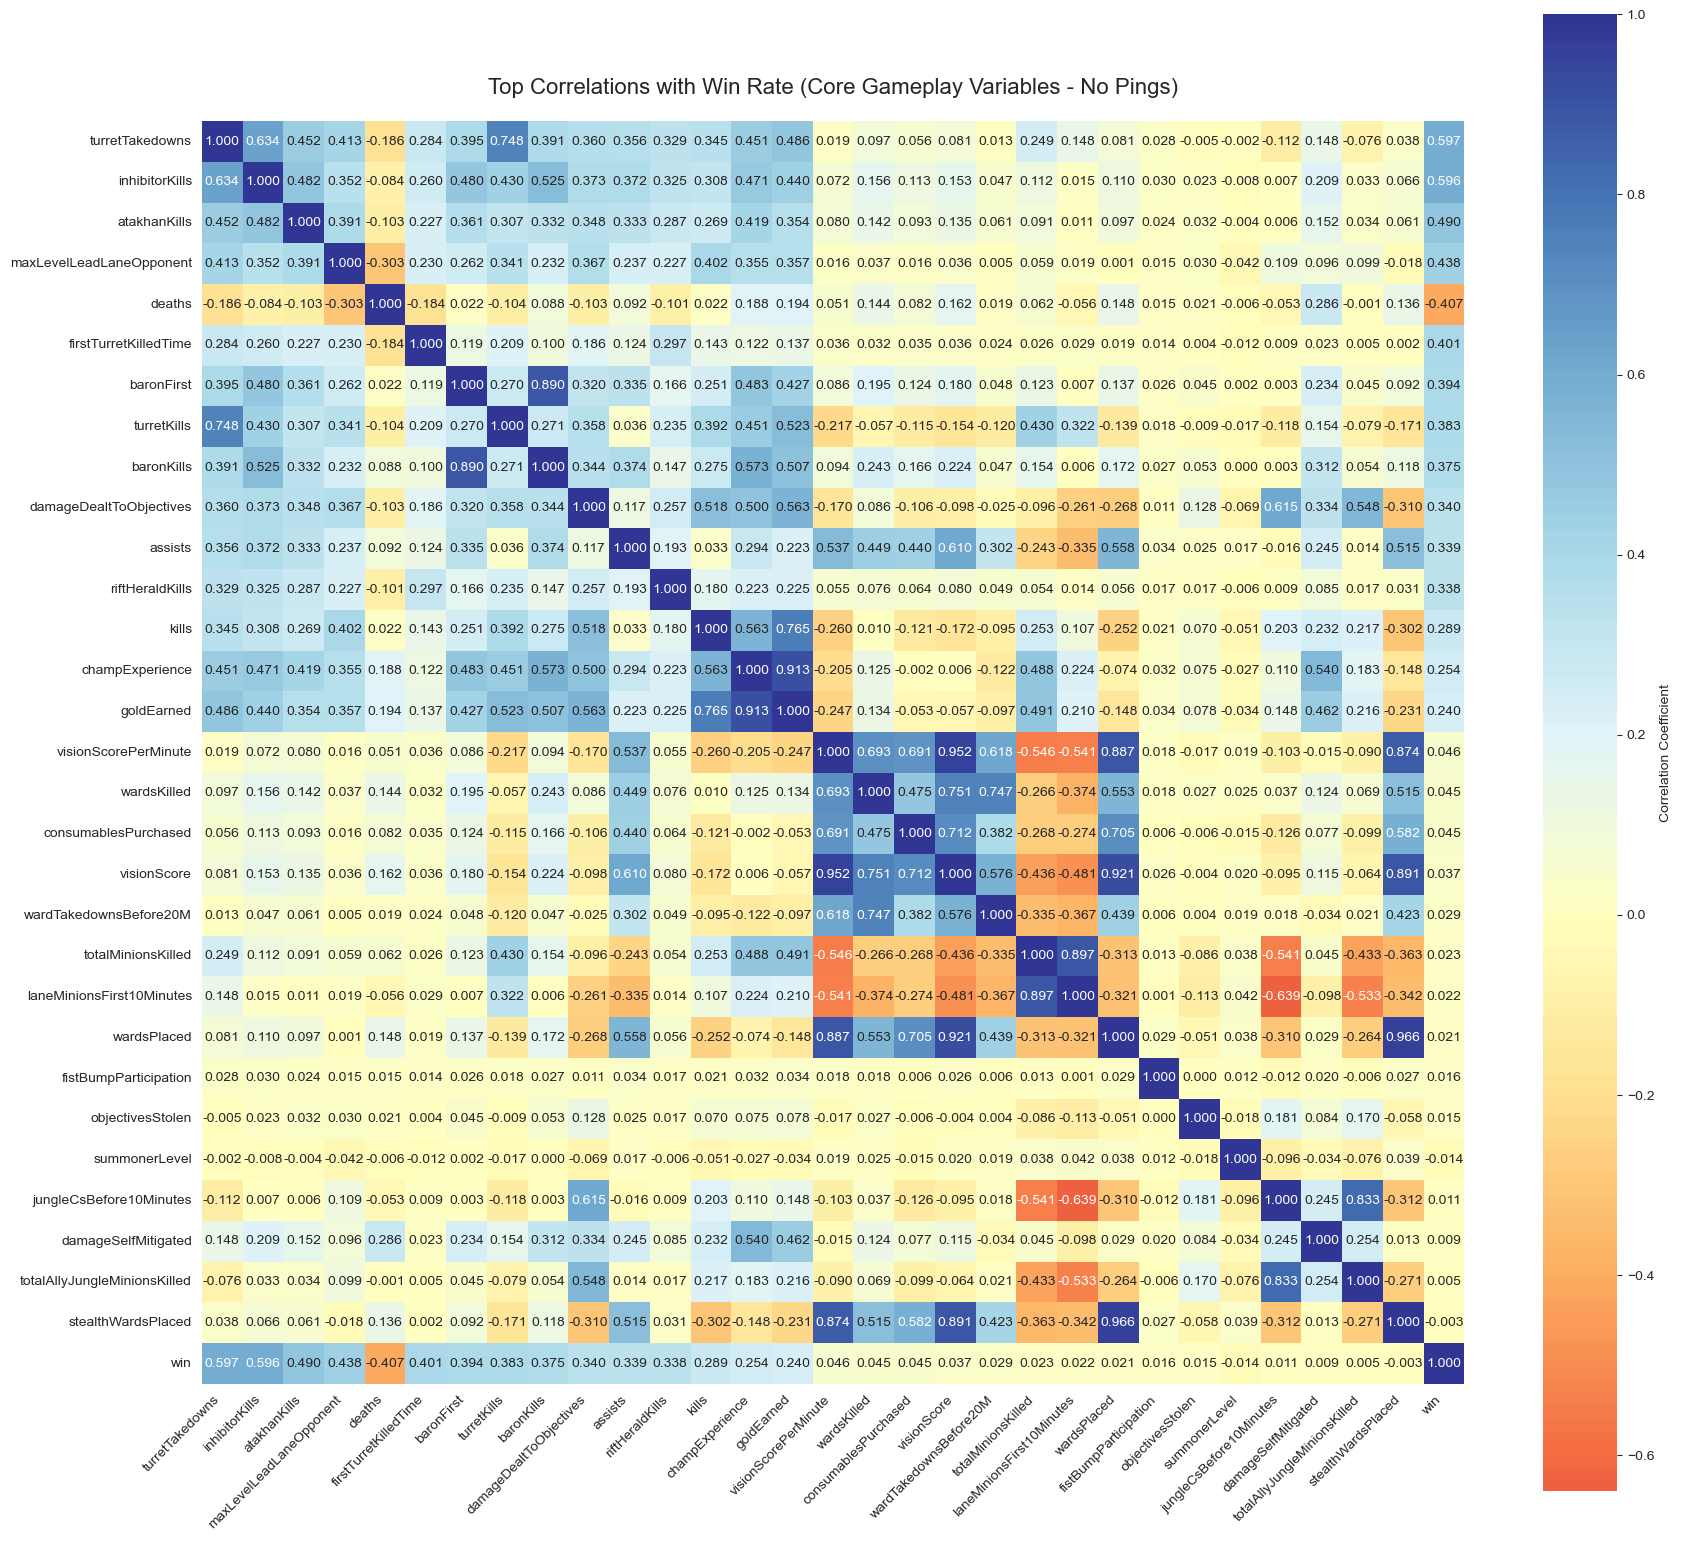


Creating simplified win rate correlation heatmap...


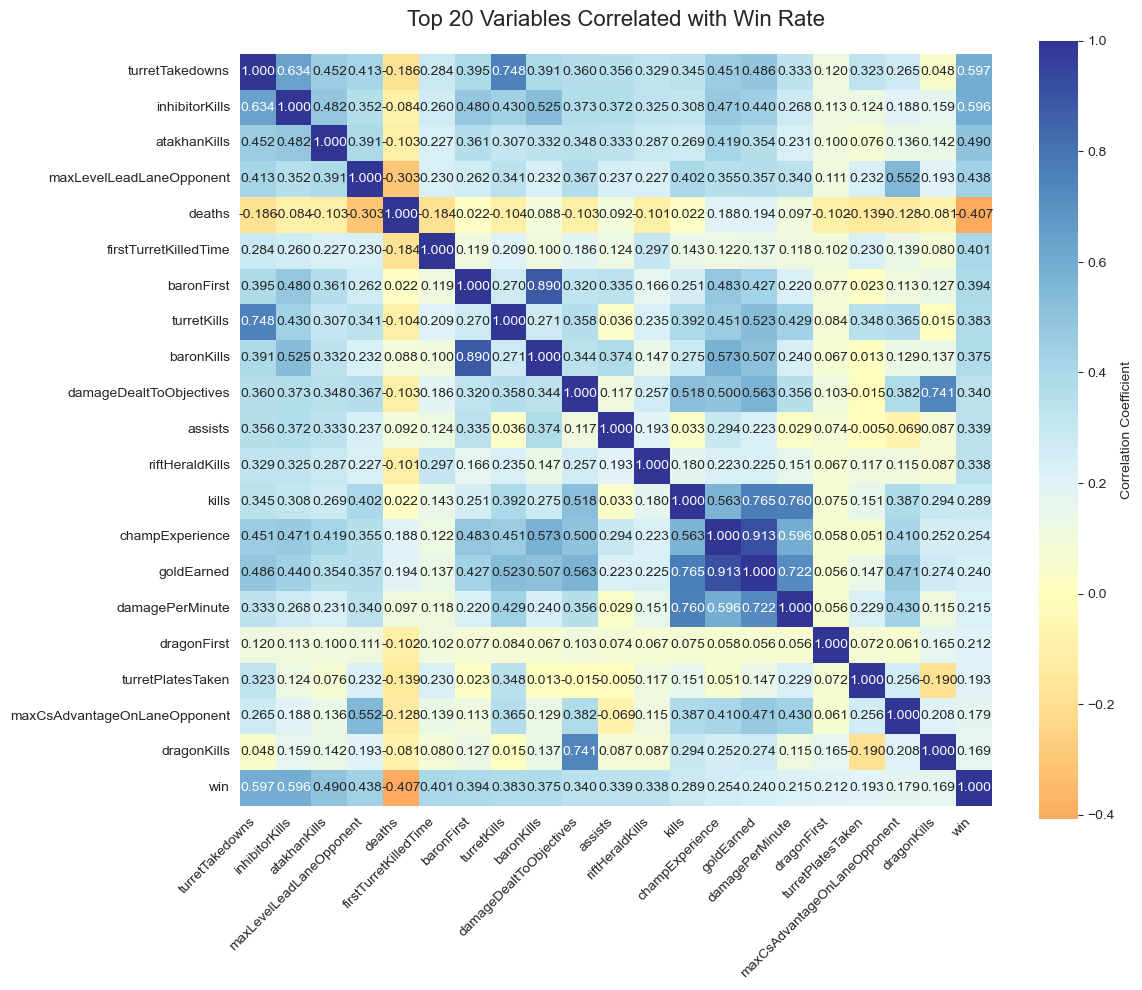

In [173]:
# Define columns to exclude
exclude_columns = [
    'matchId', 'gameDuration', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 
    'teamId', 'championKills', 'participantId', 'riotIdGameName', 'championName', 
    'teamPosition', 'firstTower', 'spell1Casts', 'spell2Casts', 'spell3Casts', 
    'spell4Casts', 'abilityUses', 'summoner1Id', 'summoner1Casts', 'summoner2Id', 
    'summoner2Casts', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 
    'epicMonsterKill', 'firstBlood', 'firstTurret', 'maxKillDeficit',
    'dragon_lead_bins', 'stealth_ward_bins', 'control_ward_bins', 'ward_category', 
    'ward_count_cat', 'basicPings_bins', 'totalPings', 'holdPings', 'visionClearedPings',
    'basicPings', 'dpm_bins', 'deficit_bins', 'kill_bins', 'death_bins', 'assist_bins', 
    'featsOfStr', 'dragonLead', 'enemyVisionPings', 'enemyMissingPings', 'assistMePings',
    'allInPings', 'pushPings', 'getBackPings', 'commandPings', 'needVisionPings', 'inhibitorFirst'
]

# Get columns to include (all columns except excluded ones)
include_columns = [col for col in cleaned_df.columns if col not in exclude_columns]

print(f"Original DataFrame columns: {len(cleaned_df.columns)}")
print(f"Columns after exclusion: {len(include_columns)}")
print(f"Excluded columns: {len(exclude_columns)}")
print()

# Create correlation matrix for selected columns
print("Calculating correlation matrix for selected columns...")
selected_corr_matrix = cleaned_df[include_columns].corr()

# Display basic info about the correlation matrix
print(f"Correlation matrix shape: {selected_corr_matrix.shape}")
print(f"Number of columns: {len(selected_corr_matrix.columns)}")
print()

# Show correlations with win rate (most important)
print("Top 20 Correlations with Win Rate (sorted by strength):")
win_correlations = selected_corr_matrix['win'].drop('win').sort_values(key=abs, ascending=False)
for i, (col, corr) in enumerate(win_correlations.head(20).items()):
    print(f"{i+1:2d}. {col}: {corr:.4f}")

print()

# Show the strongest correlations overall
print("Top 20 Strongest Correlations Overall:")
# Get all correlations (excluding diagonal)
correlations = []
for i in range(len(selected_corr_matrix.columns)):
    for j in range(i+1, len(selected_corr_matrix.columns)):
        col1 = selected_corr_matrix.columns[i]
        col2 = selected_corr_matrix.columns[j]
        corr_value = selected_corr_matrix.iloc[i, j]
        correlations.append((col1, col2, corr_value))

# Sort by absolute correlation strength
correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for i, (col1, col2, corr) in enumerate(correlations[:20]):
    print(f"{i+1:2d}. {col1} ↔ {col2}: {corr:.4f}")

print()

# Create a better heatmap focused on win rate correlations
print("Creating improved heatmap focused on win rate correlations...")

# Get top correlations with win rate
top_win_corr = win_correlations.head(15)
top_win_corr_reversed = win_correlations.tail(15)  # Most negative correlations

# Combine top positive and negative correlations with win
top_corr_cols = list(top_win_corr.index) + list(top_win_corr_reversed.index) + ['win']
top_corr_cols = list(dict.fromkeys(top_corr_cols))  # Remove duplicates

# Reorder columns to put 'win' at the end (rightmost column and bottom row)
top_corr_cols.remove('win')
top_corr_cols.append('win')

# Create subset of correlation matrix for visualization
subset_corr = selected_corr_matrix.loc[top_corr_cols, top_corr_cols]

# Create heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(subset_corr, 
            annot=True, 
            cmap='RdYlBu', 
            center=0, 
            fmt='.3f',
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Top Correlations with Win Rate (Core Gameplay Variables - No Pings)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Also create a simpler heatmap showing just the win rate correlations
print("\nCreating simplified win rate correlation heatmap...")

# Create a simple correlation matrix with just the top variables and win
top_vars = win_correlations.head(20).index.tolist()
simple_corr = selected_corr_matrix.loc[top_vars + ['win'], top_vars + ['win']]

plt.figure(figsize=(12, 10))
sns.heatmap(simple_corr, 
            annot=True, 
            cmap='RdYlBu', 
            center=0, 
            fmt='.3f',
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Top 20 Variables Correlated with Win Rate', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Engineering and Selection

In [174]:
cleaned_df.head(10)

matchId  gameDuration  gameEndedInEarlySurrender  gameEndedInSurrender  teamId    win  championKills  participantId    riotIdGameName  summonerLevel championName teamPosition  \
0  NA1_5310002423          1635                      False                 False     100  False             16              1          14115621            259     Renekton          TOP   
1  NA1_5310002423          1635                      False                 False     100  False             16              2              自不量力            453       LeeSin       JUNGLE   
2  NA1_5310002423          1635                      False                 False     100  False             16              3          dead boi            147         Hwei       MIDDLE   
3  NA1_5310002423          1635                      False                 False     100  False             16              4     Darth Goonius           1169      Kalista       BOTTOM   
4  NA1_5310002423          1635                      False                 False     100  False             16              5             marco            886       Thresh      UTILITY   
5  NA1_5310002423          1635                      False                 False     200   True             36              6        uncle Urgy            142        Urgot          TOP   
6  NA1_5310002423          1635                      False                 False     200   True             36              7              tibs            552        Poppy       JUNGLE   
7  NA1_5310002423          1635                      False                 False     200   True             36              8        xExplosive            662        Karma       MIDDLE   
8  NA1_5310002423          1635                      False                 False     200   True             36              9       Me Have Fun            714        Corki       BOTTOM   
9  NA1_5310002423          1635                      False                 False     200   True             36             10  BenTbeyondrepair            767       Maokai      UTILITY   

   champExperience  kills  deaths  assists  soloKills  firstBloodKill  consumablesPurchased  damageDealtToObjectives  damageSelfMitigated  totalDamageTaken  firstTowerKill  firstTowerAssist  \
0            12990      3       7        3          1           False                     1                      591                31231             37257           False             False   
1            11416      2       8        6          1           False                     6                    10476                30342             32820           False             False   
2            14658      1       8        4          1           False                     2                     4702                 9004             15512           False             False   
3            10990      9       9        2          0           False                     1                     3460                13152             22780           False             False   
4            10000      1       4       10          0           False                     4                        0                17677             20320           False             False   
5            15600      8       5        1          4            True                     1                    23130                35685             25218            True             False   
6            15885      6       2       18          0           False                     7                    39937                44356             29302           False             False   
7            16102      7       0       18          0           False                     2                     7932                 9018             11526           False             False   
8            14285     12       4       10          0           False                     1                    33164                15835             13520           False             False   
9          

In [253]:
# Create controlWardInInventory column in the original cleaned_df
item_columns = ['item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6']

# Check if item 2055 (Control Ward) exists in any of the item columns
cleaned_df['controlWardInInventory'] = cleaned_df[item_columns].isin([2055]).any(axis=1).astype(int)


print()

# Show control ward in inventory by role
print("\nControl Ward in Inventory by Role:")
control_ward_by_role = cleaned_df.groupby('teamPosition')['controlWardInInventory'].agg(['mean', 'count']).round(3)
control_ward_by_role.columns = ['Has_Control_Ward_Rate', 'Games']
print(control_ward_by_role)

print(f"\nDataFrame shape after adding controlWardInInventory: {cleaned_df.shape}")
print(f"New column added: controlWardInInventory")



Control Ward in Inventory by Role:
              Has_Control_Ward_Rate  Games
teamPosition                              
BOTTOM                        0.025  31138
JUNGLE                        0.117  31138
MIDDLE                        0.045  31138
TOP                           0.038  31138
UTILITY                       0.315  31138

DataFrame shape after adding controlWardInInventory: (155690, 106)
New column added: controlWardInInventory


In [255]:
# Create new DataFrame without surrender columns
modeling_df = cleaned_df.drop(['gameEndedInEarlySurrender', 'gameEndedInSurrender', 'championKills', 'riotIdGameName', 'summonerLevel', 'firstTowerAssist', 
'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'abilityUses', 'summoner1Id', 'summoner2Id', 'summoner1Casts', 'summoner2Casts', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
'baronKills', 'inhibitorKills', 'riftHeraldKills', 'atakhanKills', 'epicMonsterKill', 'firstBlood', 'firstTurret', 'maxKillDeficit', 'hadOpenNexus', 'dpm_bins', 'deficit_bins', 'kill_bins',
'death_bins', 'assist_bins', 'featsOfStr', 'dragon_lead_bins', 'stealth_ward_bins', 'control_ward_bins', 'ward_category', 'ward_count_cat', 'basicPings_bins',
'totalPings', 'inhibitorFirst', 'teamElderDragonKills', 'fistBumpParticipation', 'pushPings', 'onMyWayPings', 'needVisionPings', 'getBackPings', 'enemyVisionPings', 'commandPings', 'allInPings',
'basicPings', 'getBackPings', 'baronFirst', 'dragonFirst'], axis=1)

print(f"Original DataFrame shape: {cleaned_df.shape}")
print(f"New DataFrame shape: {modeling_df.shape}")
print(f"Remaining columns: {modeling_df.shape[1]}")

Original DataFrame shape: (155690, 106)
New DataFrame shape: (155690, 49)
Remaining columns: 49


In [256]:
# Convert firstBloodKill from boolean to numeric (0/1)
modeling_df['firstBloodKill'] = modeling_df['firstBloodKill'].astype(int)

# Verify the conversion
print("First Blood Kill column after conversion:")
print(modeling_df['firstBloodKill'].value_counts())
print()

# Show the data type
print(f"Data type: {modeling_df['firstBloodKill'].dtype}")

# Show correlation with win rate
fb_corr = modeling_df['firstBloodKill'].corr(modeling_df['win'].astype(int))
print(f"First Blood Kill Correlation with Win Rate: {fb_corr:.4f}")

# Show win rate by first blood kill
print("\nWin Rate by First Blood Kill:")
fb_win_rate = modeling_df.groupby('firstBloodKill')['win'].agg(['mean', 'count']).round(3)
fb_win_rate.columns = ['Win_Rate', 'Games']
print(fb_win_rate)

First Blood Kill column after conversion:
firstBloodKill
0    140238
1     15452
Name: count, dtype: int64

Data type: int64
First Blood Kill Correlation with Win Rate: 0.0479

Win Rate by First Blood Kill:
                Win_Rate   Games
firstBloodKill                  
0                  0.492  140238
1                  0.572   15452


In [257]:
# Add combined minions killed column
modeling_df['combinedMinionsKilled'] = modeling_df['neutralMinionsKilled'] + modeling_df['totalMinionsKilled']

# Display statistics for the new column
print("Combined Minions Killed Statistics:")
print(modeling_df['combinedMinionsKilled'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['combinedMinionsKilled']).sum()}")
print(f"NaN values: {modeling_df['combinedMinionsKilled'].isnull().sum()}")
print(f"Negative values: {(modeling_df['combinedMinionsKilled'] < 0).sum()}")

# Show correlation with win rate
combined_cs_corr = modeling_df['combinedMinionsKilled'].corr(modeling_df['win'].astype(int))
print(f"\nCombined Minions Killed Correlation with Win Rate: {combined_cs_corr:.4f}")

# Show average combined minions killed by role
print("\nAverage Combined Minions Killed by Role:")
combined_cs_by_role = modeling_df.groupby('teamPosition')['combinedMinionsKilled'].agg(['mean', 'std', 'count']).round(2)
combined_cs_by_role.columns = ['Mean_CombinedCS', 'Std_CombinedCS', 'Games']
print(combined_cs_by_role)

# Compare with individual components
print("\nComparison with Individual Components:")
print("Total Minions Killed by Role:")
total_cs_by_role = modeling_df.groupby('teamPosition')['totalMinionsKilled'].mean().round(2)
print(total_cs_by_role)

print("\nNeutral Minions Killed by Role:")
neutral_cs_by_role = modeling_df.groupby('teamPosition')['neutralMinionsKilled'].mean().round(2)
print(neutral_cs_by_role)

# Show correlation comparison
total_cs_corr = modeling_df['totalMinionsKilled'].corr(modeling_df['win'].astype(int))
neutral_cs_corr = modeling_df['neutralMinionsKilled'].corr(modeling_df['win'].astype(int))

print(f"\nCorrelation Comparison with Win Rate:")
print(f"Total Minions Killed: {total_cs_corr:.4f}")
print(f"Neutral Minions Killed: {neutral_cs_corr:.4f}")
print(f"Combined Minions Killed: {combined_cs_corr:.4f}")

Combined Minions Killed Statistics:
count    155690.00
mean        160.44
std          81.48
min           1.00
25%         114.00
50%         177.00
75%         217.00
max         545.00
Name: combinedMinionsKilled, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

Combined Minions Killed Correlation with Win Rate: 0.0642

Average Combined Minions Killed by Role:
              Mean_CombinedCS  Std_CombinedCS  Games
teamPosition                                        
BOTTOM                 202.11           54.59  31138
JUNGLE                 183.88           51.06  31138
MIDDLE                 194.74           50.09  31138
TOP                    193.94           51.90  31138
UTILITY                 27.51           12.24  31138

Comparison with Individual Components:
Total Minions Killed by Role:
teamPosition
BOTTOM     196.66
JUNGLE      26.99
MIDDLE     191.37
TOP        189.80
UTILITY     26.98
Name: totalMinionsKilled, dtype: flo

In [258]:
# Add CS per minute column (corrected for seconds to minutes conversion)
modeling_df['csPerMin'] = modeling_df['combinedMinionsKilled'] / (modeling_df['gameDuration'] / 60)

# Display statistics for the new column
print("CS Per Minute Statistics:")
print(modeling_df['csPerMin'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['csPerMin']).sum()}")
print(f"NaN values: {modeling_df['csPerMin'].isnull().sum()}")
print(f"Negative values: {(modeling_df['csPerMin'] < 0).sum()}")

# Show correlation with win rate
cs_per_min_corr = modeling_df['csPerMin'].corr(modeling_df['win'].astype(int))
print(f"\nCS Per Minute Correlation with Win Rate: {cs_per_min_corr:.4f}")

# Show average CS per minute by role
print("\nAverage CS Per Minute by Role:")
cs_per_min_by_role = modeling_df.groupby('teamPosition')['csPerMin'].agg(['mean', 'std', 'count']).round(2)
cs_per_min_by_role.columns = ['Mean_CSPerMin', 'Std_CSPerMin', 'Games']
print(cs_per_min_by_role)

# Show distribution by role
print("\nCS Per Minute Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['csPerMin']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  75th percentile: {role_data.quantile(0.75):.2f}")

# Compare with other farming metrics
print(f"\nCorrelation Comparison with Win Rate:")
print(f"CS Per Minute: {cs_per_min_corr:.4f}")
print(f"Combined Minions Killed: {modeling_df['combinedMinionsKilled'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Total Minions Killed: {modeling_df['totalMinionsKilled'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Neutral Minions Killed: {modeling_df['neutralMinionsKilled'].corr(modeling_df['win'].astype(int)):.4f}")

CS Per Minute Statistics:
count    155690.00
mean          5.90
std           2.67
min           0.03
25%           5.32
50%           6.73
75%           7.70
max          13.57
Name: csPerMin, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

CS Per Minute Correlation with Win Rate: 0.0812

Average CS Per Minute by Role:
              Mean_CSPerMin  Std_CSPerMin  Games
teamPosition                                    
BOTTOM                 7.41          1.11  31138
JUNGLE                 6.75          1.17  31138
MIDDLE                 7.18          1.16  31138
TOP                    7.14          1.21  31138
UTILITY                1.02          0.40  31138

CS Per Minute Distribution by Role:

TOP:
  Mean: 7.14
  Median: 7.13
  Max: 12.15
  75th percentile: 7.95

JUNGLE:
  Mean: 6.75
  Median: 6.69
  Max: 12.42
  75th percentile: 7.50

MIDDLE:
  Mean: 7.18
  Median: 7.17
  Max: 13.57
  75th percentile: 7.96

BOTTOM:
  Mean: 7.41
  

In [259]:
# Add experience per minute column
modeling_df['expPerMin'] = modeling_df['champExperience'] / (modeling_df['gameDuration'] / 60)

# Display statistics for the new column
print("Experience Per Minute Statistics:")
print(modeling_df['expPerMin'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['expPerMin']).sum()}")
print(f"NaN values: {modeling_df['expPerMin'].isnull().sum()}")
print(f"Negative values: {(modeling_df['expPerMin'] < 0).sum()}")

# Show correlation with win rate
exp_per_min_corr = modeling_df['expPerMin'].corr(modeling_df['win'].astype(int))
print(f"\nExperience Per Minute Correlation with Win Rate: {exp_per_min_corr:.4f}")

# Show average exp per minute by role
print("\nAverage Experience Per Minute by Role:")
exp_by_role = modeling_df.groupby('teamPosition')['expPerMin'].agg(['mean', 'std', 'count']).round(2)
exp_by_role.columns = ['Mean_ExpPerMin', 'Std_ExpPerMin', 'Games']
print(exp_by_role)

Experience Per Minute Statistics:
count    155690.00
mean        480.04
std          96.95
min          46.68
25%         413.36
50%         483.18
75%         549.75
max         889.56
Name: expPerMin, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

Experience Per Minute Correlation with Win Rate: 0.4361

Average Experience Per Minute by Role:
              Mean_ExpPerMin  Std_ExpPerMin  Games
teamPosition                                      
BOTTOM                464.79          69.68  31138
JUNGLE                510.01          86.83  31138
MIDDLE                527.91          70.22  31138
TOP                   536.12          72.22  31138
UTILITY               361.38          61.67  31138


In [260]:
# Add objective damage per minute column
modeling_df['objectiveDamagePerMin'] = modeling_df['damageDealtToObjectives'] / (modeling_df['gameDuration'] / 60)

# Display statistics for the new column
print("Objective Damage Per Minute Statistics:")
print(modeling_df['objectiveDamagePerMin'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['objectiveDamagePerMin']).sum()}")
print(f"NaN values: {modeling_df['objectiveDamagePerMin'].isnull().sum()}")
print(f"Negative values: {(modeling_df['objectiveDamagePerMin'] < 0).sum()}")

# Show correlation with win rate
obj_dmg_per_min_corr = modeling_df['objectiveDamagePerMin'].corr(modeling_df['win'].astype(int))
print(f"\nObjective Damage Per Minute Correlation with Win Rate: {obj_dmg_per_min_corr:.4f}")

# Show average objective damage per minute by role
print("\nAverage Objective Damage Per Minute by Role:")
obj_dmg_by_role = modeling_df.groupby('teamPosition')['objectiveDamagePerMin'].agg(['mean', 'std', 'count']).round(2)
obj_dmg_by_role.columns = ['Mean_ObjDmgPerMin', 'Std_ObjDmgPerMin', 'Games']
print(obj_dmg_by_role)

# Show distribution by role
print("\nObjective Damage Per Minute Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['objectiveDamagePerMin']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")

Objective Damage Per Minute Statistics:
count    155690.00
mean        424.39
std         492.25
min           0.00
25%          90.31
50%         242.23
75%         565.25
max        4189.65
Name: objectiveDamagePerMin, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

Objective Damage Per Minute Correlation with Win Rate: 0.3705

Average Objective Damage Per Minute by Role:
              Mean_ObjDmgPerMin  Std_ObjDmgPerMin  Games
teamPosition                                            
BOTTOM                   403.42            352.77  31138
JUNGLE                  1049.83            649.21  31138
MIDDLE                   247.92            223.25  31138
TOP                      317.11            259.74  31138
UTILITY                  103.65            105.92  31138

Objective Damage Per Minute Distribution by Role:

TOP:
  Mean: 317.11
  Median: 256.88
  Max: 2178.75

JUNGLE:
  Mean: 1049.83
  Median: 975.55
  Max: 4189.65

MIDDLE:

In [261]:
# Add damage per gold column
modeling_df['damagePerGold'] = modeling_df['totalDamageDealtToChampions'] / modeling_df['goldEarned']

# Display statistics for the new column
print("Damage Per Gold Statistics:")
print(modeling_df['damagePerGold'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['damagePerGold']).sum()}")
print(f"NaN values: {modeling_df['damagePerGold'].isnull().sum()}")
print(f"Negative values: {(modeling_df['damagePerGold'] < 0).sum()}")

# Show correlation with win rate
dmg_per_gold_corr = modeling_df['damagePerGold'].corr(modeling_df['win'].astype(int))
print(f"\nDamage Per Gold Correlation with Win Rate: {dmg_per_gold_corr:.4f}")

# Show average damage per gold by role
print("\nAverage Damage Per Gold by Role:")
dmg_per_gold_by_role = modeling_df.groupby('teamPosition')['damagePerGold'].agg(['mean', 'std', 'count']).round(2)
dmg_per_gold_by_role.columns = ['Mean_DmgPerGold', 'Std_DmgPerGold', 'Games']
print(dmg_per_gold_by_role)

# Show distribution by role
print("\nDamage Per Gold Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['damagePerGold']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  75th percentile: {role_data.quantile(0.75):.2f}")

# Compare with other damage efficiency metrics
print(f"\nCorrelation Comparison with Win Rate:")
print(f"Damage Per Gold: {dmg_per_gold_corr:.4f}")
print(f"Total Damage Dealt: {modeling_df['totalDamageDealtToChampions'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Gold Earned: {modeling_df['goldEarned'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Damage Per Death: {modeling_df['totalDamageDealtToChampions'].corr(modeling_df['win'].astype(int)):.4f}")

# Show some examples of high and low damage per gold players
print(f"\nTop 5 Damage Per Gold Players:")
top_dmg_per_gold = modeling_df.nlargest(5, 'damagePerGold')[['teamPosition', 'totalDamageDealtToChampions', 'goldEarned', 'damagePerGold', 'win']]
print(top_dmg_per_gold.round(2))

print(f"\nBottom 5 Damage Per Gold Players:")
bottom_dmg_per_gold = modeling_df.nsmallest(5, 'damagePerGold')[['teamPosition', 'totalDamageDealtToChampions', 'goldEarned', 'damagePerGold', 'win']]
print(bottom_dmg_per_gold.round(2))

Damage Per Gold Statistics:
count    155690.00
mean          1.67
std           0.59
min           0.00
25%           1.24
50%           1.62
75%           2.04
max           6.01
Name: damagePerGold, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

Damage Per Gold Correlation with Win Rate: 0.0446

Average Damage Per Gold by Role:
              Mean_DmgPerGold  Std_DmgPerGold  Games
teamPosition                                        
BOTTOM                   1.81            0.57  31138
JUNGLE                   1.54            0.51  31138
MIDDLE                   1.87            0.55  31138
TOP                      1.84            0.55  31138
UTILITY                  1.27            0.50  31138

Damage Per Gold Distribution by Role:

TOP:
  Mean: 1.84
  Median: 1.80
  Max: 6.01
  75th percentile: 2.17

JUNGLE:
  Mean: 1.54
  Median: 1.51
  Max: 4.88
  75th percentile: 1.86

MIDDLE:
  Mean: 1.87
  Median: 1.84
  Max: 5.37
  75th per

In [262]:
# Convert firstBloodKill from boolean to numeric (0/1)
modeling_df['firstTowerKill'] = modeling_df['firstTowerKill'].astype(int)

# Verify the conversion
print("First Tower Kill column after conversion:")
print(modeling_df['firstTowerKill'].value_counts())
print()

# Show the data type
print(f"Data type: {modeling_df['firstTowerKill'].dtype}")

# Show correlation with win rate
fb_corr = modeling_df['firstTowerKill'].corr(modeling_df['win'].astype(int))
print(f"First Tower Kill Correlation with Win Rate: {fb_corr:.4f}")

# Show win rate by first blood kill
print("\nWin Rate by First Tower Kill:")
fb_win_rate = modeling_df.groupby('firstTowerKill')['win'].agg(['mean', 'count']).round(3)
fb_win_rate.columns = ['Win_Rate', 'Games']
print(fb_win_rate)

First Tower Kill column after conversion:
firstTowerKill
0    140671
1     15019
Name: count, dtype: int64

Data type: int64
First Tower Kill Correlation with Win Rate: 0.1371

Win Rate by First Tower Kill:
                Win_Rate   Games
firstTowerKill                  
0                  0.478  140671
1                  0.710   15019


In [263]:
# Add KDA column (Kills + Assists) / (Deaths + 1) to avoid division by zero
modeling_df['KDA'] = (modeling_df['kills'] + modeling_df['assists']) / (modeling_df['deaths'] + 1)

# Display statistics for the new column
print("KDA Statistics:")
print(modeling_df['KDA'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['KDA']).sum()}")
print(f"NaN values: {modeling_df['KDA'].isnull().sum()}")
print(f"Negative values: {(modeling_df['KDA'] < 0).sum()}")

# Show correlation with win rate
kda_corr = modeling_df['KDA'].corr(modeling_df['win'].astype(int))
print(f"\nKDA Correlation with Win Rate: {kda_corr:.4f}")

# Show average KDA by role
print("\nAverage KDA by Role:")
kda_by_role = modeling_df.groupby('teamPosition')['KDA'].agg(['mean', 'std', 'count']).round(2)
kda_by_role.columns = ['Mean_KDA', 'Std_KDA', 'Games']
print(kda_by_role)

# Show distribution by role
print("\nKDA Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['KDA']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  75th percentile: {role_data.quantile(0.75):.2f}")

# Compare with individual KDA components
print(f"\nCorrelation Comparison with Win Rate:")
print(f"KDA: {kda_corr:.4f}")
print(f"Kills: {modeling_df['kills'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Deaths: {modeling_df['deaths'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Assists: {modeling_df['assists'].corr(modeling_df['win'].astype(int)):.4f}")

# Show KDA ranges and win rates
print(f"\nWin Rate by KDA Ranges:")
kda_bins = pd.cut(modeling_df['KDA'], bins=[0, 1, 2, 3, 4, 5, np.inf], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5+'])
kda_win_rates = modeling_df.groupby(kda_bins)['win'].agg(['mean', 'count']).round(3)
kda_win_rates.columns = ['Win_Rate', 'Games']
kda_win_rates = kda_win_rates[kda_win_rates['Games'] >= 50]  # Only show ranges with at least 50 games
print(kda_win_rates)

# Show some examples of high and low KDA players
print(f"\nTop 5 KDA Players:")
top_kda = modeling_df.nlargest(5, 'KDA')[['teamPosition', 'kills', 'deaths', 'assists', 'KDA', 'win']]
print(top_kda.round(2))

print(f"\nBottom 5 KDA Players (excluding 0 deaths):")
# Filter out players with 0 deaths to avoid infinite KDA
finite_kda = modeling_df[modeling_df['deaths'] > 0].copy()
finite_kda['finite_KDA'] = (finite_kda['kills'] + finite_kda['assists']) / finite_kda['deaths']
bottom_kda = finite_kda.nsmallest(5, 'finite_KDA')[['teamPosition', 'kills', 'deaths', 'assists', 'finite_KDA', 'win']]
print(bottom_kda.round(2))

KDA Statistics:
count    155690.00
mean          2.82
std           2.73
min           0.00
25%           1.15
50%           2.00
75%           3.50
max          38.00
Name: KDA, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

KDA Correlation with Win Rate: 0.5095

Average KDA by Role:
              Mean_KDA  Std_KDA  Games
teamPosition                          
BOTTOM            2.70     2.48  31138
JUNGLE            3.39     3.19  31138
MIDDLE            2.67     2.55  31138
TOP               2.13     2.13  31138
UTILITY           3.23     2.98  31138

KDA Distribution by Role:

TOP:
  Mean: 2.13
  Median: 1.50
  Max: 30.00
  75th percentile: 2.67

JUNGLE:
  Mean: 3.39
  Median: 2.43
  Max: 37.00
  75th percentile: 4.29

MIDDLE:
  Mean: 2.67
  Median: 2.00
  Max: 32.00
  75th percentile: 3.33

BOTTOM:
  Mean: 2.70
  Median: 2.00
  Max: 32.00
  75th percentile: 3.40

UTILITY:
  Mean: 3.23
  Median: 2.40
  Max: 38.00
  75th percent

/var/folders/wl/l3j0mzlx4sz7bdqrdp2dl68w0000gn/T/ipykernel_4221/1558744668.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kda_win_rates = modeling_df.groupby(kda_bins)['win'].agg(['mean', 'count']).round(3)


In [264]:
# Add kill participation column (Kills + Assists) / Total Team Kills
# First, we need to calculate total team kills for each match-team combination
modeling_df['matchTeamId'] = modeling_df['matchId'] + '_' + modeling_df['teamId'].astype(str)

# Calculate total team kills for each match-team
team_kills = modeling_df.groupby('matchTeamId')['kills'].sum().reset_index()
team_kills.columns = ['matchTeamId', 'totalTeamKills']

# Merge back to get total team kills for each player
modeling_df = modeling_df.merge(team_kills, on='matchTeamId', how='left')

# Calculate kill participation
modeling_df['killParticipation'] = (modeling_df['kills'] + modeling_df['assists']) / modeling_df['totalTeamKills']

# Handle cases where totalTeamKills is 0 (very rare, but possible)
modeling_df['killParticipation'] = modeling_df['killParticipation'].fillna(0)

# Display statistics for the new column
print("Kill Participation Statistics:")
print(modeling_df['killParticipation'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['killParticipation']).sum()}")
print(f"NaN values: {modeling_df['killParticipation'].isnull().sum()}")
print(f"Negative values: {(modeling_df['killParticipation'] < 0).sum()}")
print(f"Values > 1: {(modeling_df['killParticipation'] > 1).sum()}")

# Show correlation with win rate
kp_corr = modeling_df['killParticipation'].corr(modeling_df['win'].astype(int))
print(f"\nKill Participation Correlation with Win Rate: {kp_corr:.4f}")

# Show average kill participation by role
print("\nAverage Kill Participation by Role:")
kp_by_role = modeling_df.groupby('teamPosition')['killParticipation'].agg(['mean', 'std', 'count']).round(2)
kp_by_role.columns = ['Mean_KP', 'Std_KP', 'Games']
print(kp_by_role)

# Show distribution by role
print("\nKill Participation Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['killParticipation']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  75th percentile: {role_data.quantile(0.75):.2f}")

# Compare with other team participation metrics
print(f"\nCorrelation Comparison with Win Rate:")
print(f"Kill Participation: {kp_corr:.4f}")
print(f"KDA: {modeling_df['KDA'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Kills: {modeling_df['kills'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Assists: {modeling_df['assists'].corr(modeling_df['win'].astype(int)):.4f}")

# Show kill participation ranges and win rates
print(f"\nWin Rate by Kill Participation Ranges:")
kp_bins = pd.cut(modeling_df['killParticipation'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
kp_win_rates = modeling_df.groupby(kp_bins)['win'].agg(['mean', 'count']).round(3)
kp_win_rates.columns = ['Win_Rate', 'Games']
kp_win_rates = kp_win_rates[kp_win_rates['Games'] >= 50]  # Only show ranges with at least 50 games
print(kp_win_rates)

# Show some examples of high and low kill participation players
print(f"\nTop 5 Kill Participation Players:")
top_kp = modeling_df.nlargest(5, 'killParticipation')[['teamPosition', 'kills', 'assists', 'totalTeamKills', 'killParticipation', 'win']]
print(top_kp.round(2))

print(f"\nBottom 5 Kill Participation Players:")
bottom_kp = modeling_df.nsmallest(5, 'killParticipation')[['teamPosition', 'kills', 'assists', 'totalTeamKills', 'killParticipation', 'win']]
print(bottom_kp.round(2))

# Clean up temporary column
modeling_df = modeling_df.drop('matchTeamId', axis=1)

Kill Participation Statistics:
count    155690.00
mean          0.49
std           0.17
min           0.00
25%           0.38
50%           0.50
75%           0.61
max           1.00
Name: killParticipation, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0
Values > 1: 0

Kill Participation Correlation with Win Rate: 0.0606

Average Kill Participation by Role:
              Mean_KP  Std_KP  Games
teamPosition                        
BOTTOM           0.49    0.16  31138
JUNGLE           0.56    0.15  31138
MIDDLE           0.46    0.15  31138
TOP              0.37    0.15  31138
UTILITY          0.58    0.15  31138

Kill Participation Distribution by Role:

TOP:
  Mean: 0.37
  Median: 0.38
  Max: 1.00
  75th percentile: 0.48

JUNGLE:
  Mean: 0.56
  Median: 0.56
  Max: 1.00
  75th percentile: 0.66

MIDDLE:
  Mean: 0.46
  Median: 0.46
  Max: 1.00
  75th percentile: 0.56

BOTTOM:
  Mean: 0.49
  Median: 0.50
  Max: 1.00
  75th percentile: 

/var/folders/wl/l3j0mzlx4sz7bdqrdp2dl68w0000gn/T/ipykernel_4221/3312485205.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kp_win_rates = modeling_df.groupby(kp_bins)['win'].agg(['mean', 'count']).round(3)


In [265]:
# Drop the totalTeamKills columns
columns_to_drop = [col for col in modeling_df.columns if 'totalTeamKills' in col]
modeling_df = modeling_df.drop(columns=columns_to_drop)

print(f"DataFrame shape after dropping totalTeamKills columns: {modeling_df.shape}")
print(f"Dropped columns: {columns_to_drop}")
print(f"Remaining columns: {modeling_df.shape[1]}")

DataFrame shape after dropping totalTeamKills columns: (155690, 56)
Dropped columns: ['totalTeamKills']
Remaining columns: 56


In [269]:
# Create otherConsumablePurchased column
modeling_df['otherConsumablePurchased'] = modeling_df['consumablesPurchased'] - (modeling_df['controlWardsPlaced'] + modeling_df['controlWardInInventory'])

# Display statistics for the new column
print("Other Consumable Purchased Statistics:")
print(modeling_df['otherConsumablePurchased'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['otherConsumablePurchased']).sum()}")
print(f"NaN values: {modeling_df['otherConsumablePurchased'].isnull().sum()}")
print(f"Negative values: {(modeling_df['otherConsumablePurchased'] < 0).sum()}")

# Show correlation with win rate
other_consumable_corr = modeling_df['otherConsumablePurchased'].corr(modeling_df['win'].astype(int))
print(f"\nOther Consumable Purchased Correlation with Win Rate: {other_consumable_corr:.4f}")

# Show average other consumables purchased by role
print("\nAverage Other Consumables Purchased by Role:")
other_consumable_by_role = modeling_df.groupby('teamPosition')['otherConsumablePurchased'].agg(['mean', 'std', 'count']).round(2)
other_consumable_by_role.columns = ['Mean_OtherConsumables', 'Std_OtherConsumables', 'Games']
print(other_consumable_by_role)

# Compare with other consumable metrics
print(f"\nCorrelation Comparison with Win Rate:")
print(f"Other Consumables Purchased: {other_consumable_corr:.4f}")
print(f"Consumables Purchased: {modeling_df['consumablesPurchased'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Control Wards Placed: {modeling_df['controlWardsPlaced'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Control Ward in Inventory: {modeling_df['controlWardInInventory'].corr(modeling_df['win'].astype(int)):.4f}")

# Show distribution by role
print("\nOther Consumables Purchased Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['otherConsumablePurchased']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  75th percentile: {role_data.quantile(0.75):.2f}")

# Show some examples of high and low other consumable usage
print(f"\nTop 5 Players by Other Consumables Purchased:")
top_other_consumable = modeling_df.nlargest(5, 'otherConsumablePurchased')[['teamPosition', 'consumablesPurchased', 'controlWardsPlaced', 'controlWardInInventory', 'otherConsumablePurchased', 'win']]
print(top_other_consumable.round(2))

print(f"\nBottom 5 Players by Other Consumables Purchased:")
bottom_other_consumable = modeling_df.nsmallest(5, 'otherConsumablePurchased')[['teamPosition', 'consumablesPurchased', 'controlWardsPlaced', 'controlWardInInventory', 'otherConsumablePurchased', 'win']]
print(bottom_other_consumable.round(2))

Other Consumable Purchased Statistics:
count    155690.00
mean          1.72
std           1.12
min           0.00
25%           1.00
50%           2.00
75%           2.00
max          21.00
Name: otherConsumablePurchased, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0
Negative values: 0

Other Consumable Purchased Correlation with Win Rate: 0.0122

Average Other Consumables Purchased by Role:
              Mean_OtherConsumables  Std_OtherConsumables  Games
teamPosition                                                    
BOTTOM                         1.60                  0.95  31138
JUNGLE                         0.78                  0.85  31138
MIDDLE                         2.06                  1.04  31138
TOP                            1.64                  0.96  31138
UTILITY                        2.49                  1.03  31138

Correlation Comparison with Win Rate:
Other Consumables Purchased: 0.0122
Consumables Purchased: 0.0448
Control

In [299]:
# Create csLeadAt10 column (difference between you and opponent)
# First, create a mapping for participant IDs to their opponents
participant_opponent_map = {
    1: 6, 2: 7, 3: 8, 4: 9, 5: 10,  # Team 1 players
    6: 1, 7: 2, 8: 3, 9: 4, 10: 5   # Team 2 players
}

# Create a unique match-participant identifier
modeling_df['matchParticipantId'] = modeling_df['matchId'] + '_' + modeling_df['participantId'].astype(str)

# Create a mapping of opponent's lane minions first 10 minutes
opponent_lane_minions = {}
for _, row in modeling_df.iterrows():
    match_id = row['matchId']
    participant_id = row['participantId']
    opponent_id = participant_opponent_map[participant_id]
    opponent_key = f"{match_id}_{opponent_id}"
    
    # Find the opponent's lane minions first 10 minutes
    opponent_row = modeling_df[modeling_df['matchParticipantId'] == opponent_key]
    if not opponent_row.empty:
        opponent_lane_minions[row['matchParticipantId']] = opponent_row.iloc[0]['laneMinionsFirst10Minutes']

# Calculate the CS lead at 10 minutes (your lane minions - opponent's lane minions)
modeling_df['csLeadAt10'] = modeling_df['laneMinionsFirst10Minutes'] - modeling_df['matchParticipantId'].map(opponent_lane_minions)

# Fill NaN values with 0 (in case opponent data is missing)
modeling_df['csLeadAt10'] = modeling_df['csLeadAt10'].fillna(0)

# Display statistics for the new column
print("CS Lead at 10 Minutes Statistics:")
print(modeling_df['csLeadAt10'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['csLeadAt10']).sum()}")
print(f"NaN values: {modeling_df['csLeadAt10'].isnull().sum()}")

# Show correlation with win rate
cs_lead_corr = modeling_df['csLeadAt10'].corr(modeling_df['win'].astype(int))
print(f"\nCS Lead at 10 Minutes Correlation with Win Rate: {cs_lead_corr:.4f}")

# Show average CS lead by role
print("\nAverage CS Lead at 10 Minutes by Role:")
cs_lead_by_role = modeling_df.groupby('teamPosition')['csLeadAt10'].agg(['mean', 'std', 'count']).round(2)
cs_lead_by_role.columns = ['Mean_CSLead', 'Std_CSLead', 'Games']
print(cs_lead_by_role)

# Show distribution by role
print("\nCS Lead at 10 Minutes Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['csLeadAt10']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  Min: {role_data.min():.2f}")

# Show some examples
print(f"\nTop 5 Players by CS Lead at 10 Minutes:")
top_cs_lead = modeling_df.nlargest(5, 'csLeadAt10')[['teamPosition', 'championName', 'laneMinionsFirst10Minutes', 'csLeadAt10', 'win']]
print(top_cs_lead.round(2))

print(f"\nBottom 5 Players by CS Lead at 10 Minutes:")
bottom_cs_lead = modeling_df.nsmallest(5, 'csLeadAt10')[['teamPosition', 'championName', 'laneMinionsFirst10Minutes', 'csLeadAt10', 'win']]
print(bottom_cs_lead.round(2))

# Clean up temporary column
modeling_df = modeling_df.drop('matchParticipantId', axis=1)

print(f"\nCS Lead at 10 Minutes column 'csLeadAt10' has been added.")
print(f"DataFrame now has {modeling_df.shape[1]} columns.")

CS Lead at 10 Minutes Statistics:
count    155690.00
mean          0.00
std          14.22
min         -99.00
25%          -6.00
50%           0.00
75%           6.00
max          99.00
Name: csLeadAt10, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0

CS Lead at 10 Minutes Correlation with Win Rate: 0.0948

Average CS Lead at 10 Minutes by Role:
              Mean_CSLead  Std_CSLead  Games
teamPosition                                
BOTTOM               0.14       16.60  31138
JUNGLE              -0.73        8.31  31138
MIDDLE               0.79       16.14  31138
TOP                  0.27       18.44  31138
UTILITY             -0.48        8.06  31138

CS Lead at 10 Minutes Distribution by Role:

TOP:
  Mean: 0.27
  Median: 0.00
  Max: 99.00
  Min: -93.00

JUNGLE:
  Mean: -0.73
  Median: 0.00
  Max: 34.00
  Min: -99.00

MIDDLE:
  Mean: 0.79
  Median: 0.00
  Max: 95.00
  Min: -87.00

BOTTOM:
  Mean: 0.14
  Median: 0.00
  Max: 87.00
  Min: -87.00

U

In [302]:
# Create jungleLeadAt10 column using pandas operations

# First, create the opponent participant ID mapping
participant_opponent_map = {
    1: 6, 2: 7, 3: 8, 4: 9, 5: 10,  # Team 1 players
    6: 1, 7: 2, 8: 3, 9: 4, 10: 5   # Team 2 players
}

# Create opponent participant IDs
modeling_df['opponentParticipantId'] = modeling_df['participantId'].map(participant_opponent_map)

# Create a lookup DataFrame for opponent jungle CS
opponent_jungle_lookup = modeling_df[['matchId', 'participantId', 'jungleCsBefore10Minutes']].copy()
opponent_jungle_lookup.columns = ['matchId', 'opponentParticipantId', 'opponentJungleCs']

# Merge to get opponent's jungle CS
modeling_df = modeling_df.merge(
    opponent_jungle_lookup, 
    on=['matchId', 'opponentParticipantId'], 
    how='left'
)

# Calculate jungle lead
modeling_df['jungleLeadAt10'] = modeling_df['jungleCsBefore10Minutes'] - modeling_df['opponentJungleCs']

# Fill NaN values with 0
modeling_df['jungleLeadAt10'] = modeling_df['jungleLeadAt10'].fillna(0)

# Clean up temporary columns
modeling_df = modeling_df.drop(['opponentParticipantId', 'opponentJungleCs'], axis=1)

# Display statistics for the new column
print("Jungle Lead at 10 Minutes Statistics:")
print(modeling_df['jungleLeadAt10'].describe().round(2))
print()

# Check for any infinite or NaN values
print("Checking for data quality issues:")
print(f"Infinite values: {np.isinf(modeling_df['jungleLeadAt10']).sum()}")
print(f"NaN values: {modeling_df['jungleLeadAt10'].isnull().sum()}")

# Show correlation with win rate
jungle_lead_corr = modeling_df['jungleLeadAt10'].corr(modeling_df['win'].astype(int))
print(f"\nJungle Lead at 10 Minutes Correlation with Win Rate: {jungle_lead_corr:.4f}")

# Show average jungle lead by role
print("\nAverage Jungle Lead at 10 Minutes by Role:")
jungle_lead_by_role = modeling_df.groupby('teamPosition')['jungleLeadAt10'].agg(['mean', 'std', 'count']).round(2)
jungle_lead_by_role.columns = ['Mean_JungleLead', 'Std_JungleLead', 'Games']
print(jungle_lead_by_role)

# Show distribution by role
print("\nJungle Lead at 10 Minutes Distribution by Role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['jungleLeadAt10']
    print(f"\n{role}:")
    print(f"  Mean: {role_data.mean():.2f}")
    print(f"  Median: {role_data.median():.2f}")
    print(f"  Max: {role_data.max():.2f}")
    print(f"  Min: {role_data.min():.2f}")

# Show some examples
print(f"\nTop 5 Players by Jungle Lead at 10 Minutes:")
top_jungle_lead = modeling_df.nlargest(5, 'jungleLeadAt10')[['teamPosition', 'championName', 'jungleCsBefore10Minutes', 'jungleLeadAt10', 'win']]
print(top_jungle_lead.round(2))

print(f"\nBottom 5 Players by Jungle Lead at 10 Minutes:")
bottom_jungle_lead = modeling_df.nsmallest(5, 'jungleLeadAt10')[['teamPosition', 'championName', 'jungleCsBefore10Minutes', 'jungleLeadAt10', 'win']]
print(bottom_jungle_lead.round(2))

print(f"\nJungle Lead at 10 Minutes column 'jungleLeadAt10' has been added.")
print(f"DataFrame now has {modeling_df.shape[1]} columns.")

Jungle Lead at 10 Minutes Statistics:
count    155690.00
mean          0.00
std           7.67
min        -116.00
25%           0.00
50%           0.00
75%           0.00
max         116.00
Name: jungleLeadAt10, dtype: float64

Checking for data quality issues:
Infinite values: 0
NaN values: 0

Jungle Lead at 10 Minutes Correlation with Win Rate: 0.0748

Average Jungle Lead at 10 Minutes by Role:
              Mean_JungleLead  Std_JungleLead  Games
teamPosition                                        
BOTTOM                  -0.12            2.82  31138
JUNGLE                   0.77           15.52  31138
MIDDLE                  -0.35            4.80  31138
TOP                     -0.21            3.84  31138
UTILITY                 -0.09            2.55  31138

Jungle Lead at 10 Minutes Distribution by Role:

TOP:
  Mean: -0.21
  Median: 0.00
  Max: 34.50
  Min: -93.75

JUNGLE:
  Mean: 0.77
  Median: 0.00
  Max: 116.00
  Min: -116.00

MIDDLE:
  Mean: -0.35
  Median: 0.00
  Max: 28.00
 

In [446]:
# Add damage_share feature
print("Adding damage_share feature...")

# Calculate team damage for each match
team_damage = modeling_df.groupby(['matchId', 'teamId'])['totalDamageDealtToChampions'].sum().reset_index()
team_damage = team_damage.rename(columns={'totalDamageDealtToChampions': 'teamDamage'})

# Merge team damage back to the main dataframe
modeling_df = modeling_df.merge(team_damage, on=['matchId', 'teamId'], how='left')

# Calculate damage share
modeling_df['damage_share'] = modeling_df['totalDamageDealtToChampions'] / modeling_df['teamDamage']

# Handle division by zero (in case team damage is 0)
modeling_df['damage_share'] = modeling_df['damage_share'].fillna(0)

# Check for any remaining issues
print(f"Damage share statistics:")
print(modeling_df['damage_share'].describe().round(3))

print(f"\nDamage share by role:")
damage_share_by_role = modeling_df.groupby('teamPosition')['damage_share'].agg(['mean', 'std', 'count']).round(3)
damage_share_by_role.columns = ['Mean_DamageShare', 'Std_DamageShare', 'Games']
print(damage_share_by_role)

# Check correlation with win
damage_share_corr = modeling_df['damage_share'].corr(modeling_df['win'].astype(int))
print(f"\nCorrelation with win: {damage_share_corr:.4f}")

# Check for extreme values
print(f"\nExtreme damage share values:")
print(f"Players with 0% damage share: {(modeling_df['damage_share'] == 0).sum()}")
print(f"Players with >50% damage share: {(modeling_df['damage_share'] > 0.5).sum()}")
print(f"Players with >60% damage share: {(modeling_df['damage_share'] > 0.6).sum()}")

# Show some examples
print(f"\nSample of players with high damage share:")
high_damage_share = modeling_df.nlargest(10, 'damage_share')[['teamPosition', 'championName', 'totalDamageDealtToChampions', 'teamDamage', 'damage_share', 'win']]
print(high_damage_share.round(3))

print(f"\nSample of players with low damage share:")
low_damage_share = modeling_df.nsmallest(10, 'damage_share')[['teamPosition', 'championName', 'totalDamageDealtToChampions', 'teamDamage', 'damage_share', 'win']]
print(low_damage_share.round(3))

# Check by role
print(f"\nDamage share distribution by role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]['damage_share']
    print(f"{role}:")
    print(f"  Mean: {role_data.mean():.3f}")
    print(f"  Median: {role_data.median():.3f}")
    print(f"  Std: {role_data.std():.3f}")
    print(f"  Range: {role_data.min():.3f} - {role_data.max():.3f}")

# Verify the calculation
print(f"\nVerification - checking a few matches:")
sample_matches = modeling_df[['matchId', 'teamId', 'teamPosition', 'totalDamageDealtToChampions', 'teamDamage', 'damage_share']].head(20)
print(sample_matches.round(3))

print(f"\nDamage share feature added successfully!")
print(f"DataFrame now has {modeling_df.shape[1]} columns.")

Adding damage_share feature...
Damage share statistics:
count    155690.000
mean          0.200
std           0.077
min           0.000
25%           0.145
50%           0.199
75%           0.251
max           0.588
Name: damage_share, dtype: float64

Damage share by role:
              Mean_DamageShare  Std_DamageShare  Games
teamPosition                                          
BOTTOM                   0.232            0.068  31138
JUNGLE                   0.198            0.062  31138
MIDDLE                   0.232            0.062  31138
TOP                      0.225            0.065  31138
UTILITY                  0.112            0.048  31138

Correlation with win: 0.0000

Extreme damage share values:
Players with 0% damage share: 1
Players with >50% damage share: 37
Players with >60% damage share: 0

Sample of players with high damage share:
       teamPosition championName  totalDamageDealtToChampions  teamDamage  damage_share    win
6307         MIDDLE        Sylas          

In [459]:
# First, create gold_share (similar to damage_share)
print("Creating gold_share feature...")

# Calculate team gold for each match
team_gold = modeling_df.groupby(['matchId', 'teamId'])['goldEarned'].sum().reset_index()
team_gold = team_gold.rename(columns={'goldEarned': 'teamGold'})

# Merge team gold back to the main dataframe
modeling_df = modeling_df.merge(team_gold, on=['matchId', 'teamId'], how='left')

# Calculate gold share
modeling_df['gold_share'] = modeling_df['goldEarned'] / modeling_df['teamGold']
modeling_df['gold_share'] = modeling_df['gold_share'].fillna(0)

# Create damage_efficiency as damage_share / gold_share
modeling_df['damage_efficiency'] = modeling_df['damage_share'] / (modeling_df['gold_share'] + 0.001)  # Add small constant to avoid division by zero

# Handle infinite values (when gold_share is 0)
modeling_df['damage_efficiency'] = modeling_df['damage_efficiency'].replace([np.inf, -np.inf], 0)

# Check correlations
print("Correlation with win:")
print(f"Damage share: {modeling_df['damage_share'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Gold share: {modeling_df['gold_share'].corr(modeling_df['win'].astype(int)):.4f}")
print(f"Damage efficiency: {modeling_df['damage_efficiency'].corr(modeling_df['win'].astype(int)):.4f}")

# Check by role
print(f"\nDamage efficiency correlation by role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]
    corr = role_data['damage_efficiency'].corr(role_data['win'].astype(int))
    print(f"{role}: {corr:.4f}")

# Show statistics
print(f"\nDamage efficiency statistics:")
print(modeling_df['damage_efficiency'].describe().round(4))

# Check for extreme values
print(f"\nExtreme damage efficiency values:")
print(f"Players with efficiency > 5: {(modeling_df['damage_efficiency'] > 5).sum()}")
print(f"Players with efficiency > 10: {(modeling_df['damage_efficiency'] > 10).sum()}")
print(f"Players with efficiency = 0: {(modeling_df['damage_efficiency'] == 0).sum()}")

# Show examples
print(f"\nSample of players with high damage efficiency:")
high_efficiency = modeling_df.nlargest(10, 'damage_efficiency')[['teamPosition', 'championName', 'damage_share', 'gold_share', 'damage_efficiency', 'win']]
print(high_efficiency.round(3))

print(f"\nSample of players with low damage efficiency:")
low_efficiency = modeling_df.nsmallest(10, 'damage_efficiency')[['teamPosition', 'championName', 'damage_share', 'gold_share', 'damage_efficiency', 'win']]
print(low_efficiency.round(3))

# Check win rate by efficiency ranges
print(f"\nWin rate by damage efficiency ranges:")
efficiency_bins = pd.cut(modeling_df['damage_efficiency'], bins=[0, 0.5, 1.0, 1.5, 2.0, 3.0, 10.0], labels=['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-3.0', '3.0+'])
efficiency_win_rates = modeling_df.groupby(efficiency_bins, observed=False)['win'].agg(['mean', 'count']).round(3)
efficiency_win_rates.columns = ['Win_Rate', 'Count']
print(efficiency_win_rates[efficiency_win_rates['Count'] >= 50])

# Verify the calculation
print(f"\nVerification - checking a few examples:")
sample = modeling_df[['teamPosition', 'championName', 'totalDamageDealtToChampions', 'teamDamage', 'damage_share', 'goldEarned', 'teamGold', 'gold_share', 'damage_efficiency']].head(10)
print(sample.round(3))

# Check by role statistics
print(f"\nDamage efficiency by role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]
    winners = role_data[role_data['win'] == True]['damage_efficiency']
    losers = role_data[role_data['win'] == False]['damage_efficiency']
    
    print(f"{role}:")
    print(f"  Winners: mean={winners.mean():.3f}, std={winners.std():.3f}")
    print(f"  Losers: mean={losers.mean():.3f}, std={losers.std():.3f}")
    print(f"  Difference: {winners.mean() - losers.mean():.3f}")

print(f"\nDamage efficiency feature added successfully!")
print(f"DataFrame now has {modeling_df.shape[1]} columns.")

Creating gold_share feature...
Correlation with win:
Damage share: 0.0000
Gold share: -0.0000
Damage efficiency: -0.0122

Damage efficiency correlation by role:
TOP: -0.0450
JUNGLE: 0.0439
MIDDLE: 0.0166
BOTTOM: 0.0381
UTILITY: -0.1061

Damage efficiency statistics:
count    155690.0000
mean          0.9729
std           0.2787
min           0.0000
25%           0.7792
50%           0.9718
75%           1.1596
max           2.5948
Name: damage_efficiency, dtype: float64

Extreme damage efficiency values:
Players with efficiency > 5: 0
Players with efficiency > 10: 0
Players with efficiency = 0: 1

Sample of players with high damage efficiency:
       teamPosition  championName  damage_share  gold_share  damage_efficiency    win
83695           TOP           Jax         0.574       0.220              2.595  False
35725           TOP          Sion         0.573       0.225              2.535  False
153215          TOP          Yone         0.556       0.224              2.475  False
1021

In [461]:
# Check damage efficiency by role
print("Damage efficiency by role:")
for role in modeling_df['teamPosition'].unique():
    role_data = modeling_df[modeling_df['teamPosition'] == role]
    print(f"\n{role}:")
    print(f"  Mean efficiency: {role_data['damage_efficiency'].mean():.3f}")
    print(f"  Median efficiency: {role_data['damage_efficiency'].median():.3f}")
    print(f"  Correlation with win: {role_data['damage_efficiency'].corr(role_data['win'].astype(int)):.4f}")
    
    # Check efficiency ranges by role
    for efficiency_range in ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0']:
        if efficiency_range == '0-0.5':
            mask = role_data['damage_efficiency'] <= 0.5
        elif efficiency_range == '0.5-1.0':
            mask = (role_data['damage_efficiency'] > 0.5) & (role_data['damage_efficiency'] <= 1.0)
        elif efficiency_range == '1.0-1.5':
            mask = (role_data['damage_efficiency'] > 1.0) & (role_data['damage_efficiency'] <= 1.5)
        elif efficiency_range == '1.5-2.0':
            mask = (role_data['damage_efficiency'] > 1.5) & (role_data['damage_efficiency'] <= 2.0)
        
        if mask.sum() >= 50:
            win_rate = role_data[mask]['win'].mean()
            count = mask.sum()
            print(f"    {efficiency_range}: {win_rate:.3f} ({count} games)")

Damage efficiency by role:

TOP:
  Mean efficiency: 1.077
  Median efficiency: 1.065
  Correlation with win: -0.0450
    0-0.5: 0.513 (226 games)
    0.5-1.0: 0.514 (11999 games)
    1.0-1.5: 0.502 (17205 games)
    1.5-2.0: 0.388 (1661 games)

JUNGLE:
  Mean efficiency: 0.894
  Median efficiency: 0.889
  Correlation with win: 0.0439
    0-0.5: 0.405 (1012 games)
    0.5-1.0: 0.494 (20631 games)
    1.0-1.5: 0.526 (9346 games)
    1.5-2.0: 0.399 (148 games)

MIDDLE:
  Mean efficiency: 1.095
  Median efficiency: 1.089
  Correlation with win: 0.0166
    0-0.5: 0.369 (157 games)
    0.5-1.0: 0.484 (10785 games)
    1.0-1.5: 0.513 (18741 games)
    1.5-2.0: 0.468 (1438 games)

BOTTOM:
  Mean efficiency: 1.053
  Median efficiency: 1.048
  Correlation with win: 0.0381
    0-0.5: 0.401 (262 games)
    0.5-1.0: 0.477 (12853 games)
    1.0-1.5: 0.522 (16918 games)
    1.5-2.0: 0.462 (1100 games)

UTILITY:
  Mean efficiency: 0.744
  Median efficiency: 0.696
  Correlation with win: -0.1061
    0-

In [469]:
modeling_df.head(10)

matchId  gameDuration  teamId    win  participantId championName teamPosition  champExperience  kills  deaths  assists  soloKills  firstBloodKill  consumablesPurchased  \
0  NA1_5310002423          1635     100  False              1     Renekton          TOP            12990      3       7        3          1               0                     1   
1  NA1_5310002423          1635     100  False              2       LeeSin       JUNGLE            11416      2       8        6          1               0                     6   
2  NA1_5310002423          1635     100  False              3         Hwei       MIDDLE            14658      1       8        4          1               0                     2   
3  NA1_5310002423          1635     100  False              4      Kalista       BOTTOM            10990      9       9        2          0               0                     1   
4  NA1_5310002423          1635     100  False              5       Thresh      UTILITY            10000      1       4       10          0               0                     4   
5  NA1_5310002423          1635     200   True              6        Urgot          TOP            15600      8       5        1          4               1                     1   
6  NA1_5310002423          1635     200   True              7        Poppy       JUNGLE            15885      6       2       18          0               0                     7   
7  NA1_5310002423          1635     200   True              8        Karma       MIDDLE            16102      7       0       18          0               0                     2   
8  NA1_5310002423          1635     200   True              9        Corki       BOTTOM            14285     12       4       10          0               0                     1   
9  NA1_5310002423          1635     200   True             10       Maokai      UTILITY             9652      3       5       12          0               0                     4   

   damageDealtToObjectives  damageSelfMitigated  totalDamageTaken  firstTowerKill  turretKills  turretTakedowns  turretPlatesTaken  firstTurretKilledTime  totalDamageDealtToChampions  \
0                      591                31231             37257               0            0                0                  1               0.000000                        13691   
1                    10476                30342             32820               0            0                0                  0               0.000000                        10349   
2                     4702                 9004             15512               0            1                1                  3               0.000000                        17485   
3                     3460                13152             22780               0            1                1                  1               0.000000                        18277   
4                        0                17677             20320               0            0                0                  1               0.000000                        10151   
5                    23130                35685             25218               1            3                4                  3             939.722672                        28616   
6                    39937                44356             29302               0            0                3                  0             939.722672                        21419   
7                     7932                 9018             11526               0            2                4                  0             939.722672                        12286   
8                    33164                15835             13520               0            4                5                  2             939.722672                        33231   
9                     4321                24128             23396               0            0                2                  0             939.722672     

## Split Dataset By Role

In [474]:
# Split by role
roles = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']
role_datasets = {}

for role in roles:
    role_data = modeling_df[modeling_df['teamPosition'] == role].copy()
    role_datasets[role] = role_data
    print(f"{role}: {len(role_data)} samples")

TOP: 31138 samples
JUNGLE: 31138 samples
MIDDLE: 31138 samples
BOTTOM: 31138 samples
UTILITY: 31138 samples



Verification - Columns in each role dataset:
TOP: 62 columns
  - TOP still has: ['csLeadAt10', 'maxCsAdvantageOnLaneOpponent', 'totalMinionsKilled']
JUNGLE: 63 columns
  - JUNGLE still has: ['jungleLeadAt10', 'totalEnemyJungleMinionsKilled', 'neutralMinionsKilled', 'jungleCsBefore10Minutes']
MIDDLE: 62 columns
  - MIDDLE still has: ['csLeadAt10', 'maxCsAdvantageOnLaneOpponent', 'totalMinionsKilled']
BOTTOM: 62 columns
  - BOTTOM still has: ['csLeadAt10', 'maxCsAdvantageOnLaneOpponent', 'totalMinionsKilled']
UTILITY: 62 columns
  - UTILITY still has: ['csLeadAt10', 'maxCsAdvantageOnLaneOpponent', 'totalMinionsKilled']


Final modeling_results_df columns (23 total):
 1. win
 2. kills
 3. deaths
 4. assists
 5. soloKills
 6. firstBloodKill
 7. firstTowerKill
 8. turretPlatesTaken
 9. damagePerMinute
10. visionScorePerMinute
11. wardTakedownsBefore20M
12. visionScoreAdvantageLaneOpponent
13. totalEnemyJungleMinionsKilled
14. laneMinionsFirst10Minutes
15. jungleCsBefore10Minutes
16. object

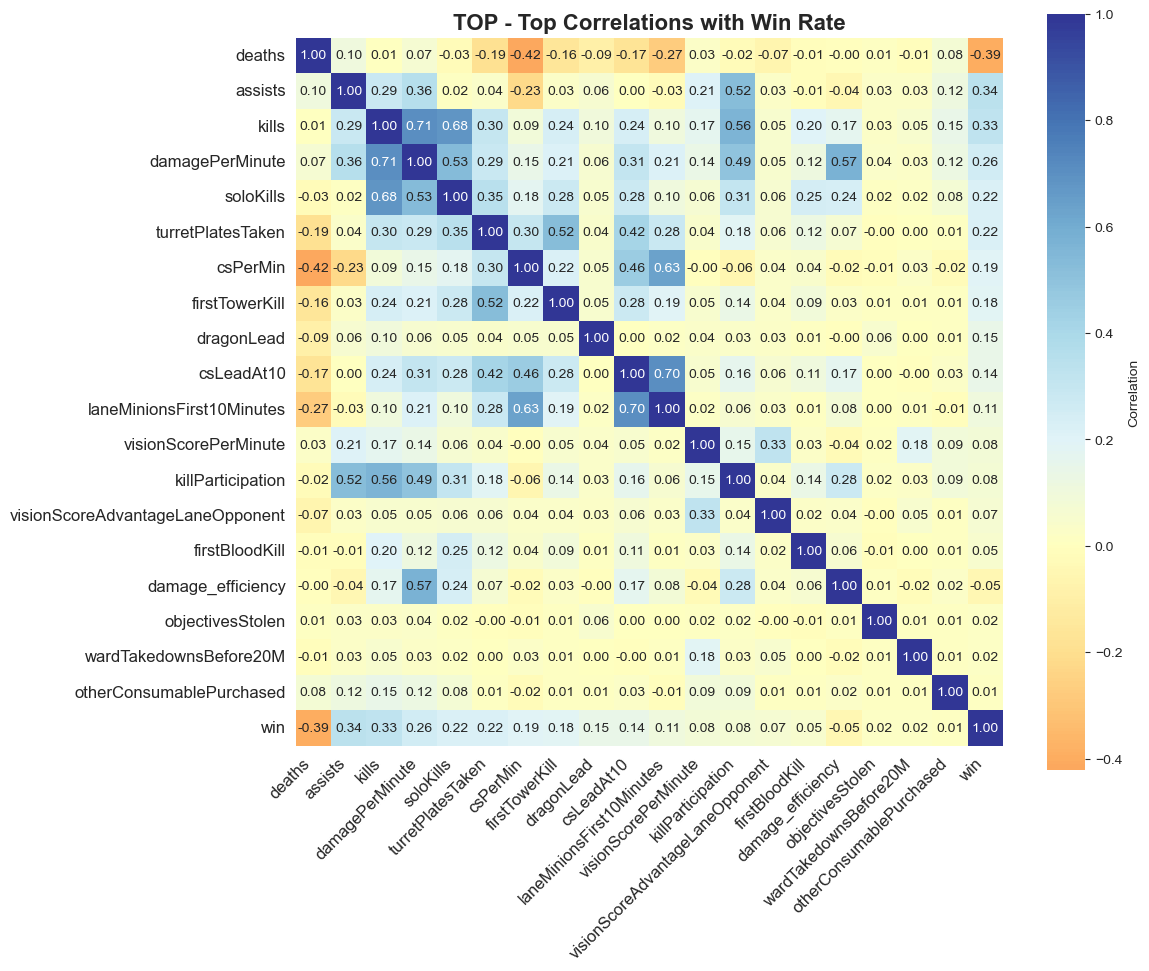

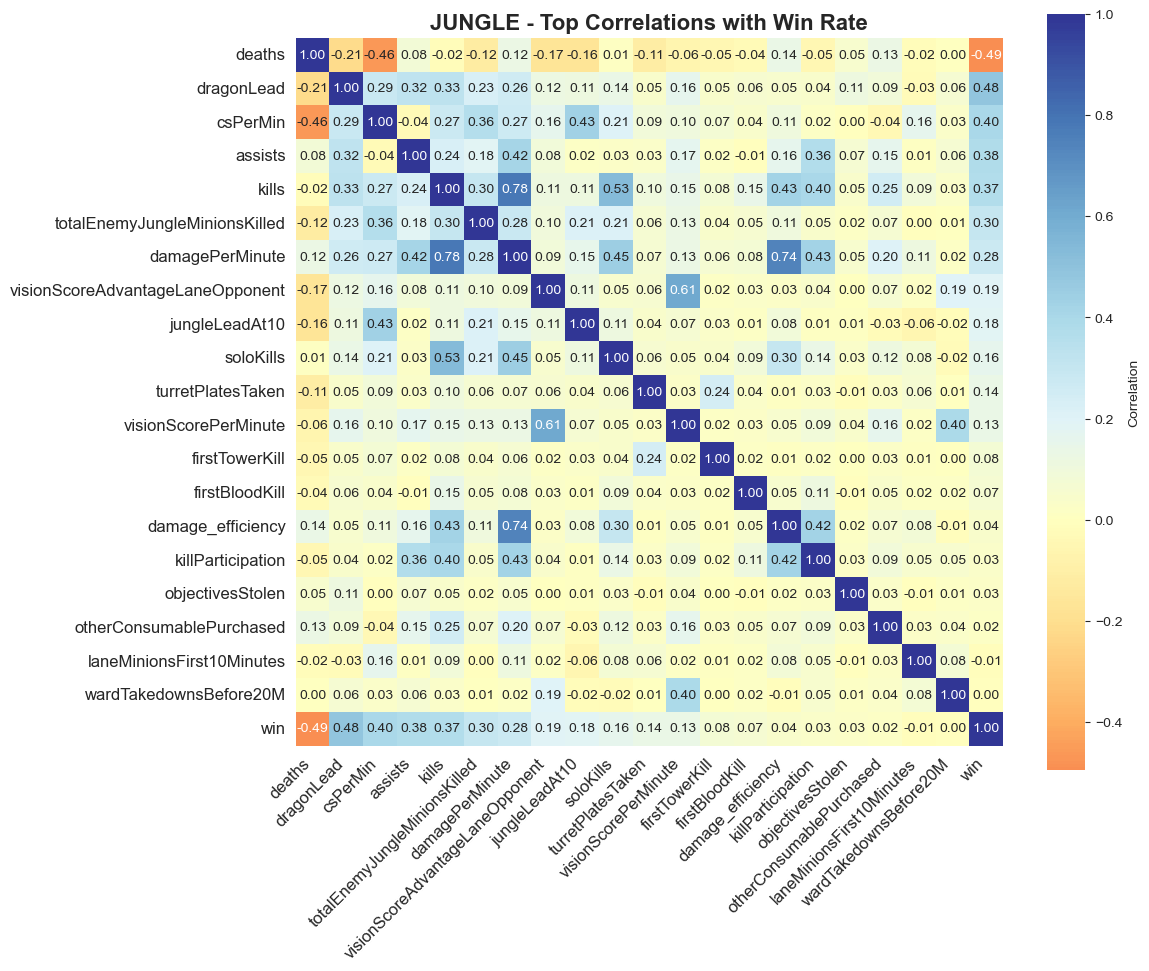

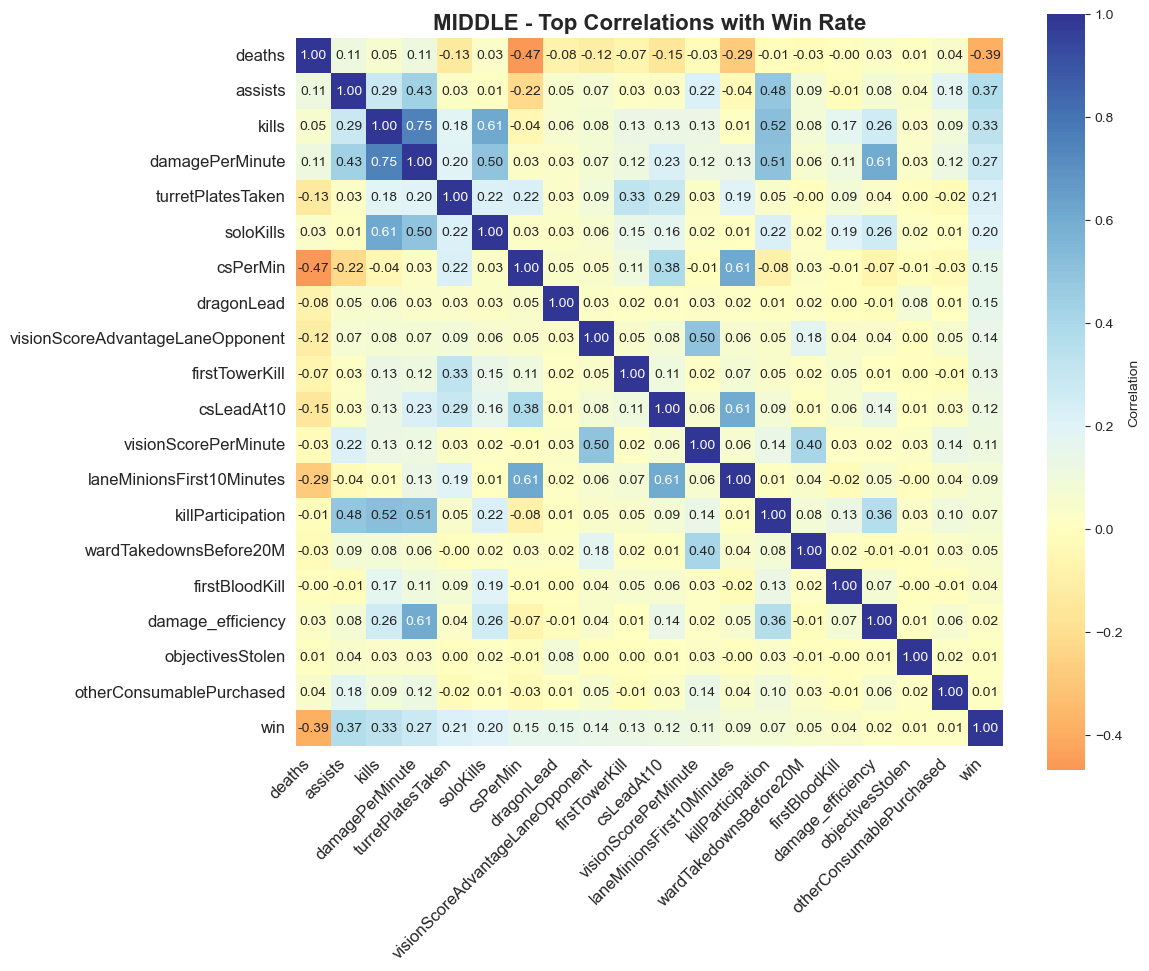

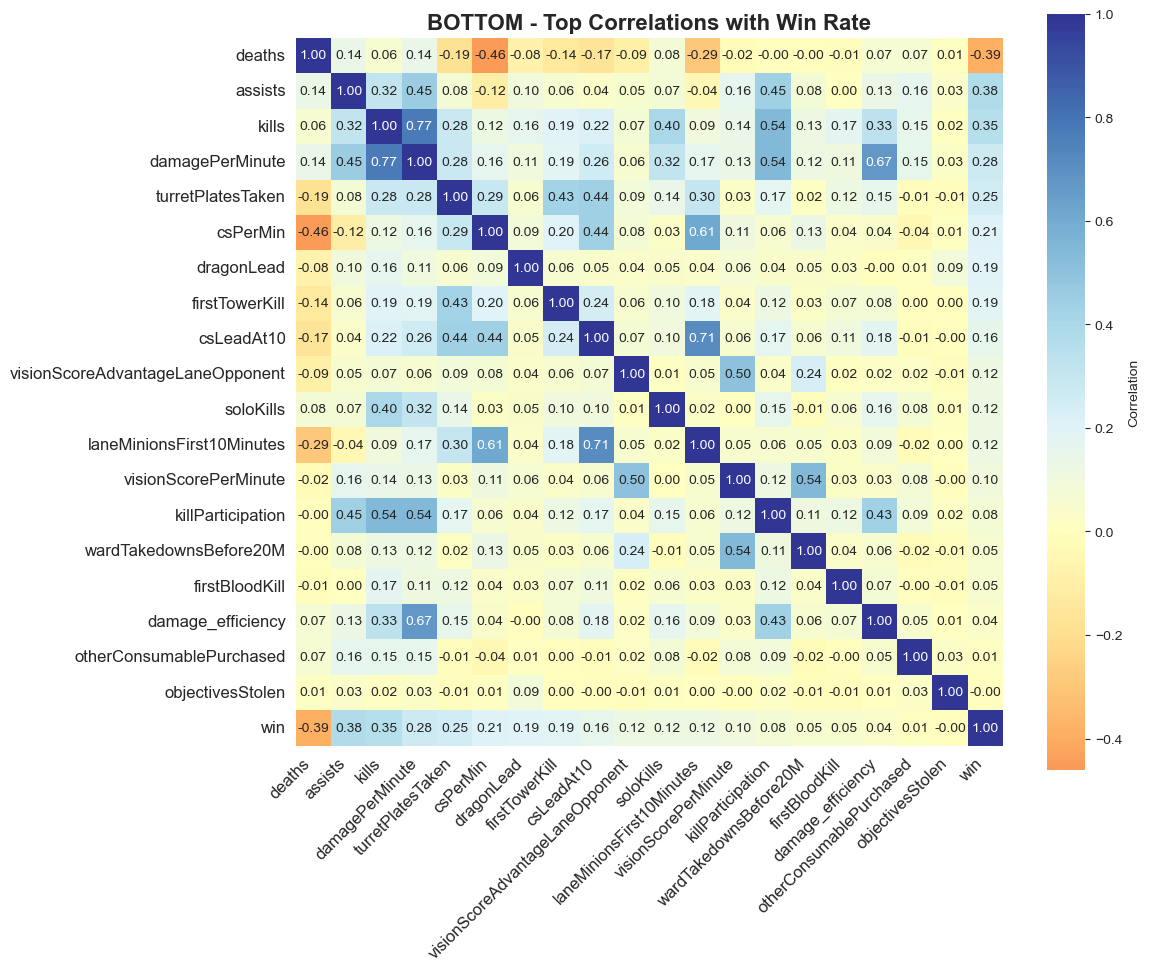

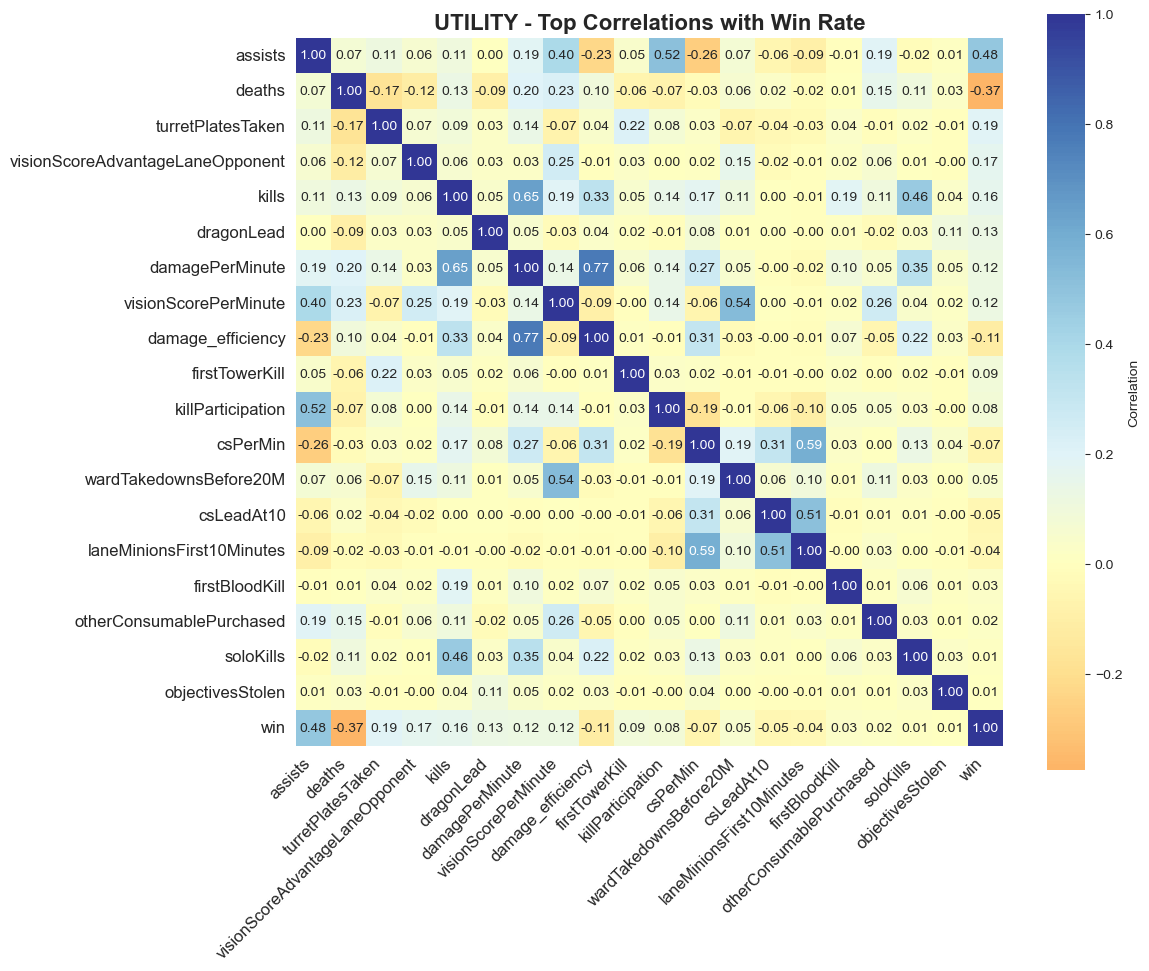

In [488]:
# Define role-specific columns to remove
columns_to_remove = {
    'JUNGLE': [
        'csLeadAt10',
        'maxCsAdvantageOnLaneOpponent', 
        'totalMinionsKilled',
        'laneMinionFirst10Minutes'
    ],
    'NON_JUNGLE': [  # For TOP, MIDDLE, BOTTOM, UTILITY
        'jungleLeadAt10',
        'totalEnemyJungleMinionsKilled',
        'neutralMinionsKilled', 
        'jungleCsBefore10Minutes'
    ]
}

# Remove role-specific columns
for role in roles:
    if role == 'JUNGLE':
        columns_to_drop = columns_to_remove['JUNGLE']
    else:
        columns_to_drop = columns_to_remove['NON_JUNGLE']
    
    # Remove columns that exist in the dataset
    existing_columns = [col for col in columns_to_drop if col in role_datasets[role].columns]
    if existing_columns:
        role_datasets[role] = role_datasets[role].drop(columns=existing_columns, axis=1)
        print(f"Removed from {role}: {existing_columns}")

# Verify the changes
print(f"\nVerification - Columns in each role dataset:")
for role in roles:
    print(f"{role}: {len(role_datasets[role].columns)} columns")
    
    # Check for any remaining role-specific columns
    all_role_columns = columns_to_remove['JUNGLE'] + columns_to_remove['NON_JUNGLE']
    remaining_columns = [col for col in all_role_columns if col in role_datasets[role].columns]
    if remaining_columns:
        print(f"  - {role} still has: {remaining_columns}")

print()

# Define columns to exclude for correlation analysis (same as before)
exclude_columns = [
    'matchId', 'gameDuration', 'teamId', 'participantId', 'championName', 'teamPosition', 'totalMinionsKilled', 'neutralMinionsKilled', 'goldEarned',
    'goldSpent', 'damageDealtToObjectives', 'visionScore', 'totalDamageDealtToChampions', 'combinedMinionsKilled', 'totalDamageTaken',
    'consumablesPurchased', 'champExperience', 'dragonKills', 'turretTakedowns', 'assistMePings', 'enemyMissingPings', 'controlWardInInventory',
    'firstTurretKilledTime', 'KDA', 'win_probability', 'wardsPlaced', 'damagePerGold', 'expPerMin', 'objectiveDamagePerMin', 'itemsPurchased',
    'stealthWardsPlaced', 'turretKills', 'maxLevelLeadLaneOpponent', 'damageSelfMitigated', 'wardsKilled', 'controlWardsPlaced', 'damage_share',
    'damage_share_adjusted', 'maxCsAdvantageOnLaneOpponent', 'gold_share', 'teamGold', 'teamDamage', 'totalAllyJungleMinionsKilled'
]

# Create modeling_results_df by excluding columns in exclude_columns
modeling_results_df = modeling_df.drop(columns=exclude_columns, errors='ignore')

# Verify the final structure
print(f"\nFinal modeling_results_df columns ({len(modeling_results_df.columns)} total):")
for i, col in enumerate(modeling_results_df.columns):
    print(f"{i+1:2d}. {col}")


# Create correlation matrices for each role
role_correlations = {}

for role in roles:
    print(f"\n{'='*60}")
    print(f"Processing {role} role")
    print(f"{'='*60}")
    
    # Get role data
    role_data = role_datasets[role]
    
    # Get columns to include (all columns except excluded ones)
    include_columns = [col for col in role_data.columns if col not in exclude_columns]
    
    print(f"Role: {role}")
    print(f"Dataset shape: {role_data.shape}")
    print(f"Columns for correlation: {len(include_columns)}")
    
    # Create correlation matrix
    role_corr_matrix = role_data[include_columns].corr()
    role_correlations[role] = role_corr_matrix
    
    # Show top correlations with win rate
    win_correlations = role_corr_matrix['win'].drop('win').sort_values(key=abs, ascending=False)
    
    print(f"\nTop 10 Correlations with Win Rate for {role}:")
    for i, (col, corr) in enumerate(win_correlations.head(10).items()):
        print(f"{i+1:2d}. {col}: {corr:.4f}")
    
    # Show strongest correlations overall
    print(f"\nTop 10 Strongest Correlations Overall for {role}:")
    correlations = []
    for i in range(len(role_corr_matrix.columns)):
        for j in range(i+1, len(role_corr_matrix.columns)):
            col1 = role_corr_matrix.columns[i]
            col2 = role_corr_matrix.columns[j]
            corr_value = role_corr_matrix.iloc[i, j]
            correlations.append((col1, col2, corr_value))
    
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    for i, (col1, col2, corr) in enumerate(correlations[:10]):
        print(f"{i+1:2d}. {col1} ↔ {col2}: {corr:.4f}")

# # Create heatmaps for each role
# fig, axes = plt.subplots(2, 3, figsize=(20, 12))
# axes = axes.flatten()

# Create individual large heatmaps for each role
for role in roles:
    plt.figure(figsize=(12, 10))  # Large individual figure
    
    role_corr_matrix = role_correlations[role]
    
    # Get top correlations with win rate for visualization
    win_correlations = role_corr_matrix['win'].drop('win').sort_values(key=abs, ascending=False)
    top_win_corr = win_correlations.head(10)
    top_win_corr_reversed = win_correlations.tail(10)
    
    # Combine top positive and negative correlations with win
    top_corr_cols = list(top_win_corr.index) + list(top_win_corr_reversed.index) + ['win']
    top_corr_cols = list(dict.fromkeys(top_corr_cols))
    
    # Create subset for visualization
    subset_corr = role_corr_matrix.loc[top_corr_cols, top_corr_cols]
    
    # Create heatmap
    sns.heatmap(subset_corr, 
                annot=True, 
                cmap='RdYlBu', 
                center=0, 
                fmt='.2f',
                square=True,
                cbar_kws={'label': 'Correlation'})
    
    plt.title(f'{role} - Top Correlations with Win Rate', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()

# Save correlation matrices to CSV files
# for role in roles:
#     filename = f'correlation_matrix_{role.lower()}.csv'
#     role_correlations[role].to_csv(filename)
#     print(f"Saved {role} correlation matrix to {filename}")

# print(f"\nAll correlation matrices have been created and saved!")

In [398]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import xgboost as xgb

# Then run your model training code
role_models = {}
role_results = {}

for role in roles:
    print(f"\n{'='*50}")
    print(f"Training XGBoost for {role}")
    print(f"{'='*50}")
    
    # Get role-specific data
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    # Prepare data
    X = role_data[features]
    y = role_data['win'].astype(int)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train model
    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric='auc'
    )
    
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Evaluate
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    role_models[role] = model
    role_results[role] = {
        'auc': auc,
        'accuracy': accuracy,
        'features': features,
        'feature_importance': model.feature_importances_
    }
    
    print(f"Results for {role}:")
    print(f"  AUC: {auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Features used: {len(features)}")
    
    # Show top 10 feature importance
    importance_df = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features for {role}:")
    print(importance_df.head(10))


Training XGBoost for TOP
Results for TOP:
  AUC: 0.9407
  Accuracy: 0.8582
  Features used: 23

Top 10 Most Important Features for TOP:
                          feature  importance
1                          deaths    0.216181
2                         assists    0.150113
0                           kills    0.116241
13  totalEnemyJungleMinionsKilled    0.085206
20              killParticipation    0.062465
18                     dragonLead    0.040515
5                  firstTowerKill    0.038892
11           neutralMinionsKilled    0.037798
6               turretPlatesTaken    0.029547
3                       soloKills    0.027712

Training XGBoost for JUNGLE
Results for JUNGLE:
  AUC: 0.9691
  Accuracy: 0.9024
  Features used: 23

Top 10 Most Important Features for JUNGLE:
                          feature  importance
1                          deaths    0.258982
18                     dragonLead    0.199549
2                         assists    0.137084
0                          

In [472]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import xgboost as xgb

# Then run your model training code
role_models = {}
role_results = {}

for role in roles:
    print(f"\n{'='*50}")
    print(f"Training XGBoost for {role}")
    print(f"{'='*50}")
    
    # Get role-specific data
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    # Prepare data
    X = role_data[features]
    y = role_data['win'].astype(int)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train model
    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric='auc'
    )
    
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Evaluate
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    role_models[role] = model
    role_results[role] = {
        'auc': auc,
        'accuracy': accuracy,
        'features': features,
        'feature_importance': model.feature_importances_
    }
    
    print(f"Results for {role}:")
    print(f"  AUC: {auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Features used: {len(features)}")
    
    # Show top 10 feature importance
    importance_df = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features for {role}:")
    print(importance_df.head(10))


Training XGBoost for TOP
Results for TOP:
  AUC: 0.9393
  Accuracy: 0.8576
  Features used: 20

Top 10 Most Important Features for TOP:
              feature  importance
1              deaths    0.270279
2             assists    0.169426
0               kills    0.133994
17  killParticipation    0.077968
5      firstTowerKill    0.054078
15         dragonLead    0.049480
6   turretPlatesTaken    0.034530
3           soloKills    0.034413
7     damagePerMinute    0.021930
4      firstBloodKill    0.019095

Training XGBoost for JUNGLE
Results for JUNGLE:
  AUC: 0.9683
  Accuracy: 0.9029
  Features used: 22

Top 10 Most Important Features for JUNGLE:
                          feature  importance
1                          deaths    0.255101
17                     dragonLead    0.220842
2                         assists    0.126976
0                           kills    0.074993
19              killParticipation    0.042122
13  totalEnemyJungleMinionsKilled    0.038212
18                   

In [489]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import xgboost as xgb

# Then run your model training code
role_models = {}
role_results = {}

for role in roles:
    print(f"\n{'='*50}")
    print(f"Training XGBoost for {role}")
    print(f"{'='*50}")
    
    # Get role-specific data
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    # Prepare data
    X = role_data[features]
    y = role_data['win'].astype(int)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train model
    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric='auc'
    )
    
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Evaluate
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    role_models[role] = model
    role_results[role] = {
        'auc': auc,
        'accuracy': accuracy,
        'features': features,
        'feature_importance': model.feature_importances_
    }
    
    print(f"Results for {role}:")
    print(f"  AUC: {auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Features used: {len(features)}")
    
    # Show top 10 feature importance
    importance_df = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features for {role}:")
    print(importance_df.head(10))


Training XGBoost for TOP
Results for TOP:
  AUC: 0.9400
  Accuracy: 0.8589
  Features used: 19

Top 10 Most Important Features for TOP:
                     feature  importance
1                     deaths    0.274513
2                    assists    0.159551
0                      kills    0.133083
15         killParticipation    0.075714
5             firstTowerKill    0.067627
13                dragonLead    0.055871
6          turretPlatesTaken    0.034346
3                  soloKills    0.032413
7            damagePerMinute    0.021810
16  otherConsumablePurchased    0.021740

Training XGBoost for JUNGLE
Results for JUNGLE:
  AUC: 0.9656
  Accuracy: 0.8996
  Features used: 21

Top 10 Most Important Features for JUNGLE:
                          feature  importance
15                     dragonLead    0.271134
1                          deaths    0.230675
2                         assists    0.132037
0                           kills    0.082008
17              killParticipation   

In [426]:
# Add win probability predictions for each role
for role in roles:
    print(f"Adding win probabilities for {role}...")
    
    # Get role-specific data
    role_data = role_datasets[role]
    features = role_models[role].feature_names_in_  # Get the features used by the model
    
    # Get predictions for all players in this role
    X_role = role_data[features]
    win_probs = role_models[role].predict_proba(X_role)[:, 1]
    
    # Add predictions to the role dataset
    role_datasets[role]['win_probability'] = win_probs
    
    # Add to the main modeling_df for players in this role
    role_indices = modeling_df[modeling_df['teamPosition'] == role].index
    modeling_df.loc[role_indices, 'win_probability'] = win_probs

# Display statistics for the new column
print("\nWin Probability Statistics:")
print(modeling_df['win_probability'].describe().round(3))
print()

# Show win probability by role
print("Average Win Probability by Role:")
win_prob_by_role = modeling_df.groupby('teamPosition')['win_probability'].agg(['mean', 'std', 'count']).round(3)
win_prob_by_role.columns = ['Mean_WinProb', 'Std_WinProb', 'Games']
print(win_prob_by_role)

# Show correlation between predicted probability and actual win
actual_vs_predicted_corr = modeling_df['win_probability'].corr(modeling_df['win'].astype(int))
print(f"\nCorrelation between Predicted Probability and Actual Win: {actual_vs_predicted_corr:.4f}")

# Show some examples
print(f"\nSample of players with high predicted win probability:")
high_prob_players = modeling_df.nlargest(10, 'win_probability')[['teamPosition', 'championName', 'win_probability', 'win']]
print(high_prob_players.round(3))

print(f"\nSample of players with low predicted win probability:")
low_prob_players = modeling_df.nsmallest(10, 'win_probability')[['teamPosition', 'championName', 'win_probability', 'win']]
print(low_prob_players.round(3))

# Show win rate by probability ranges
print(f"\nActual Win Rate by Predicted Probability Ranges:")
prob_bins = pd.cut(modeling_df['win_probability'], bins=[0, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0], labels=['0-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70%+'])
prob_win_rates = modeling_df.groupby(prob_bins, observed=False)['win'].agg(['mean', 'count']).round(3)
prob_win_rates.columns = ['Actual_Win_Rate', 'Games']
prob_win_rates = prob_win_rates[prob_win_rates['Games'] >= 50]  # Only show ranges with at least 50 games
print(prob_win_rates)

# Check model calibration
print(f"\nModel Calibration Check:")
print("If the model is well-calibrated, predicted probabilities should match actual win rates")
for i, (prob_range, row) in enumerate(prob_win_rates.iterrows()):
    if i < len(prob_win_rates):
        predicted_prob = (prob_range.left + prob_range.right) / 2 if hasattr(prob_range, 'left') else 0.5
        actual_rate = row['Actual_Win_Rate']
        print(f"Predicted {predicted_prob:.1%} → Actual {actual_rate:.1%} (Diff: {abs(predicted_prob - actual_rate):.1%})")

print(f"\nWin probability column 'win_probability' has been added to modeling_df.")
print(f"modeling_df now has {modeling_df.shape[1]} columns.")

# NOW COPY TO modeling_results_df AND DROP FROM modeling_df
print(f"\n{'='*60}")
print("COPYING win_probability TO modeling_results_df AND DROPPING FROM modeling_df")
print(f"{'='*60}")

# Copy win_probability to modeling_results_df
modeling_results_df['win_probability'] = modeling_df['win_probability']
print(f"✓ Copied win_probability to modeling_results_df")
print(f"  modeling_results_df shape: {modeling_results_df.shape}")

# Drop win_probability from modeling_df
modeling_df = modeling_df.drop(columns=['win_probability'])
print(f"✓ Dropped win_probability from modeling_df")
print(f"  modeling_df shape: {modeling_df.shape}")

# Verify the changes
print(f"\nVerification:")
print(f"  win_probability in modeling_df: {'win_probability' in modeling_df.columns}")
print(f"  win_probability in modeling_results_df: {'win_probability' in modeling_results_df.columns}")

# Show final column counts
print(f"\nFinal DataFrame shapes:")
print(f"  modeling_df: {modeling_df.shape}")
print(f"  modeling_results_df: {modeling_results_df.shape}")

# Display statistics for the copied column in modeling_results_df
print(f"\nWin Probability Statistics in modeling_results_df:")
print(modeling_results_df['win_probability'].describe().round(3))

Adding win probabilities for TOP...
Adding win probabilities for JUNGLE...
Adding win probabilities for MIDDLE...
Adding win probabilities for BOTTOM...
Adding win probabilities for UTILITY...

Win Probability Statistics:
count    155690.000
mean          0.500
std           0.395
min           0.000
25%           0.055
50%           0.542
75%           0.914
max           0.999
Name: win_probability, dtype: float64

Average Win Probability by Role:
              Mean_WinProb  Std_WinProb  Games
teamPosition                                  
BOTTOM               0.501        0.393  31138
JUNGLE               0.501        0.418  31138
MIDDLE               0.501        0.388  31138
TOP                  0.501        0.380  31138
UTILITY              0.498        0.394  31138

Correlation between Predicted Probability and Actual Win: 0.8493

Sample of players with high predicted win probability:
       teamPosition championName  win_probability   win
42354       UTILITY          Lux       

In [490]:
# Add win probability predictions for each role
for role in roles:
    print(f"Adding win probabilities for {role}...")
    
    # Get role-specific data
    role_data = role_datasets[role]
    features = role_models[role].feature_names_in_  # Get the features used by the model
    
    # Get predictions for all players in this role
    X_role = role_data[features]
    win_probs = role_models[role].predict_proba(X_role)[:, 1]
    
    # Add predictions to the role dataset
    role_datasets[role]['win_probability'] = win_probs
    
    # Add to the main modeling_df for players in this role
    role_indices = modeling_df[modeling_df['teamPosition'] == role].index
    modeling_df.loc[role_indices, 'win_probability'] = win_probs

# Display statistics for the new column
print("\nWin Probability Statistics:")
print(modeling_df['win_probability'].describe().round(3))
print()

# Show win probability by role
print("Average Win Probability by Role:")
win_prob_by_role = modeling_df.groupby('teamPosition')['win_probability'].agg(['mean', 'std', 'count']).round(3)
win_prob_by_role.columns = ['Mean_WinProb', 'Std_WinProb', 'Games']
print(win_prob_by_role)

# Show correlation between predicted probability and actual win
actual_vs_predicted_corr = modeling_df['win_probability'].corr(modeling_df['win'].astype(int))
print(f"\nCorrelation between Predicted Probability and Actual Win: {actual_vs_predicted_corr:.4f}")

# Show some examples
print(f"\nSample of players with high predicted win probability:")
high_prob_players = modeling_df.nlargest(10, 'win_probability')[['teamPosition', 'championName', 'win_probability', 'win']]
print(high_prob_players.round(3))

print(f"\nSample of players with low predicted win probability:")
low_prob_players = modeling_df.nsmallest(10, 'win_probability')[['teamPosition', 'championName', 'win_probability', 'win']]
print(low_prob_players.round(3))

# Show win rate by probability ranges
print(f"\nActual Win Rate by Predicted Probability Ranges:")
prob_bins = pd.cut(modeling_df['win_probability'], bins=[0, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0], labels=['0-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70%+'])
prob_win_rates = modeling_df.groupby(prob_bins, observed=False)['win'].agg(['mean', 'count']).round(3)
prob_win_rates.columns = ['Actual_Win_Rate', 'Games']
prob_win_rates = prob_win_rates[prob_win_rates['Games'] >= 50]  # Only show ranges with at least 50 games
print(prob_win_rates)

# Check model calibration
print(f"\nModel Calibration Check:")
print("If the model is well-calibrated, predicted probabilities should match actual win rates")
for i, (prob_range, row) in enumerate(prob_win_rates.iterrows()):
    if i < len(prob_win_rates):
        predicted_prob = (prob_range.left + prob_range.right) / 2 if hasattr(prob_range, 'left') else 0.5
        actual_rate = row['Actual_Win_Rate']
        print(f"Predicted {predicted_prob:.1%} → Actual {actual_rate:.1%} (Diff: {abs(predicted_prob - actual_rate):.1%})")

print(f"\nWin probability column 'win_probability' has been added to modeling_df.")
print(f"modeling_df now has {modeling_df.shape[1]} columns.")

# NOW COPY TO modeling_results_df AND DROP FROM modeling_df
print(f"\n{'='*60}")
print("COPYING win_probability TO modeling_results_df AND DROPPING FROM modeling_df")
print(f"{'='*60}")

# Copy win_probability to modeling_results_df
modeling_results_df['win_probability'] = modeling_df['win_probability']
print(f"✓ Copied win_probability to modeling_results_df")
print(f"  modeling_results_df shape: {modeling_results_df.shape}")

# Drop win_probability from modeling_df
modeling_df = modeling_df.drop(columns=['win_probability'])
print(f"✓ Dropped win_probability from modeling_df")
print(f"  modeling_df shape: {modeling_df.shape}")

# Verify the changes
print(f"\nVerification:")
print(f"  win_probability in modeling_df: {'win_probability' in modeling_df.columns}")
print(f"  win_probability in modeling_results_df: {'win_probability' in modeling_results_df.columns}")

# Show final column counts
print(f"\nFinal DataFrame shapes:")
print(f"  modeling_df: {modeling_df.shape}")
print(f"  modeling_results_df: {modeling_results_df.shape}")

# Display statistics for the copied column in modeling_results_df
print(f"\nWin Probability Statistics in modeling_results_df:")
print(modeling_results_df['win_probability'].describe().round(3))

Adding win probabilities for TOP...
Adding win probabilities for JUNGLE...
Adding win probabilities for MIDDLE...
Adding win probabilities for BOTTOM...
Adding win probabilities for UTILITY...

Win Probability Statistics:
count    155690.000
mean          0.500
std           0.384
min           0.000
25%           0.069
50%           0.543
75%           0.899
max           0.999
Name: win_probability, dtype: float64

Average Win Probability by Role:
              Mean_WinProb  Std_WinProb  Games
teamPosition                                  
BOTTOM               0.501        0.382  31138
JUNGLE               0.500        0.409  31138
MIDDLE               0.501        0.376  31138
TOP                  0.501        0.368  31138
UTILITY              0.500        0.384  31138

Correlation between Predicted Probability and Actual Win: 0.8271

Sample of players with high predicted win probability:
       teamPosition championName  win_probability   win
117772       MIDDLE      Leblanc       

In [491]:
# Check model calibration
print(f"\nModel Calibration Check:")
print("If the model is well-calibrated, predicted probabilities should match actual win rates")

# Calculate actual average predictions in each bin
bin_analysis = modeling_results_df.groupby(prob_bins, observed=False).agg({
    'win_probability': ['mean', 'count'],  # Average predicted probability and count
    'win': 'mean'                          # Actual win rate
}).round(4)

# Flatten the column names
bin_analysis.columns = ['_'.join(col).strip() for col in bin_analysis.columns.values]

# Rename columns for clarity
bin_analysis = bin_analysis.rename(columns={
    'win_probability_mean': 'Avg_Predicted_Prob',
    'win_probability_count': 'Player_Count', 
    'win_mean': 'Actual_Win_Rate'
})

for bin_name, row in bin_analysis.iterrows():
    predicted_prob = row['Avg_Predicted_Prob']
    actual_rate = row['Actual_Win_Rate']
    player_count = row['Player_Count']
    
    if player_count >= 10:  # Only show bins with enough players
        diff = abs(predicted_prob - actual_rate)
        print(f"Bin {bin_name}: Predicted {predicted_prob:.1%} → Actual {actual_rate:.1%} (Diff: {diff:.1%}, Players: {player_count})")


Model Calibration Check:
If the model is well-calibrated, predicted probabilities should match actual win rates
Bin 0-30%: Predicted 7.6% → Actual 4.2% (Diff: 3.4%, Players: 62570.0)
Bin 30-40%: Predicted 35.0% → Actual 28.6% (Diff: 6.4%, Players: 6396.0)
Bin 40-50%: Predicted 45.0% → Actual 42.5% (Diff: 2.5%, Players: 6093.0)
Bin 50-60%: Predicted 55.1% → Actual 56.1% (Diff: 1.0%, Players: 6745.0)
Bin 60-70%: Predicted 65.2% → Actual 69.0% (Diff: 3.8%, Players: 7973.0)
Bin 70%+: Predicted 89.9% → Actual 93.3% (Diff: 3.4%, Players: 65913.0)


In [457]:
# Check model calibration
print(f"\nModel Calibration Check:")
print("If the model is well-calibrated, predicted probabilities should match actual win rates")

# Calculate actual average predictions in each bin
bin_analysis = modeling_results_df.groupby(prob_bins, observed=False).agg({
    'win_probability': ['mean', 'count'],  # Average predicted probability and count
    'win': 'mean'                          # Actual win rate
}).round(4)

# Flatten the column names
bin_analysis.columns = ['_'.join(col).strip() for col in bin_analysis.columns.values]

# Rename columns for clarity
bin_analysis = bin_analysis.rename(columns={
    'win_probability_mean': 'Avg_Predicted_Prob',
    'win_probability_count': 'Player_Count', 
    'win_mean': 'Actual_Win_Rate'
})

for bin_name, row in bin_analysis.iterrows():
    predicted_prob = row['Avg_Predicted_Prob']
    actual_rate = row['Actual_Win_Rate']
    player_count = row['Player_Count']
    
    if player_count >= 10:  # Only show bins with enough players
        diff = abs(predicted_prob - actual_rate)
        print(f"Bin {bin_name}: Predicted {predicted_prob:.1%} → Actual {actual_rate:.1%} (Diff: {diff:.1%}, Players: {player_count})")


Model Calibration Check:
If the model is well-calibrated, predicted probabilities should match actual win rates
Bin 0-30%: Predicted 7.6% → Actual 4.2% (Diff: 3.3%, Players: 62660.0)
Bin 30-40%: Predicted 35.0% → Actual 28.8% (Diff: 6.1%, Players: 6346.0)
Bin 40-50%: Predicted 45.1% → Actual 42.7% (Diff: 2.4%, Players: 6131.0)
Bin 50-60%: Predicted 55.2% → Actual 55.9% (Diff: 0.7%, Players: 6754.0)
Bin 60-70%: Predicted 65.2% → Actual 68.3% (Diff: 3.1%, Players: 7786.0)
Bin 70%+: Predicted 90.0% → Actual 93.4% (Diff: 3.4%, Players: 66013.0)


In [492]:
modeling_results_df.head(10)

win  kills  deaths  assists  soloKills  firstBloodKill  firstTowerKill  turretPlatesTaken  damagePerMinute  visionScorePerMinute  wardTakedownsBefore20M  visionScoreAdvantageLaneOpponent  \
0  False      3       7        3          1               0               0                  1       502.340929              0.435813                       0                         -0.512532   
1  False      2       8        6          1               0               0                  0       379.722060              0.619423                       1                         -0.503849   
2  False      1       8        4          1               0               0                  3       641.527136              0.354309                       0                         -0.438275   
3  False      9       9        2          0               0               0                  1       670.580127              0.772733                       4                          0.488423   
4  False      1       4       10          0               0               0                  1       372.453868              1.917949                       3                         -0.138440   
5   True      8       5        1          4               1               1                  3      1049.896140              0.894032                       2                          1.051415   
6   True      6       2       18          0               0               0                  0       785.853019              1.248457                       4                          1.015517   
7   True      7       0       18          0               0               0                  0       450.759942              0.630753                       1                          0.780232   
8   True     12       4       10          0               0               0                  2      1219.236895              0.519162                       1                         -0.328148   
9   True      3       5       12          0               0               0                  0       416.268069              2.226136                      10                          0.160686   

   totalEnemyJungleMinionsKilled  laneMinionsFirst10Minutes  jungleCsBefore10Minutes  objectivesStolen  dragonLead  csPerMin  killParticipation  otherConsumablePurchased  csLeadAt10  jungleLeadAt10  \
0                              0                         60                      0.0                 0           0  5.688073           0.375000                         1         -13             0.0   
1                              6                          4                     62.0                 1           0  5.944954           0.500000                         2           1             6.0   
2                              0                         83                      0.0                 0           0  9.064220           0.312500                         2           7             0.0   
3                              0                         57                      0.0                 0           0  6.715596           0.687500                         1           2             0.0   
4                              0                         20                      0.0                 0           0  1.431193           0.687500                         2          -1             0.0   
5                              0                         73                      0.0                 0           0  8.146789           0.250000                         1          13             0.0   
6                             24                          3                     56.0                 0           4  6.642202           0.666667                         1          -1            -6.0   
7                              0                         76                      0.0                 0           0  6.642202           0.694444                         2          -7             0.0   
8                              0                  

In [408]:
modeling_df.head(10)

matchId  gameDuration  teamId    win  participantId championName teamPosition  champExperience  kills  deaths  assists  soloKills  firstBloodKill  consumablesPurchased  \
0  NA1_5310002423          1635     100  False              1     Renekton          TOP            12990      3       7        3          1               0                     1   
1  NA1_5310002423          1635     100  False              2       LeeSin       JUNGLE            11416      2       8        6          1               0                     6   
2  NA1_5310002423          1635     100  False              3         Hwei       MIDDLE            14658      1       8        4          1               0                     2   
3  NA1_5310002423          1635     100  False              4      Kalista       BOTTOM            10990      9       9        2          0               0                     1   
4  NA1_5310002423          1635     100  False              5       Thresh      UTILITY            10000      1       4       10          0               0                     4   
5  NA1_5310002423          1635     200   True              6        Urgot          TOP            15600      8       5        1          4               1                     1   
6  NA1_5310002423          1635     200   True              7        Poppy       JUNGLE            15885      6       2       18          0               0                     7   
7  NA1_5310002423          1635     200   True              8        Karma       MIDDLE            16102      7       0       18          0               0                     2   
8  NA1_5310002423          1635     200   True              9        Corki       BOTTOM            14285     12       4       10          0               0                     1   
9  NA1_5310002423          1635     200   True             10       Maokai      UTILITY             9652      3       5       12          0               0                     4   

   damageDealtToObjectives  damageSelfMitigated  totalDamageTaken  firstTowerKill  turretKills  turretTakedowns  turretPlatesTaken  firstTurretKilledTime  totalDamageDealtToChampions  \
0                      591                31231             37257               0            0                0                  1               0.000000                        13691   
1                    10476                30342             32820               0            0                0                  0               0.000000                        10349   
2                     4702                 9004             15512               0            1                1                  3               0.000000                        17485   
3                     3460                13152             22780               0            1                1                  1               0.000000                        18277   
4                        0                17677             20320               0            0                0                  1               0.000000                        10151   
5                    23130                35685             25218               1            3                4                  3             939.722672                        28616   
6                    39937                44356             29302               0            0                3                  0             939.722672                        21419   
7                     7932                 9018             11526               0            2                4                  0             939.722672                        12286   
8                    33164                15835             13520               0            4                5                  2             939.722672                        33231   
9                     4321                24128             23396               0            0                2                  0             939.722672     

# Model Calibration

In [442]:
# Import required libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Original parameters
params = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42,
    'eval_metric': 'auc'
}

# Then run your model training code
role_models = {}
role_results = {}
role_scalers = {}  # Store scalers for each role

for role in roles:
    print(f"\n{'='*50}")
    print(f"Training XGBoost for {role}")
    print(f"{'='*50}")
    
    # Get role-specific data
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    # Prepare data
    X = role_data[features]
    y = role_data['win'].astype(int)
    
    print(f"Dataset shape: {X.shape}")
    print(f"Win rate: {y.mean():.3f}")
    
    # Split data BEFORE scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Store scaler for later use
    role_scalers[role] = scaler
    
    print(f"Feature scaling applied:")
    print(f"  Training set mean: {X_train_scaled.mean():.3f}")
    print(f"  Training set std: {X_train_scaled.std():.3f}")
    print(f"  Test set mean: {X_test_scaled.mean():.3f}")
    print(f"  Test set std: {X_test_scaled.std():.3f}")
    
    # Train model on scaled data
    model = xgb.XGBClassifier(**params)
    
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on scaled test data
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation on full dataset (scaled)
    X_full_scaled = scaler.transform(X)
    cv_scores = cross_val_score(model, X_full_scaled, y, cv=5, scoring='roc_auc')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Get cross-validation predictions for calibration
    cv_pred_proba = cross_val_predict(model, X_full_scaled, y, cv=5, method='predict_proba')[:, 1]
    
    # Check prediction distribution
    pred_stats = {
        'min': y_pred_proba.min(),
        'max': y_pred_proba.max(),
        'mean': y_pred_proba.mean(),
        'std': y_pred_proba.std(),
        'p10': np.percentile(y_pred_proba, 10),
        'p90': np.percentile(y_pred_proba, 90)
    }
    
    # CV prediction distribution
    cv_pred_stats = {
        'min': cv_pred_proba.min(),
        'max': cv_pred_proba.max(),
        'mean': cv_pred_proba.mean(),
        'std': cv_pred_proba.std(),
        'p10': np.percentile(cv_pred_proba, 10),
        'p90': np.percentile(cv_pred_proba, 90)
    }
    
    # Store results
    role_models[role] = model
    role_results[role] = {
        'auc': auc,
        'accuracy': accuracy,
        'cv_auc_mean': cv_mean,
        'cv_auc_std': cv_std,
        'cv_scores': cv_scores,
        'cv_pred_proba': cv_pred_proba,
        'features': features,
        'feature_importance': model.feature_importances_,
        'prediction_stats': pred_stats,
        'cv_prediction_stats': cv_pred_stats
    }
    
    print(f"Results for {role}:")
    print(f"  Test AUC: {auc:.4f}")
    print(f"  CV AUC: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Features used: {len(features)}")
    print(f"  Test prediction range: {pred_stats['min']:.3f} - {pred_stats['max']:.3f}")
    print(f"  Test prediction mean: {pred_stats['mean']:.3f}")
    print(f"  CV prediction range: {cv_pred_stats['min']:.3f} - {cv_pred_stats['max']:.3f}")
    print(f"  CV prediction mean: {cv_pred_stats['mean']:.3f}")
    print(f"  Test 10th-90th percentile: {pred_stats['p10']:.3f} - {pred_stats['p90']:.3f}")
    print(f"  CV 10th-90th percentile: {cv_pred_stats['p10']:.3f} - {cv_pred_stats['p90']:.3f}")
    
    # Show top 10 feature importance
    importance_df = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features for {role}:")
    print(importance_df.head(10))
    
    # Check for potential overfitting
    train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
    train_auc = roc_auc_score(y_train, train_pred_proba)
    print(f"  Train AUC: {train_auc:.4f}")
    print(f"  Test AUC: {auc:.4f}")
    print(f"  CV AUC: {cv_mean:.4f}")
    print(f"  Train-Test AUC difference: {train_auc - auc:.4f}")
    print(f"  Test-CV AUC difference: {auc - cv_mean:.4f}")
    
    if train_auc - auc > 0.05:
        print("  ⚠️ Warning: Potential overfitting detected!")
    if abs(auc - cv_mean) > 0.05:
        print("  ⚠️ Warning: Test set may not be representative!")

# Print summary of all roles
print(f"\n{'='*60}")
print("SUMMARY OF ALL ROLES")
print(f"{'='*60}")

for role in roles:
    results = role_results[role]
    stats = results['prediction_stats']
    cv_stats = results['cv_prediction_stats']
    print(f"{role}:")
    print(f"  Test AUC: {results['auc']:.4f}")
    print(f"  CV AUC: {results['cv_auc_mean']:.4f} (+/- {results['cv_auc_std'] * 2:.4f})")
    print(f"  Accuracy: {results['accuracy']:.4f}")
    print(f"  Test prediction range: {stats['min']:.3f} - {stats['max']:.3f}")
    print(f"  CV prediction range: {cv_stats['min']:.3f} - {cv_stats['max']:.3f}")
    print(f"  Test prediction mean: {stats['mean']:.3f}")
    print(f"  CV prediction mean: {cv_stats['mean']:.3f}")
    print()


Training XGBoost for TOP
Dataset shape: (31138, 23)
Win rate: 0.500
Feature scaling applied:
  Training set mean: 0.000
  Training set std: 1.000
  Test set mean: 0.001
  Test set std: 0.988


Results for TOP:
  Test AUC: 0.9407
  CV AUC: 0.9367 (+/- 0.0056)
  Accuracy: 0.8595
  Features used: 23
  Test prediction range: 0.001 - 0.999
  Test prediction mean: 0.504
  CV prediction range: 0.001 - 0.998
  CV prediction mean: 0.500
  Test 10th-90th percentile: 0.022 - 0.965
  CV 10th-90th percentile: 0.023 - 0.963

Top 10 Most Important Features for TOP:
                          feature  importance
1                          deaths    0.233399
2                         assists    0.141764
0                           kills    0.115953
13  totalEnemyJungleMinionsKilled    0.089436
20              killParticipation    0.060153
18                     dragonLead    0.050745
11           neutralMinionsKilled    0.043450
5                  firstTowerKill    0.037148
6               turretPlatesTaken    0.030927
3                       soloKills    0.022822
  Train AUC: 0.9564
  Test AUC: 0.9407
  CV AUC: 0.9367
  Train-Test AUC difference: 0.0158
  Test-CV AUC difference: 0.0039

Trai

In [437]:
modeling_results_df.head(10)

win  kills  deaths  assists  soloKills  firstBloodKill  firstTowerKill  turretPlatesTaken  damagePerMinute  visionScorePerMinute  wardTakedownsBefore20M  visionScoreAdvantageLaneOpponent  \
0  False      3       7        3          1               0               0                  1       502.340929              0.435813                       0                         -0.512532   
1  False      2       8        6          1               0               0                  0       379.722060              0.619423                       1                         -0.503849   
2  False      1       8        4          1               0               0                  3       641.527136              0.354309                       0                         -0.438275   
3  False      9       9        2          0               0               0                  1       670.580127              0.772733                       4                          0.488423   
4  False      1       4       10          0               0               0                  1       372.453868              1.917949                       3                         -0.138440   
5   True      8       5        1          4               1               1                  3      1049.896140              0.894032                       2                          1.051415   
6   True      6       2       18          0               0               0                  0       785.853019              1.248457                       4                          1.015517   
7   True      7       0       18          0               0               0                  0       450.759942              0.630753                       1                          0.780232   
8   True     12       4       10          0               0               0                  2      1219.236895              0.519162                       1                         -0.328148   
9   True      3       5       12          0               0               0                  0       416.268069              2.226136                      10                          0.160686   

   neutralMinionsKilled  totalAllyJungleMinionsKilled  totalEnemyJungleMinionsKilled  laneMinionsFirst10Minutes  jungleCsBefore10Minutes  maxCsAdvantageOnLaneOpponent  objectivesStolen  dragonLead  \
0                     0                             0                              0                         60                      0.0                          0.00                 0           0   
1                   138                           105                              6                          4                     62.0                         12.00                 1           0   
2                     0                             0                              0                         83                      0.0                         71.00                 0           0   
3                     4                             2                              0                         57                      0.0                         17.00                 0           0   
4                     0                             0                              0                         20                      0.0                          2.00                 0           0   
5                     0                             0                              0                         73                      0.0                         71.00                 0           0   
6                   171                            94                             24                          3                     56.0                         30.75                 0           4   
7                     0                             0                              0                         76                      0.0                          1.00                 0           0   
8                     0                             0      

In [443]:
# Add win probability predictions for each role
for role in roles:
    print(f"Adding win probabilities for {role}...")
    
    # Get role-specific data
    role_data = role_datasets[role]
    
    # Get features list (not from model.feature_names_in_)
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    # Get predictions for all players in this role
    X_role = role_data[features]
    
    # Scale the data using the stored scaler
    X_role_scaled = role_scalers[role].transform(X_role)
    
    # Get predictions using the scaled data
    win_probs = role_models[role].predict_proba(X_role_scaled)[:, 1]
    
    # Add predictions to the role dataset
    role_datasets[role]['win_probability'] = win_probs
    
    # Add to the main modeling_df for players in this role
    role_indices = modeling_df[modeling_df['teamPosition'] == role].index
    modeling_df.loc[role_indices, 'win_probability'] = win_probs

# Display statistics for the new column
print("\nWin Probability Statistics:")
print(modeling_df['win_probability'].describe().round(3))
print()

# Show win probability by role
print("Average Win Probability by Role:")
win_prob_by_role = modeling_df.groupby('teamPosition')['win_probability'].agg(['mean', 'std', 'count']).round(3)
win_prob_by_role.columns = ['Mean_WinProb', 'Std_WinProb', 'Games']
print(win_prob_by_role)

# Show correlation between predicted probability and actual win
actual_vs_predicted_corr = modeling_df['win_probability'].corr(modeling_df['win'].astype(int))
print(f"\nCorrelation between Predicted Probability and Actual Win: {actual_vs_predicted_corr:.4f}")

# Show some examples
print(f"\nSample of players with high predicted win probability:")
high_prob_players = modeling_df.nlargest(10, 'win_probability')[['teamPosition', 'championName', 'win_probability', 'win']]
print(high_prob_players.round(3))

print(f"\nSample of players with low predicted win probability:")
low_prob_players = modeling_df.nsmallest(10, 'win_probability')[['teamPosition', 'championName', 'win_probability', 'win']]
print(low_prob_players.round(3))

# Show win rate by probability ranges
print(f"\nActual Win Rate by Predicted Probability Ranges:")
prob_bins = pd.cut(modeling_df['win_probability'], bins=[0, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0], labels=['0-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70%+'])
prob_win_rates = modeling_df.groupby(prob_bins, observed=False)['win'].agg(['mean', 'count']).round(3)
prob_win_rates.columns = ['Actual_Win_Rate', 'Games']
prob_win_rates = prob_win_rates[prob_win_rates['Games'] >= 50]  # Only show ranges with at least 50 games
print(prob_win_rates)

# Check model calibration
print(f"\nModel Calibration Check:")
print("If the model is well-calibrated, predicted probabilities should match actual win rates")

# Calculate actual average predictions in each bin
for bin_name in prob_win_rates.index:
    # Get players in this bin
    bin_mask = (prob_bins == bin_name)
    avg_predicted = modeling_df[bin_mask]['win_probability'].mean()
    actual_rate = prob_win_rates.loc[bin_name, 'Actual_Win_Rate']
    player_count = prob_win_rates.loc[bin_name, 'Games']
    
    if player_count >= 10:
        diff = abs(avg_predicted - actual_rate)
        print(f"Bin {bin_name}: Predicted {avg_predicted:.1%} → Actual {actual_rate:.1%} (Diff: {diff:.1%}, Players: {player_count})")

print(f"\nWin probability column 'win_probability' has been added to modeling_df.")
print(f"modeling_df now has {modeling_df.shape[1]} columns.")

Adding win probabilities for TOP...
Adding win probabilities for JUNGLE...
Adding win probabilities for MIDDLE...
Adding win probabilities for BOTTOM...
Adding win probabilities for UTILITY...

Win Probability Statistics:
count    155690.000
mean          0.501
std           0.385
min           0.000
25%           0.068
50%           0.541
75%           0.902
max           0.999
Name: win_probability, dtype: float64

Average Win Probability by Role:
              Mean_WinProb  Std_WinProb  Games
teamPosition                                  
BOTTOM               0.501        0.383  31138
JUNGLE               0.501        0.411  31138
MIDDLE               0.501        0.377  31138
TOP                  0.501        0.370  31138
UTILITY              0.500        0.384  31138

Correlation between Predicted Probability and Actual Win: 0.8315

Sample of players with high predicted win probability:
      teamPosition championName  win_probability   win
42211       JUNGLE       RekSai         

In [441]:
modeling_results_df.head(10)

win  kills  deaths  assists  soloKills  firstBloodKill  firstTowerKill  turretPlatesTaken  damagePerMinute  visionScorePerMinute  wardTakedownsBefore20M  visionScoreAdvantageLaneOpponent  \
0  False      3       7        3          1               0               0                  1       502.340929              0.435813                       0                         -0.512532   
1  False      2       8        6          1               0               0                  0       379.722060              0.619423                       1                         -0.503849   
2  False      1       8        4          1               0               0                  3       641.527136              0.354309                       0                         -0.438275   
3  False      9       9        2          0               0               0                  1       670.580127              0.772733                       4                          0.488423   
4  False      1       4       10          0               0               0                  1       372.453868              1.917949                       3                         -0.138440   
5   True      8       5        1          4               1               1                  3      1049.896140              0.894032                       2                          1.051415   
6   True      6       2       18          0               0               0                  0       785.853019              1.248457                       4                          1.015517   
7   True      7       0       18          0               0               0                  0       450.759942              0.630753                       1                          0.780232   
8   True     12       4       10          0               0               0                  2      1219.236895              0.519162                       1                         -0.328148   
9   True      3       5       12          0               0               0                  0       416.268069              2.226136                      10                          0.160686   

   neutralMinionsKilled  totalAllyJungleMinionsKilled  totalEnemyJungleMinionsKilled  laneMinionsFirst10Minutes  jungleCsBefore10Minutes  maxCsAdvantageOnLaneOpponent  objectivesStolen  dragonLead  \
0                     0                             0                              0                         60                      0.0                          0.00                 0           0   
1                   138                           105                              6                          4                     62.0                         12.00                 1           0   
2                     0                             0                              0                         83                      0.0                         71.00                 0           0   
3                     4                             2                              0                         57                      0.0                         17.00                 0           0   
4                     0                             0                              0                         20                      0.0                          2.00                 0           0   
5                     0                             0                              0                         73                      0.0                         71.00                 0           0   
6                   171                            94                             24                          3                     56.0                         30.75                 0           4   
7                     0                             0                              0                         76                      0.0                          1.00                 0           0   
8                     0                             0      

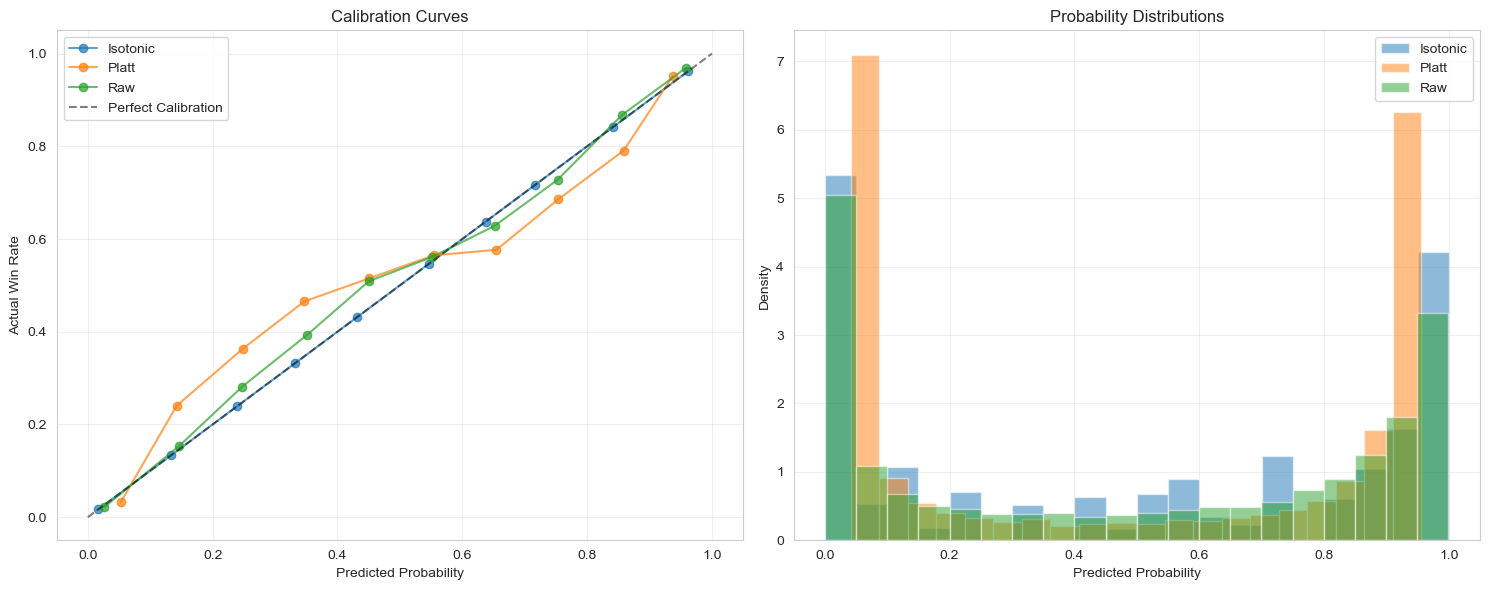

In [431]:
def plot_calibration_curves(calibrated_probs, actual_outcomes):
    """Plot calibration curves for all methods"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Calibration curves
    for method_name, probs in calibrated_probs.items():
        # Create bins
        bins = np.linspace(0, 1, 11)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        # Calculate actual vs predicted rates
        bin_indices = np.digitize(probs, bins) - 1
        bin_indices = np.clip(bin_indices, 0, len(bin_centers) - 1)
        
        actual_rates = []
        predicted_rates = []
        
        for i in range(len(bin_centers)):
            mask = (bin_indices == i)
            if mask.sum() >= 10:  # Only show bins with at least 10 samples
                actual_rate = actual_outcomes[mask].mean()
                predicted_rate = probs[mask].mean()
                actual_rates.append(actual_rate)
                predicted_rates.append(predicted_rate)
        
        ax1.plot(predicted_rates, actual_rates, 'o-', label=method_name, alpha=0.7)
    
    # Perfect calibration line
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect Calibration')
    ax1.set_xlabel('Predicted Probability')
    ax1.set_ylabel('Actual Win Rate')
    ax1.set_title('Calibration Curves')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Probability distributions
    for method_name, probs in calibrated_probs.items():
        ax2.hist(probs, bins=20, alpha=0.5, label=method_name, density=True)
    
    ax2.set_xlabel('Predicted Probability')
    ax2.set_ylabel('Density')
    ax2.set_title('Probability Distributions')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create the plots
plot_calibration_curves(calibrated_probs, y_cal)

In [432]:
from sklearn.linear_model import LogisticRegression

def test_cv_calibration(X, y, model, cv_folds=5):
    """Test calibration using cross-validation"""
    from sklearn.calibration import IsotonicRegression
    from sklearn.model_selection import cross_val_predict

    # Get out-of-sample probabilities using CV
    cv_probs = cross_val_predict(model, X, y, cv=cv_folds, method='predict_proba')[:, 1]

    # Apply different calibrations to CV probabilities
    cv_calibrated = {}

    # Isotonic calibration
    isotonic_cal = IsotonicRegression(out_of_bounds='clip')
    isotonic_cal.fit(cv_probs, y)
    cv_calibrated['CV_Isotonic'] = isotonic_cal.predict(cv_probs)

    # Platt scaling (logistic regression)
    platt_cal = LogisticRegression()
    platt_cal.fit(cv_probs.reshape(-1, 1), y)
    cv_calibrated['CV_Platt'] = platt_cal.predict_proba(cv_probs.reshape(-1, 1))[:, 1]

    # Evaluate CV calibration
    print("Cross-Validation Calibration Results:")
    for method_name, probs in cv_calibrated.items():
        evaluate_calibration(probs, y, method_name)

    return cv_calibrated

# Now you can run:
cv_results = test_cv_calibration(X, y, model)

Cross-Validation Calibration Results:

CV_Isotonic Calibration Results:
  Mean Squared Error: 0.0000
  Mean Absolute Error: 0.0000
  Probability Range: 0.000 - 1.000

CV_Platt Calibration Results:
  Mean Squared Error: 0.0037
  Mean Absolute Error: 0.0511
  Probability Range: 0.036 - 0.958


In [433]:
from sklearn.metrics import roc_auc_score, brier_score_loss

def compare_methods(calibrated_probs, actual_outcomes):
    """Compare different calibration methods"""
    
    comparison = {}
    
    for method_name, probs in calibrated_probs.items():
        auc = roc_auc_score(actual_outcomes, probs)
        brier = brier_score_loss(actual_outcomes, probs)
        
        comparison[method_name] = {
            'AUC': auc,
            'Brier_Score': brier,
            'Prob_Range': f"{probs.min():.3f} - {probs.max():.3f}",
            'Mean_Prob': probs.mean()
        }
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(comparison).T
    print("\nMethod Comparison:")
    print(comparison_df.round(4))
    
    return comparison_df

# Compare all methods
method_comparison = compare_methods(calibrated_probs, y_cal)


Method Comparison:
               AUC Brier_Score     Prob_Range Mean_Prob
Isotonic  0.944015    0.093792  0.000 - 1.000  0.502783
Platt     0.943111    0.097799  0.041 - 0.956  0.502866
Raw       0.943111    0.095008  0.000 - 0.999  0.496947


In [406]:
# Create team-level predictions by aggregating player probabilities
print("Creating team-level predictions...")

# Add calibrated probabilities to the main DataFrame
for role in roles:
    role_indices = modeling_df[modeling_df['teamPosition'] == role].index
    modeling_df.loc[role_indices, 'calibrated_win_probability'] = role_results[role]['probabilities']

# Create team-level aggregation
modeling_df['matchTeamId'] = modeling_df['matchId'] + '_' + modeling_df['teamId'].astype(str)

# Calculate team aggregated probability
team_probabilities = modeling_df.groupby('matchTeamId')['calibrated_win_probability'].agg(['mean', 'sum', 'count']).reset_index()
team_probabilities.columns = ['matchTeamId', 'team_avg_probability', 'team_sum_probability', 'player_count']

# Verify each team has 5 players
print(f"Teams with 5 players: {(team_probabilities['player_count'] == 5).sum()}")
print(f"Teams with != 5 players: {(team_probabilities['player_count'] != 5).sum()}")

# Create match-level comparison
matches = modeling_df['matchId'].unique()
match_predictions = []

for match_id in matches:
    match_teams = team_probabilities[team_probabilities['matchTeamId'].str.startswith(match_id)]
    
    if len(match_teams) == 2:  # Both teams present
        team1 = match_teams.iloc[0]
        team2 = match_teams.iloc[1]
        
        # Determine predicted winner based on higher probability
        if team1['team_avg_probability'] > team2['team_avg_probability']:
            predicted_winner = team1['matchTeamId']
            predicted_loser = team2['matchTeamId']
            prediction_confidence = abs(team1['team_avg_probability'] - team2['team_avg_probability'])
        else:
            predicted_winner = team2['matchTeamId']
            predicted_loser = team1['matchTeamId']
            prediction_confidence = abs(team2['team_avg_probability'] - team1['team_avg_probability'])
        
        # Get actual winner
        team1_actual_win = modeling_df[modeling_df['matchTeamId'] == team1['matchTeamId']]['win'].iloc[0]
        team2_actual_win = modeling_df[modeling_df['matchTeamId'] == team2['matchTeamId']]['win'].iloc[0]
        
        if team1_actual_win:
            actual_winner = team1['matchTeamId']
        else:
            actual_winner = team2['matchTeamId']
        
        match_predictions.append({
            'matchId': match_id,
            'team1_id': team1['matchTeamId'],
            'team2_id': team2['matchTeamId'],
            'team1_avg_prob': team1['team_avg_probability'],
            'team2_avg_prob': team2['team_avg_probability'],
            'team1_sum_prob': team1['team_sum_probability'],
            'team2_sum_prob': team2['team_sum_probability'],
            'predicted_winner': predicted_winner,
            'actual_winner': actual_winner,
            'prediction_correct': predicted_winner == actual_winner,
            'prediction_confidence': prediction_confidence,
            'team1_actual_win': team1_actual_win,
            'team2_actual_win': team2_actual_win
        })

# Convert to DataFrame
match_predictions_df = pd.DataFrame(match_predictions)

# Calculate team-level performance
print(f"\nTeam-Level Prediction Results:")
print(f"Total matches: {len(match_predictions_df)}")
print(f"Correct predictions: {match_predictions_df['prediction_correct'].sum()}")
print(f"Team-level accuracy: {match_predictions_df['prediction_correct'].mean():.4f}")

# Show performance by prediction confidence
print(f"\nTeam-Level Performance by Prediction Confidence:")
confidence_bins = pd.cut(match_predictions_df['prediction_confidence'], 
                        bins=[0, 0.05, 0.1, 0.15, 0.2, 1.0], 
                        labels=['0-5%', '5-10%', '10-15%', '15-20%', '20%+'])

confidence_performance = match_predictions_df.groupby(confidence_bins, observed=False)['prediction_correct'].agg(['mean', 'count']).round(3)
confidence_performance.columns = ['Accuracy', 'Matches']
print(confidence_performance)

# Compare individual vs team-level performance
print(f"Performance Comparison:")
print(f"  Individual player CV accuracy: ~{np.mean([role_results[role]['cv_accuracy'] for role in roles]):.3f}")
print(f"  Team-level accuracy: {match_predictions_df['prediction_correct'].mean():.3f}")

# Show team-level calibration
print(f"\nTeam-Level Calibration:")
team_prob_bins = pd.cut(match_predictions_df['team1_avg_prob'], 
                       bins=[0, 0.4, 0.45, 0.5, 0.55, 0.6, 1.0], 
                       labels=['0-40%', '40-45%', '45-50%', '50-55%', '55-60%', '60%+'])

team_calibration = match_predictions_df.groupby(team_prob_bins, observed=False)['team1_actual_win'].agg(['mean', 'count']).round(3)
team_calibration.columns = ['Actual_Win_Rate', 'Matches']
print(team_calibration)

# Clean up temporary column
modeling_df = modeling_df.drop('matchTeamId', axis=1)

print(f"\nTeam-level prediction analysis complete!")

Creating team-level predictions...


KeyError: 'probabilities'

In [294]:
# Drop the win_probability column
modeling_df = modeling_df.drop('win_probability', axis=1)

# Also drop from role datasets
for role in roles:
    if 'win_probability' in role_datasets[role].columns:
        role_datasets[role] = role_datasets[role].drop('win_probability', axis=1)

print(f"DataFrame shape after dropping win_probability: {modeling_df.shape}")
print(f"Removed win_probability column from main DataFrame and role datasets")

DataFrame shape after dropping win_probability: (155690, 57)
Removed win_probability column from main DataFrame and role datasets


In [295]:
# Check for potential data leakage
print("Checking for potential data leakage...")

# Look for features that might be too predictive
for role in roles:
    print(f"\n{role} - Most Predictive Features:")
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    # Check correlation with win for each feature
    correlations = []
    for feature in features:
        corr = role_data[feature].corr(role_data['win'].astype(int))
        correlations.append((feature, abs(corr)))
    
    # Sort by correlation strength
    correlations.sort(key=lambda x: x[1], reverse=True)
    
    print("Top 10 most correlated features:")
    for i, (feature, corr) in enumerate(correlations[:10]):
        print(f"{i+1}. {feature}: {corr:.4f}")

# Check class balance
print(f"\nClass Balance Check:")
for role in roles:
    role_data = role_datasets[role]
    win_rate = role_data['win'].mean()
    print(f"{role}: {win_rate:.3f} win rate ({len(role_data)} games)")

Checking for potential data leakage...

TOP - Most Predictive Features:
Top 10 most correlated features:
1. expPerMin: 0.5943
2. objectiveDamagePerMin: 0.4724
3. turretKills: 0.4031
4. firstTurretKilledTime: 0.4012
5. maxLevelLeadLaneOpponent: 0.3979
6. deaths: 0.3938
7. assists: 0.3379
8. kills: 0.3263
9. damagePerMinute: 0.2554
10. soloKills: 0.2223

JUNGLE - Most Predictive Features:
Top 10 most correlated features:
1. objectiveDamagePerMin: 0.6761
2. expPerMin: 0.6430
3. maxLevelLeadLaneOpponent: 0.5202
4. deaths: 0.4941
5. dragonLead: 0.4843
6. turretKills: 0.4045
7. firstTurretKilledTime: 0.4012
8. csPerMin: 0.3999
9. assists: 0.3791
10. kills: 0.3652

MIDDLE - Most Predictive Features:
Top 10 most correlated features:
1. expPerMin: 0.5825
2. objectiveDamagePerMin: 0.4754
3. maxLevelLeadLaneOpponent: 0.4157
4. turretKills: 0.4055
5. firstTurretKilledTime: 0.4012
6. deaths: 0.3881
7. assists: 0.3698
8. kills: 0.3332
9. damagePerMinute: 0.2735
10. turretPlatesTaken: 0.2132

BOTTOM 

In [336]:
from scipy.stats import binomtest
# Your main hypothesis test
print("MAIN HYPOTHESIS TEST:")
print("H₀: Model accuracy = 50% (random chance)")
print("H₁: Model accuracy > 50% (better than random)")

# Test statistic
team_accuracy = match_predictions_df['prediction_correct'].mean()
n_matches = len(match_predictions_df)

# Binomial test
binomial_test = binomtest(
    int(team_accuracy * n_matches), 
    n_matches, 
    p=0.5, 
    alternative='greater'
)

print(f"\nResults:")
print(f"  Observed accuracy: {team_accuracy:.4f}")
print(f"  Expected under H₀: 0.5000")
print(f"  P-value: {binomial_test.pvalue:.2e}")
print(f"  Decision: {'Reject H₀' if binomial_test.pvalue < 0.05 else 'Fail to reject H₀'}")
print(f"  Conclusion: {'Model can predict outcomes better than random' if binomial_test.pvalue < 0.05 else 'Model cannot predict outcomes better than random'}")

MAIN HYPOTHESIS TEST:
H₀: Model accuracy = 50% (random chance)
H₁: Model accuracy > 50% (better than random)

Results:
  Observed accuracy: 0.9592
  Expected under H₀: 0.5000
  P-value: 0.00e+00
  Decision: Reject H₀
  Conclusion: Model can predict outcomes better than random


In [337]:
# Check for potential data leakage
print("INVESTIGATING HIGH ACCURACY:")
print("=" * 50)

# 1. Check if you're accidentally using team-level features
suspicious_features = [
    'dragonKills', 'baronKills', 'turretTakedowns', 'inhibitorKills',
    'firstTower', 'firstBlood', 'firstTurret', 'epicMonsterKill'
]

print("\n1. Checking for team-level features:")
for feature in suspicious_features:
    if feature in modeling_df.columns:
        correlation = modeling_df[feature].corr(modeling_df['win'])
        print(f"  {feature}: {correlation:.4f}")

# 2. Check if all players on a team have identical values for certain features
print("\n2. Checking for identical team values:")
for feature in suspicious_features:
    if feature in modeling_df.columns:
        # Check if all players on same team have same value
        team_identical = modeling_df.groupby('matchId')[feature].nunique()
        if (team_identical == 1).all():
            print(f"  WARNING: {feature} is identical for all players on same team")

# 3. Check prediction distribution
print("\n3. Prediction distribution analysis:")
probabilities = modeling_df['calibrated_win_probability']
print(f"  Mean probability: {probabilities.mean():.3f}")
print(f"  Std probability: {probabilities.std():.3f}")
print(f"  Min probability: {probabilities.min():.3f}")
print(f"  Max probability: {probabilities.max():.3f}")

# 4. Check if predictions are too extreme
extreme_predictions = ((probabilities < 0.1) | (probabilities > 0.9)).sum()
print(f"  Extreme predictions (0-10% or 90-100%): {extreme_predictions} out of {len(probabilities)}")

# 5. Check team probability differences
print("\n4. Team probability differences:")
team_diffs = match_predictions_df['prediction_confidence']
print(f"  Mean team difference: {team_diffs.mean():.3f}")
print(f"  Std team difference: {team_diffs.std():.3f}")
print(f"  Min team difference: {team_diffs.min():.3f}")
print(f"  Max team difference: {team_diffs.max():.3f}")

INVESTIGATING HIGH ACCURACY:

1. Checking for team-level features:
  dragonKills: 0.1688
  turretTakedowns: 0.5966

2. Checking for identical team values:

3. Prediction distribution analysis:
  Mean probability: 0.500
  Std probability: 0.358
  Min probability: 0.000
  Max probability: 1.000
  Extreme predictions (0-10% or 90-100%): 65055 out of 155690

4. Team probability differences:
  Mean team difference: 0.520
  Std team difference: 0.234
  Min team difference: 0.000
  Max team difference: 0.986


In [339]:
# Check what features are actually being used for each role
for role in roles:
    print(f"\n{role} - Features Used for Training:")
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    print(f"  Number of features: {len(features)}")
    print(f"  Sample features: {features[:10]}")  # Show first 10 features
    
    # Check for any suspicious correlations
    print(f"  Feature correlations with win:")
    for feature in features[:10]:  # Check first 10 features
        if feature in role_data.columns:
            corr = role_data[feature].corr(role_data['win'].astype(int))
            if abs(corr) > 0.3:  # Show only high correlations
                print(f"    {feature}: {corr:.4f}")

# Check the actual exclude_columns being used
print(f"\nExclude columns being used:")
print(f"  Number of excluded columns: {len(exclude_columns)}")
print(f"  Sample excluded columns: {exclude_columns[:10]}")


TOP - Features Used for Training:
  Number of features: 30
  Sample features: ['kills', 'deaths', 'assists', 'soloKills', 'firstBloodKill', 'damageSelfMitigated', 'firstTowerKill', 'turretKills', 'turretPlatesTaken', 'damagePerMinute']
  Feature correlations with win:
    kills: 0.3263
    deaths: -0.3938
    assists: 0.3379
    turretKills: 0.4031

JUNGLE - Features Used for Training:
  Number of features: 30
  Sample features: ['kills', 'deaths', 'assists', 'soloKills', 'firstBloodKill', 'damageSelfMitigated', 'firstTowerKill', 'turretKills', 'turretPlatesTaken', 'damagePerMinute']
  Feature correlations with win:
    kills: 0.3652
    deaths: -0.4941
    assists: 0.3791
    turretKills: 0.4045

MIDDLE - Features Used for Training:
  Number of features: 30
  Sample features: ['kills', 'deaths', 'assists', 'soloKills', 'firstBloodKill', 'damageSelfMitigated', 'firstTowerKill', 'turretKills', 'turretPlatesTaken', 'damagePerMinute']
  Feature correlations with win:
    kills: 0.3332
  

In [340]:
# 1. Check if there are any features with perfect or near-perfect correlation
for role in roles:
    print(f"\n{role} - Checking for problematic features:")
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    for feature in features:
        if feature in role_data.columns:
            corr = role_data[feature].corr(role_data['win'].astype(int))
            if abs(corr) > 0.8:  # Very high correlation
                print(f"  WARNING: {feature} has correlation {corr:.4f} with win")

# 2. Check if any features are identical for all players
for role in roles:
    print(f"\n{role} - Checking for constant features:")
    role_data = role_datasets[role]
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    for feature in features:
        if feature in role_data.columns:
            if role_data[feature].nunique() == 1:
                print(f"  WARNING: {feature} is constant (all values are the same)")

# 3. Check the actual probability distributions for each role
for role in roles:
    print(f"\n{role} - Probability Distribution:")
    probs = role_results[role]['probabilities']
    print(f"  Mean: {probs.mean():.3f}")
    print(f"  Std: {probs.std():.3f}")
    print(f"  Min: {probs.min():.3f}")
    print(f"  Max: {probs.max():.3f}")
    print(f"  Extreme predictions: {((probs < 0.1) | (probs > 0.9)).sum()} out of {len(probs)}")


TOP - Checking for problematic features:

JUNGLE - Checking for problematic features:

MIDDLE - Checking for problematic features:

BOTTOM - Checking for problematic features:

UTILITY - Checking for problematic features:

TOP - Checking for constant features:

JUNGLE - Checking for constant features:

MIDDLE - Checking for constant features:

BOTTOM - Checking for constant features:

UTILITY - Checking for constant features:

TOP - Probability Distribution:
  Mean: 0.500
  Std: 0.335
  Min: 0.000
  Max: 1.000
  Extreme predictions: 10302 out of 31138

JUNGLE - Probability Distribution:
  Mean: 0.500
  Std: 0.391
  Min: 0.000
  Max: 1.000
  Extreme predictions: 17390 out of 31138

MIDDLE - Probability Distribution:
  Mean: 0.500
  Std: 0.346
  Min: 0.000
  Max: 1.000
  Extreme predictions: 11641 out of 31138

BOTTOM - Probability Distribution:
  Mean: 0.500
  Std: 0.360
  Min: 0.002
  Max: 1.000
  Extreme predictions: 14010 out of 31138

UTILITY - Probability Distribution:
  Mean: 0.5

In [341]:
# Test with extremely conservative parameters
test_model = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=1,  # Decision stumps only
    learning_rate=0.001,
    reg_alpha=10.0,
    reg_lambda=10.0,
    random_state=42
)

# Test on one role
role = 'TOP'
role_data = role_datasets[role]
features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']

X = role_data[features]
y = role_data['win'].astype(int)

# Simple cross-validation
from sklearn.model_selection import cross_val_predict
test_probs = cross_val_predict(test_model, X, y, cv=5, method='predict_proba')[:, 1]

print(f"Test with conservative parameters:")
print(f"  Mean: {test_probs.mean():.3f}")
print(f"  Std: {test_probs.std():.3f}")
print(f"  Extreme predictions: {((test_probs < 0.1) | (test_probs > 0.9)).sum()} out of {len(test_probs)}")

Test with conservative parameters:
  Mean: 0.500
  Std: 0.002
  Extreme predictions: 0 out of 31138


In [342]:
# Test different parameter combinations
parameter_tests = [
    {
        'name': 'Very Conservative',
        'params': {'n_estimators': 10, 'max_depth': 1, 'learning_rate': 0.001, 'reg_alpha': 10.0, 'reg_lambda': 10.0}
    },
    {
        'name': 'Conservative',
        'params': {'n_estimators': 20, 'max_depth': 2, 'learning_rate': 0.01, 'reg_alpha': 2.0, 'reg_lambda': 2.0}
    },
    {
        'name': 'Moderate',
        'params': {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'reg_alpha': 1.0, 'reg_lambda': 1.0}
    },
    {
        'name': 'Balanced',
        'params': {'n_estimators': 30, 'max_depth': 2, 'learning_rate': 0.02, 'reg_alpha': 1.5, 'reg_lambda': 1.5}
    }
]

print("Testing different parameter combinations:")
print("=" * 60)

for test in parameter_tests:
    print(f"\n{test['name']}:")
    
    test_model = xgb.XGBClassifier(
        **test['params'],
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42
    )
    
    # Test on TOP role
    role_data = role_datasets['TOP']
    features = [col for col in role_data.columns if col not in exclude_columns and col != 'win']
    
    X = role_data[features]
    y = role_data['win'].astype(int)
    
    # Get probabilities
    test_probs = cross_val_predict(test_model, X, y, cv=5, method='predict_proba')[:, 1]
    
    # Calculate metrics
    mean_prob = test_probs.mean()
    std_prob = test_probs.std()
    extreme_count = ((test_probs < 0.1) | (test_probs > 0.9)).sum()
    extreme_pct = extreme_count / len(test_probs) * 100
    
    # Calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y, test_probs)
    
    print(f"  Mean: {mean_prob:.3f}")
    print(f"  Std: {std_prob:.3f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  Extreme predictions: {extreme_count} ({extreme_pct:.1f}%)")
    
    # Check if this looks reasonable
    if 0.05 < std_prob < 0.25 and extreme_pct < 20 and auc > 0.55:
        print(f"  ✓ This looks good!")
    elif std_prob < 0.05:
        print(f"  ✗ Too conservative (not enough variation)")
    elif extreme_pct > 30:
        print(f"  ✗ Too aggressive (too many extreme predictions)")
    else:
        print(f"  ~ Moderate performance")

Testing different parameter combinations:

Very Conservative:
  Mean: 0.500
  Std: 0.002
  AUC: 0.7460
  Extreme predictions: 0 (0.0%)
  ✗ Too conservative (not enough variation)

Conservative:
  Mean: 0.500
  Std: 0.037
  AUC: 0.8518
  Extreme predictions: 0 (0.0%)
  ✗ Too conservative (not enough variation)

Moderate:
  Mean: 0.500
  Std: 0.248
  AUC: 0.9025
  Extreme predictions: 509 (1.6%)
  ✓ This looks good!

Balanced:
  Mean: 0.500
  Std: 0.094
  AUC: 0.8623
  Extreme predictions: 0 (0.0%)
  ✓ This looks good!
